In [1]:
import ROOT as r
import sys
from array import array
from VBSAnalysis.EventIterator import EventIterator
from VBSAnalysis.Utils import JetSelectors as jsel
from VBSAnalysis import JetTagging 
import argparse
import myplotter as plotter
from collections import namedtuple
from ROOT import gSystem
from ROOT import gStyle
plotter.setStyle()
tdrStyle =  r.TStyle("tdrStyle","Style for P-TDR")

Welcome to JupyROOT 6.14/00


In [2]:
f = r.TFile("data/ewk_giacomo.root")

In [3]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    ("n_events", 1000),
    ("atleastone_mjj_M", 250)
]

In [4]:
def mkdir_p(mypath):
    #crea una directory

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: 
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise
            
def Tagging_strategy_computator(strategia, hs_v_name, h_v_name, h_v_bad_name, hs_vbs_name,  h_vbs_name, h_vbs_bad_name, axis_title1, axis_title2):
    cwrt = 0
    cwrg = 0
    strategy = getattr(JetTagging, strategia)
    output_dir = "/home/giacomo/tesi1/VBSAnalysis/images/Tagging/{}".format(strategia)
    mkdir_p(output_dir)
    hs_v, h_v, h_v_bad = plotter.StackCreator1(hs_v_name, h_v_name, h_v_bad_name)
    hs_vbs, h_vbs, h_vbs_bad = plotter.StackCreator2(hs_vbs_name,  h_vbs_name, h_vbs_bad_name)
    for evento in EventIterator(f,criteria = cuts, pairing = True) :
        partons_pair1 = JetTagging.strategy_partons2(evento.partons)
        jets_pair1 = strategy(evento.jets)
        associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
        associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair,  jets_pair1.vjets)
        if associazione:
            #due getti con deltaeta più grande indici corrispondono a partoni
            h_vbs.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
        else:
            #due getti con deltaeta più grande indici NON corrispondono a partoni
            h_vbs_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
        if associazione2:
            #due getti con massa invariante più vicina alla W indici corrispondono a partoni
            h_v.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
        else:
             #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
            h_v_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
        if associazione and associazione2:
            cwrt = cwrt +1
        else:
            cwrg = cwrg +1
    eff = cwrt/(cwrt+cwrg)
    
    c1, pad1, pad2 = plotter.createCanvasPads()
    pad1.cd()
    hs_v.Draw("nostack hist")
    legend = plotter.createLegend(h_v, h_v_bad,1)
    legend.Draw()
    pad2.cd()
    hratio = plotter.createRatio(h_v, h_v +h_v_bad, "eff.")
    hratio.Draw("hist")
    hratio.SetFillColor(0)
    hratioerror = hratio.DrawCopy("E2 same")
    hratioerror.SetFillStyle(3013)
    hratioerror.SetFillColor(13)
    hratioerror.SetMarkerStyle(1)
    hratio = plotter.RatioDrawOptions(hratio, axis_title1)
    hratio.GetXaxis().SetLabelSize(0.07)
    gSystem.ProcessEvents()
    img = r.TImage.Create()
    img.FromPad(c1)
    img.WriteImage(output_dir + "/Vjets.png")
    
    c2, pad1, pad2 = plotter.createCanvasPads()
    pad1.cd()
    hs_vbs.Draw("nostack hist")
    legend = plotter.createLegend(h_vbs, h_vbs_bad,1)
    legend.Draw()
    pad2.cd()
    hratio = plotter.createRatio(h_vbs, h_vbs +h_vbs_bad, "eff.")
    hratio.Draw("hist")
    hratio.SetFillColor(0)
    hratioerror = hratio.DrawCopy("E2 same")
    hratioerror.SetFillStyle(3013)
    hratioerror.SetFillColor(13)
    hratioerror.SetMarkerStyle(1)
    hratio = plotter.RatioDrawOptions(hratio, axis_title2)
    hratio.GetXaxis().SetLabelSize(0.07)
    gSystem.ProcessEvents()
    img = r.TImage.Create()
    img.FromPad(c2)
    img.WriteImage(output_dir + "/VBSjets.png")
    
    return eff

In [9]:
score = []
score. append([0.5436007439553627, "strategy_WZ_maxsize" ])
score. append([0.6539243645381277, "strategy_wz_mjj" ])
score. append([0.570732796032238, "strategy_mjj_wz" ])
score. append([0.5472849762347592, "strategy_mjj_mz" ])
score. append([0.5876767927257698, "strategy_mz_mjj" ])
score. append([0.5806769993800373, "strategy_mjj_mw" ])
score. append([0.6768076048770407, "strategy_mw_mjj" ])
score. append([0.5879727216367018, "strategy_mw_deltaeta" ])
score. append([0.11748708410828683, "strategy_maxpt_mjj" ])
score. append([0.5251184128952263, "strategy_mjj_maxpt" ])
score. append([0.10792808431494111, "strategy_maxpt_deltaeta"])
score. append([0.4342277330026865, "strategy_deltaeta_maxpt" ])
score. append([0.40533415995040295, "strategy_mindeltaeta_mjj" ])
score. append([0.5355503203141145, "strategy_mjj_mindeltaeta" ])
score. append([0.4269692085141558, "strategy_maxdeltaeta_mindeltaeta"])
score. append([0.36726927051043606, "strategy_mindeltaeta_maxdeltaeta" ])
score. append([0.36726927051043606, "strategy_mindeltaeta_maxdeltaeta" ])
score. append([0.36726927051043606, "strategy_mindeltaeta_maxdeltaeta" ])

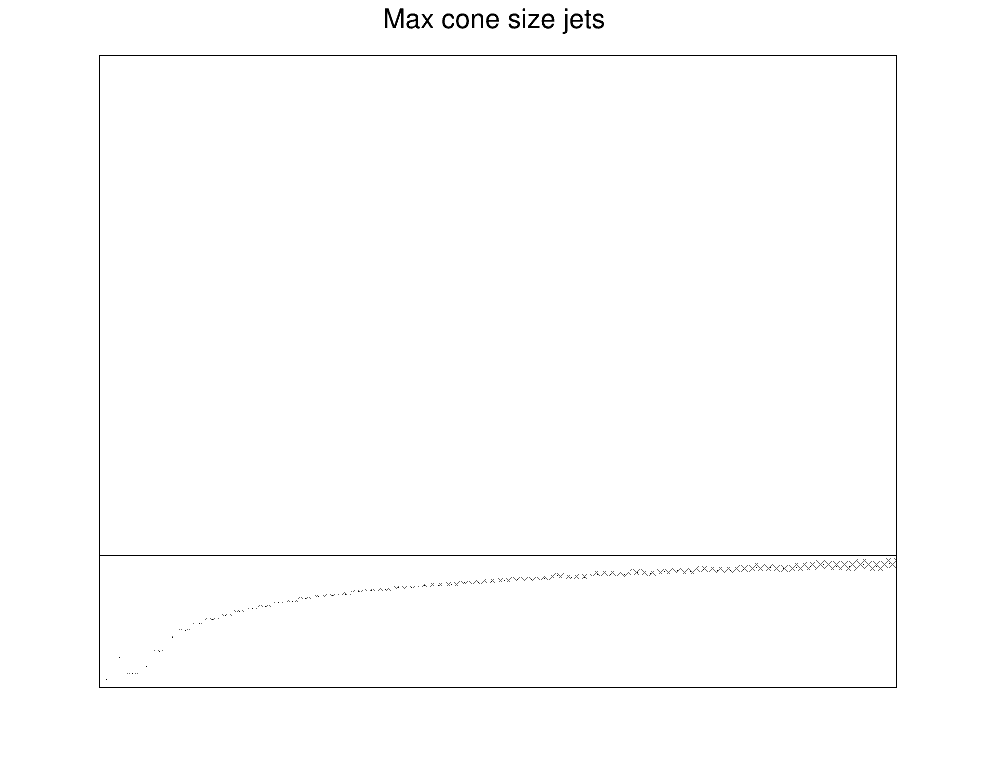

In [10]:
eff = Tagging_strategy_computator("strategy_WZ_maxsize", "Nearest W/Z jets", "Nearest W/Z good", "Nearest W/Z bad", "Max cone size jets", "Max cone size jets good", "Max cone size jets bad", "Mjj W/Z jets (GeV)", "Max cone size Mjj jets (GeV)")

In [11]:
print(eff)

0.5436007439553627


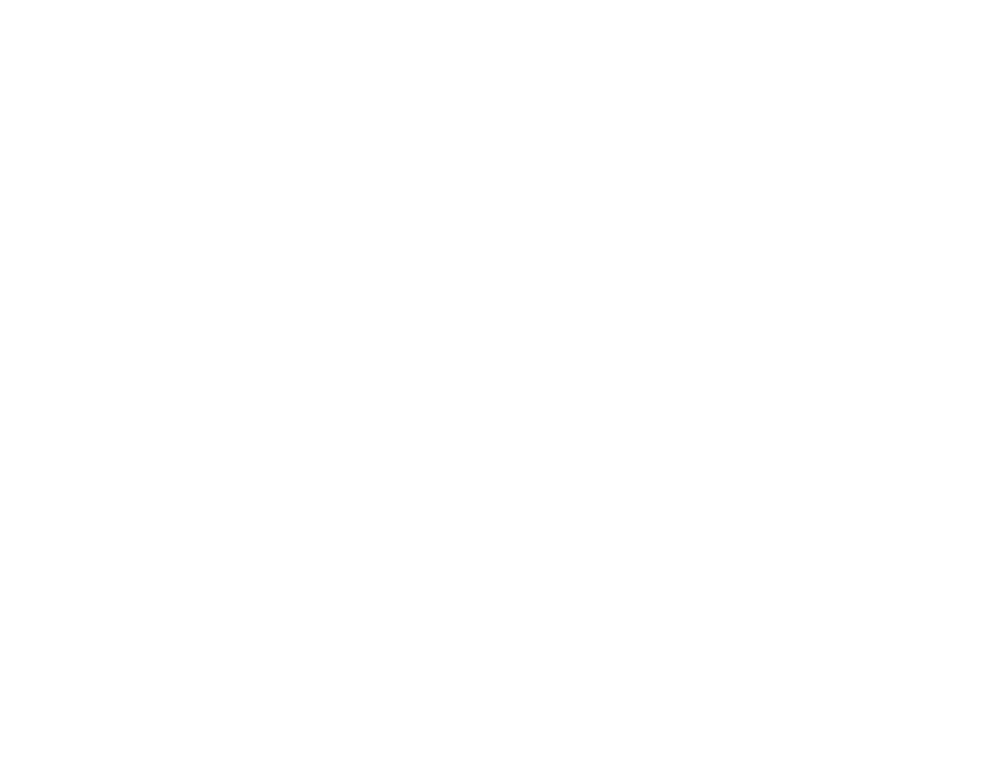

In [5]:
eff = Tagging_strategy_computator("strategy_wz_mjj", "Nearest W/Z jets", "Nearest W/Z good", "Nearest W/Z bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj W/Z jets (GeV)", "Max Mjj jets (GeV)")

In [7]:
print(eff)

0.6539243645381277


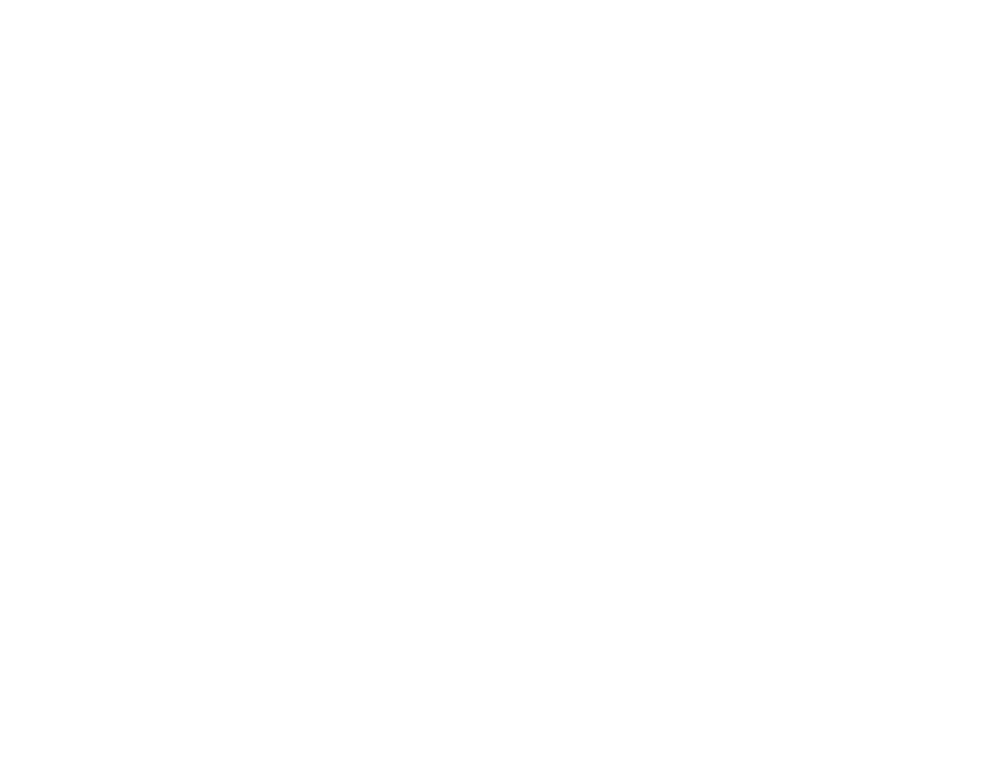

In [5]:
eff = Tagging_strategy_computator("strategy_mjj_wz", "Nearest W/Z jets", "Nearest W/Z good", "Nearest W/Z bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj W/Z jets (GeV)", "Max Mjj jets (GeV)")

In [6]:
print(eff)

0.570732796032238


0.5472849762347592


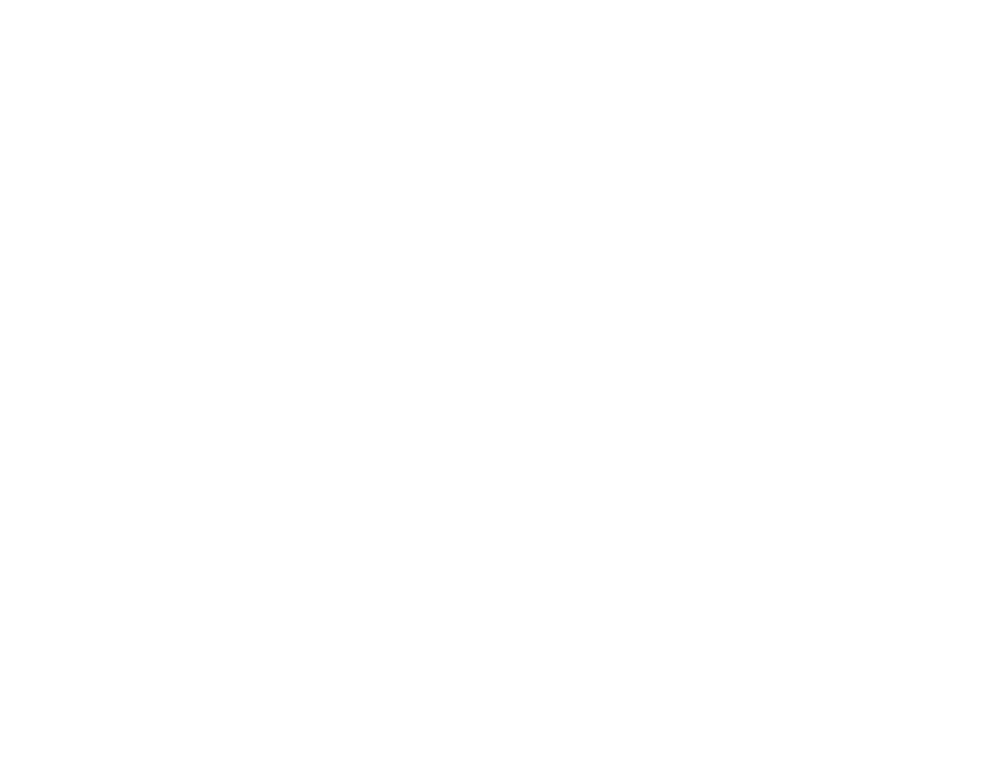

In [5]:
eff = Tagging_strategy_computator("strategy_mjj_mz", "Nearest Z jets", "Nearest Z good", "Nearest Z bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Z jets (GeV)", "Max Mjj jets (GeV)")
print(eff)

0.5876767927257698


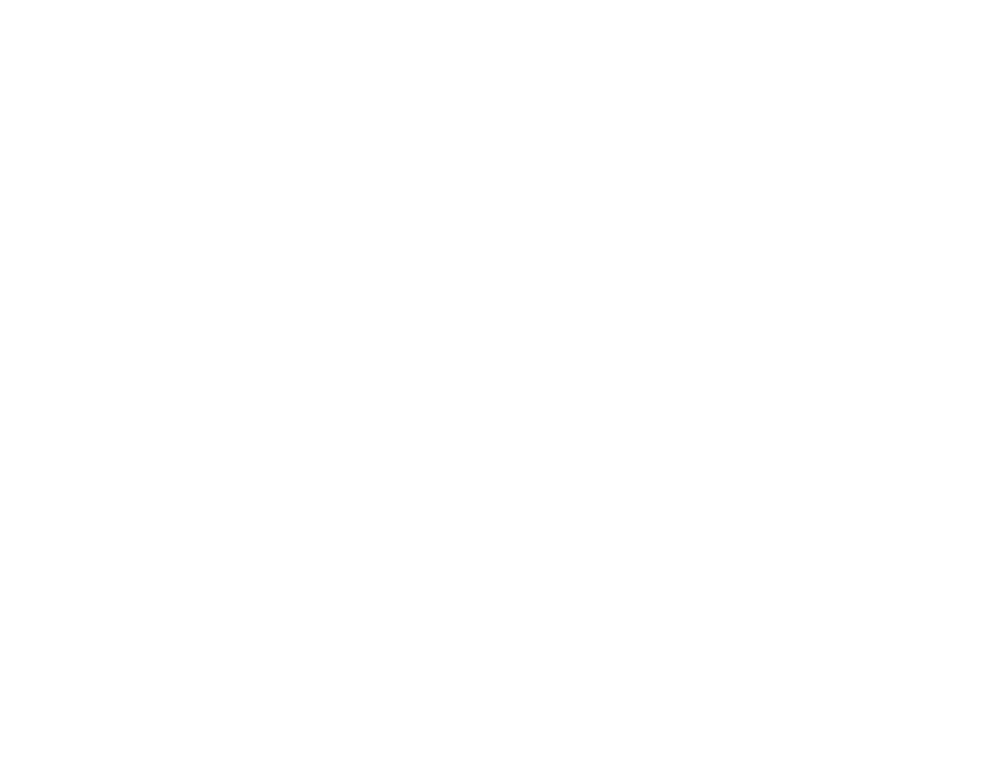

In [5]:
eff1 = Tagging_strategy_computator("strategy_mz_mjj", "Nearest Z jets", "Nearest Z good", "Nearest Z bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Z jets (GeV)", "Max Mjj jets (GeV)")
print(eff1)

0.5806769993800373


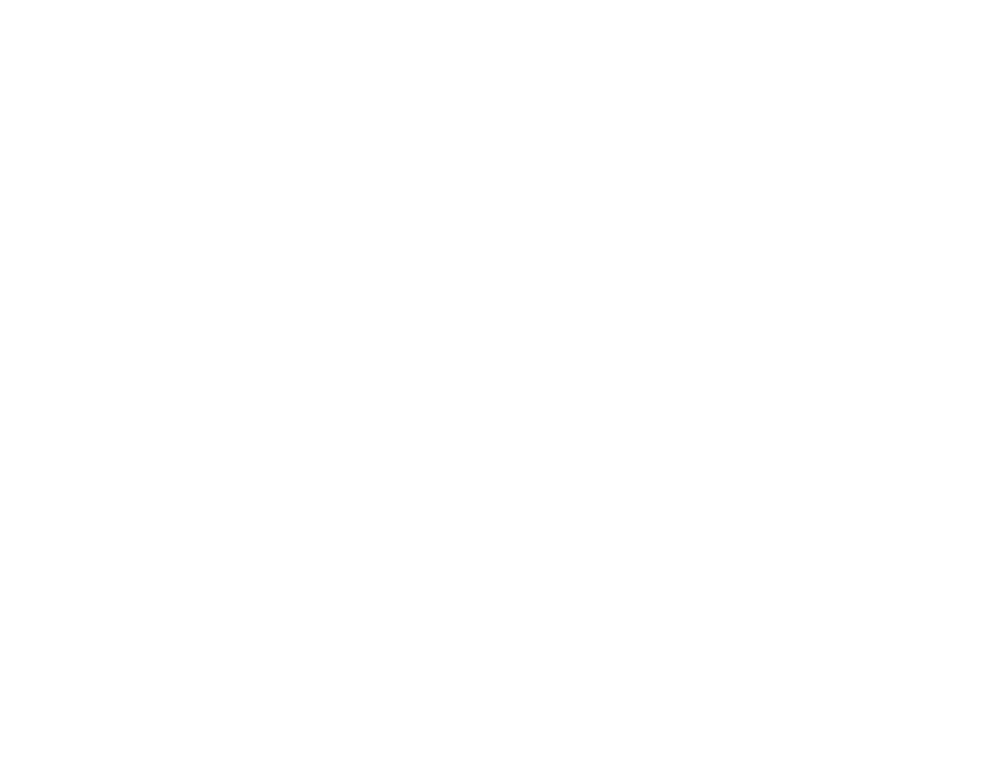

In [5]:
eff2 = Tagging_strategy_computator("strategy_mjj_mw", "Nearest W jets", "Nearest W good", "Nearest W bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj W jets (GeV)", "Max Mjj jets (GeV)")
print(eff2)

0.6768076048770407


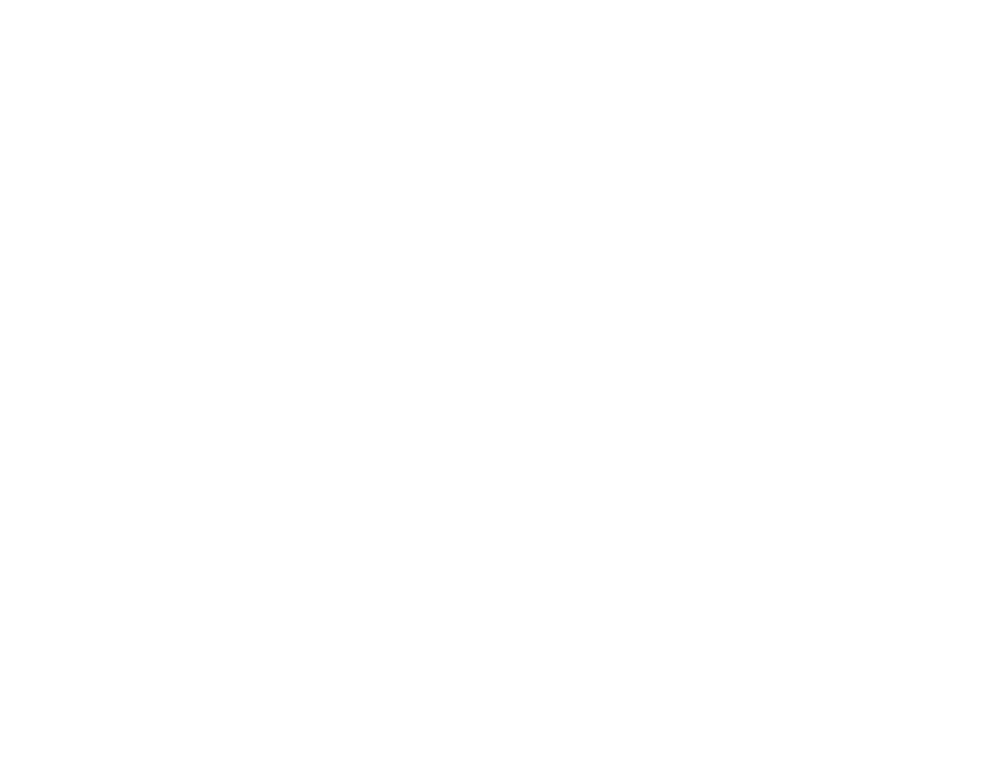

In [5]:
eff3 = Tagging_strategy_computator("strategy_mw_mjj", "Nearest W jets", "Nearest W good", "Nearest W bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj W jets (GeV)", "Max Mjj jets (GeV)")
print(eff3)

0.5879727216367018


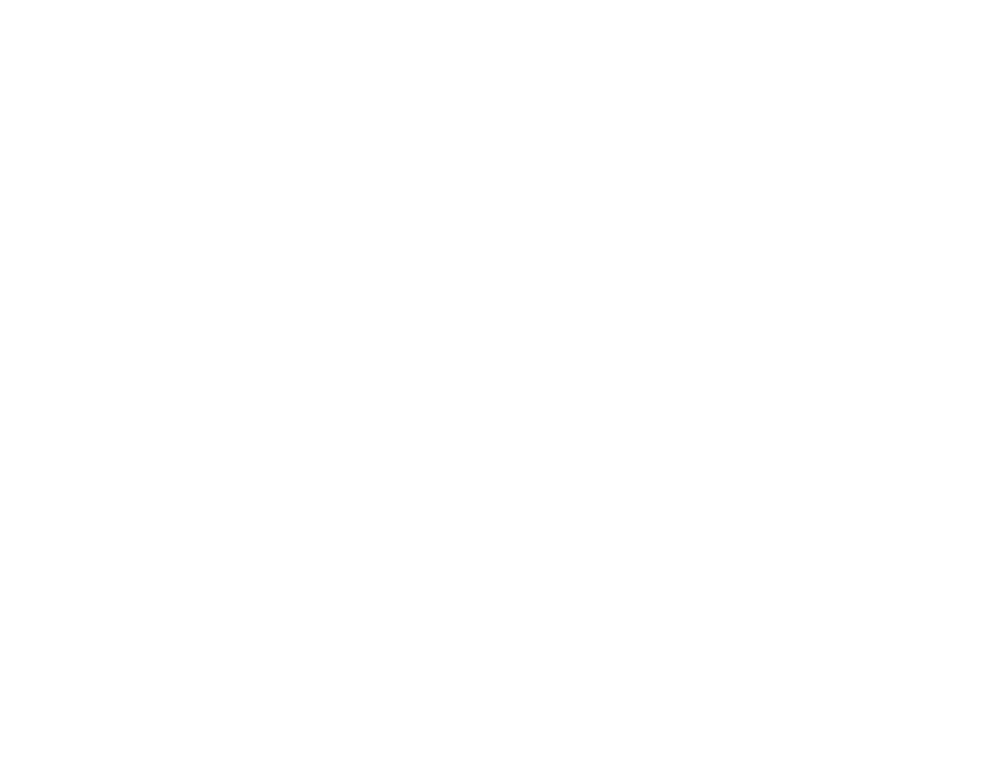

In [6]:
eff4 = Tagging_strategy_computator("strategy_mw_deltaeta", "Nearest W jets", "Nearest W good", "Nearest W bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj W jets (GeV)", "Max #Delta#eta Mjj jets (GeV)")
print(eff4)

0.11748708410828683


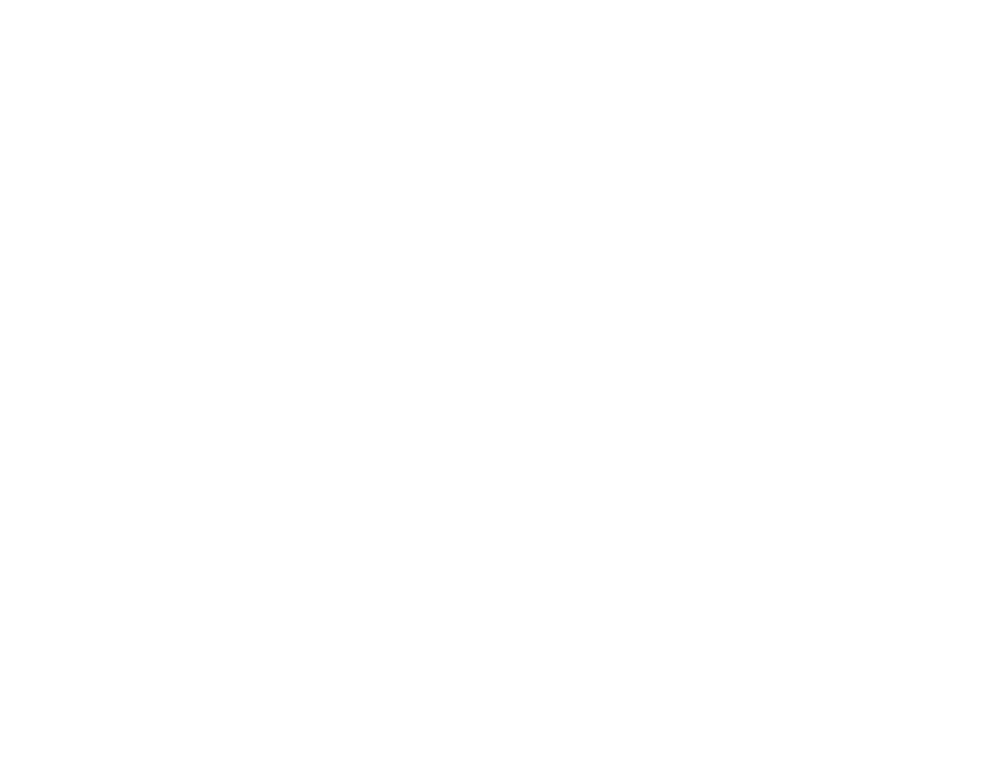

In [5]:
eff5 = Tagging_strategy_computator("strategy_maxpt_mjj", "Max P_{t} jets", "Max P_{t} good", "Max P_{t} bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Max P_{t} jets (GeV)", "Max Mjj jets (GeV)")
print(eff5)

0.5251184128952263


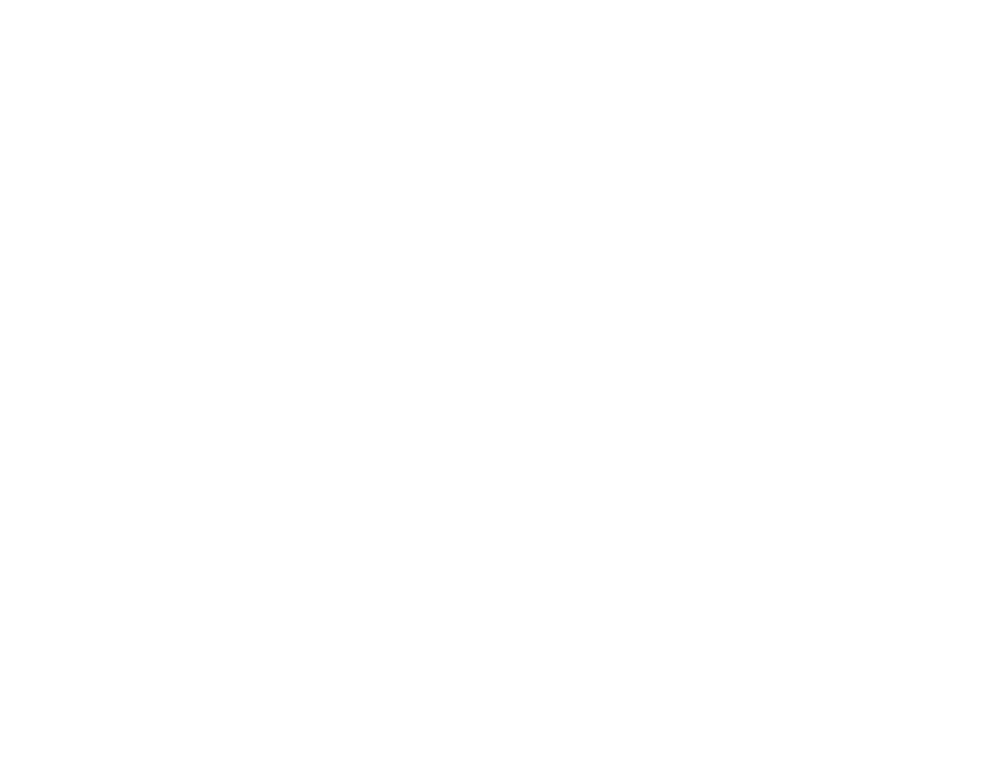

In [5]:
eff6 = Tagging_strategy_computator("strategy_mjj_maxpt", "Max P_{t} jets", "Max P_{t} good", "Max P_{t} bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Max P_{t} jets (GeV)", "Max Mjj jets (GeV)")
print(eff6)

0.10792808431494111


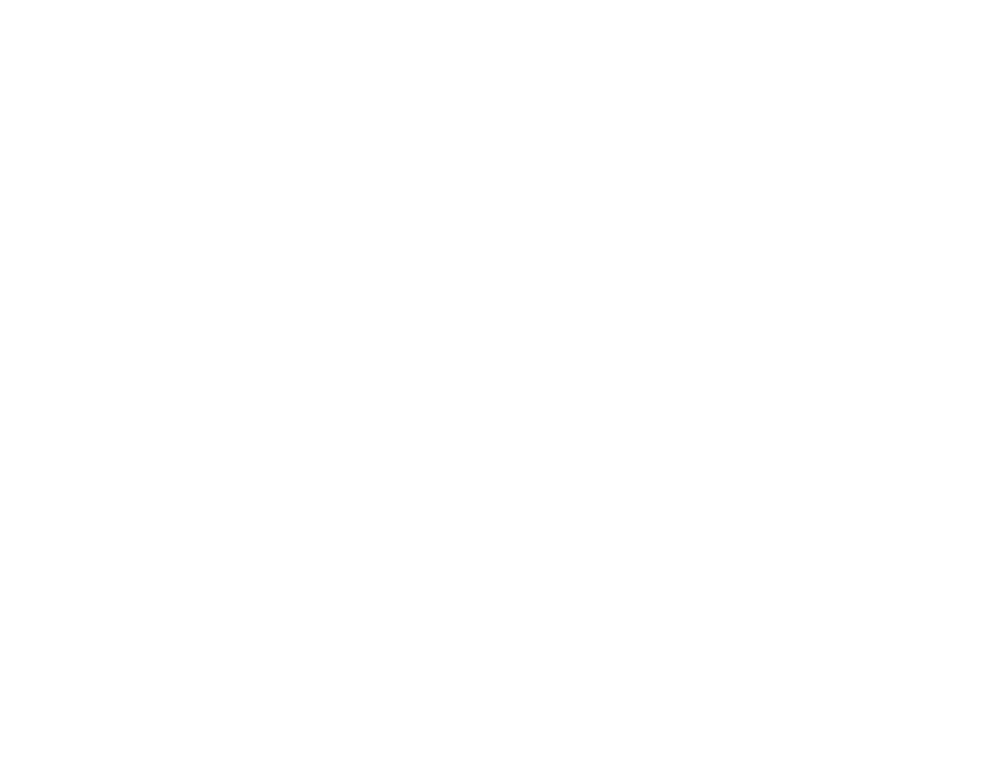

In [5]:
eff7 = Tagging_strategy_computator("strategy_maxpt_deltaeta", "Max P_{t} jets", "Max P_{t} good", "Max P_{t} bad", "Max Mjj jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Max P_{t} jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff7)

0.4342277330026865


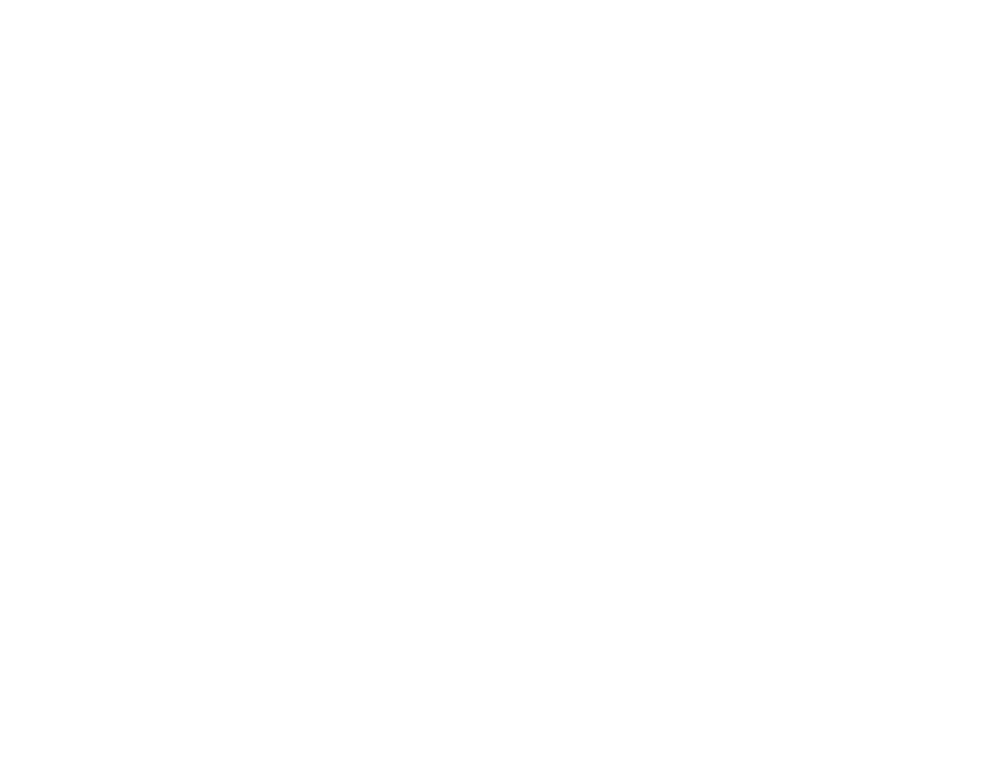

In [5]:
eff5 = Tagging_strategy_computator("strategy_deltaeta_maxpt", "Max P_{t} jets", "Max P_{t} good", "Max P_{t} bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Max P_{t} jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff5)

0.40533415995040295


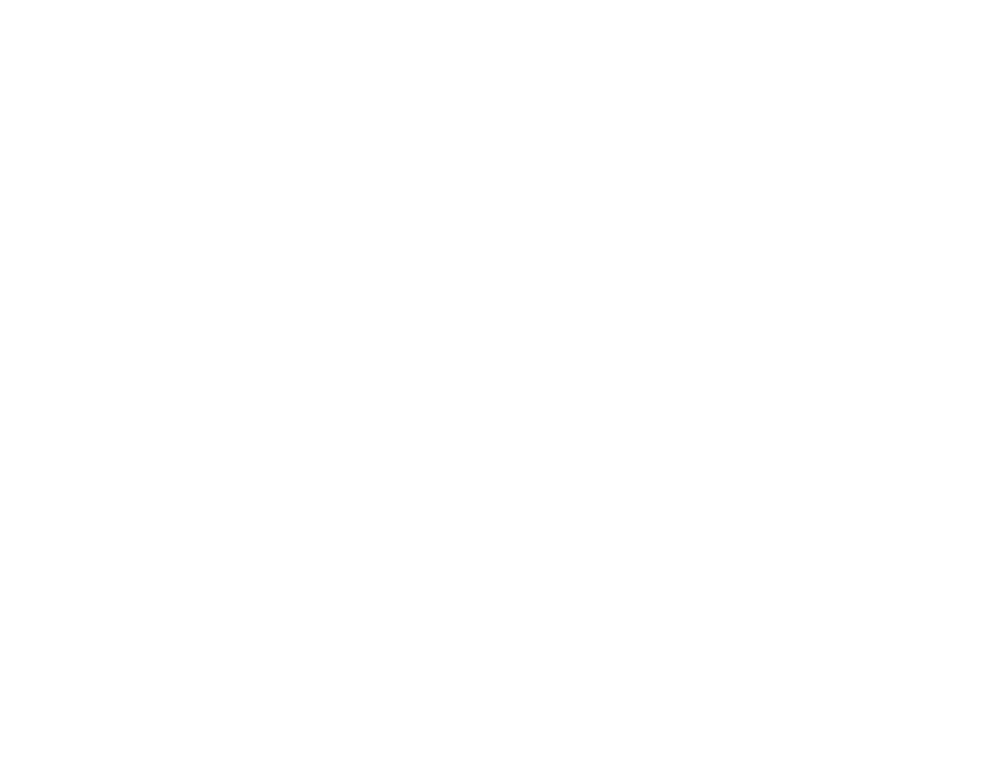

In [5]:
eff5 = Tagging_strategy_computator("strategy_mindeltaeta_mjj", "Min #Delta#eta jets", "Min #Delta#eta good", "Min #Delta#eta bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Min #Delta#eta jets (GeV)", "Max Mjj jets (GeV)")
print(eff5)

0.5355503203141145


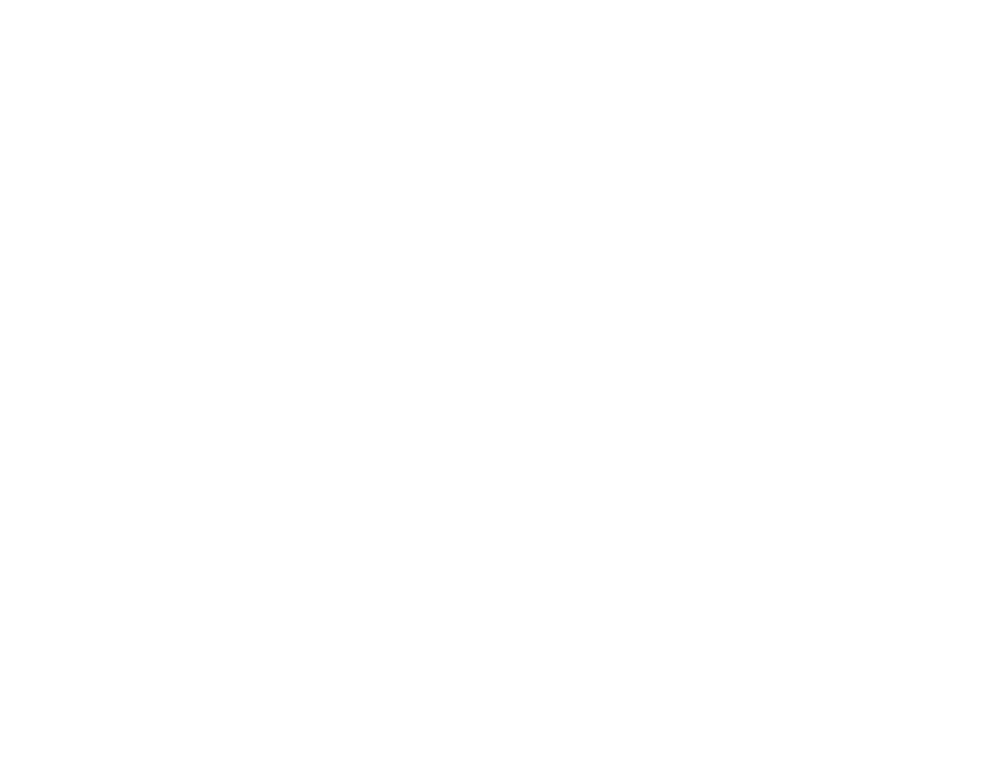

In [5]:
eff5 = Tagging_strategy_computator("strategy_mjj_mindeltaeta", "Min #Delta#eta jets", "Min #Delta#eta good", "Min #Delta#eta bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Min #Delta#eta jets (GeV)", "Max Mjj jets (GeV)")
print(eff5)

0.4269692085141558


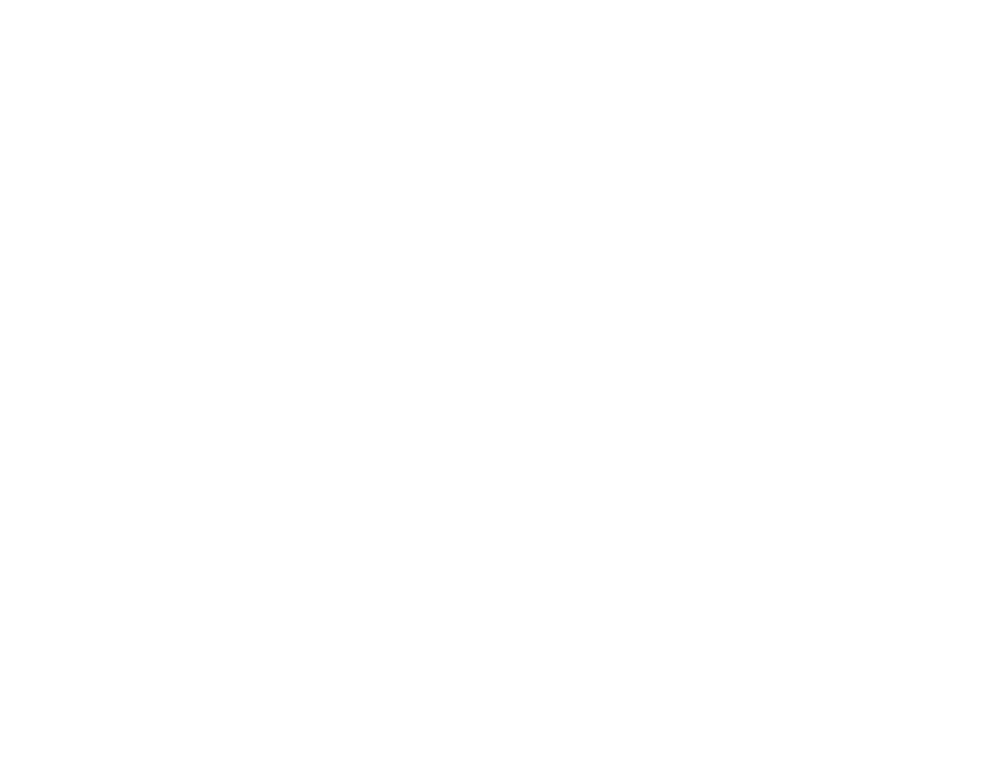

In [5]:
eff5 = Tagging_strategy_computator("strategy_maxdeltaeta_mindeltaeta", "Min #Delta#eta jets", "Min #Delta#eta good", "Min #Delta#eta bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Min #Delta#eta jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff5)

0.36726927051043606


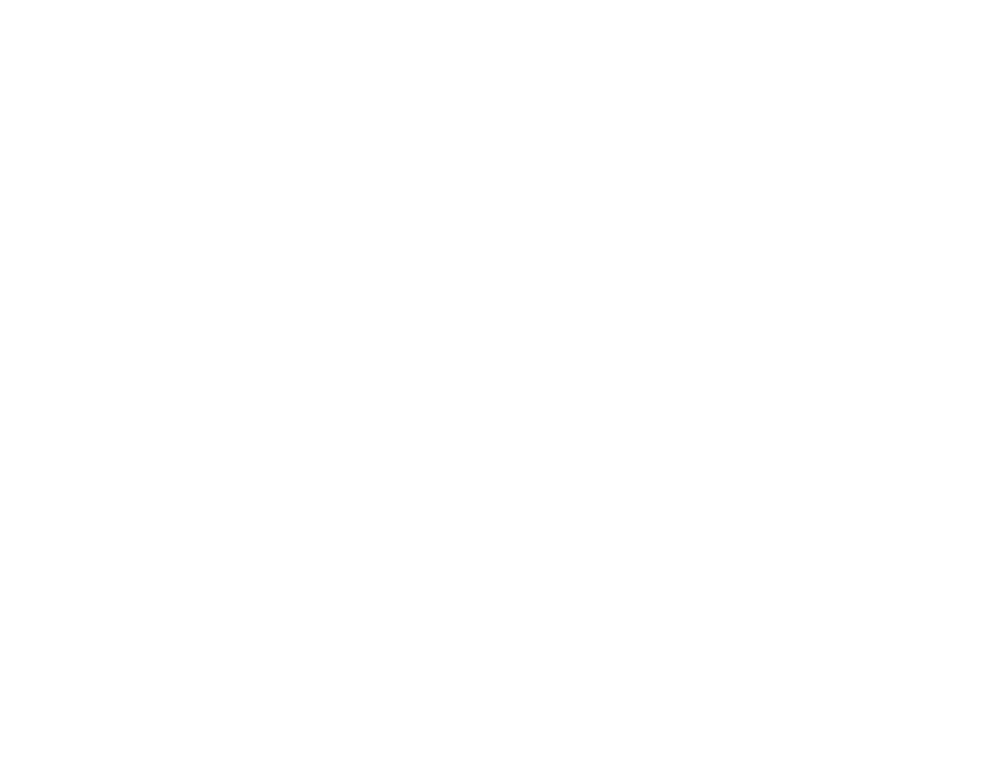

In [5]:
eff5 = Tagging_strategy_computator("strategy_mindeltaeta_maxdeltaeta", "Min #Delta#eta jets", "Min #Delta#eta good", "Min #Delta#eta bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Min #Delta#eta jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff5)

0.589026658400496


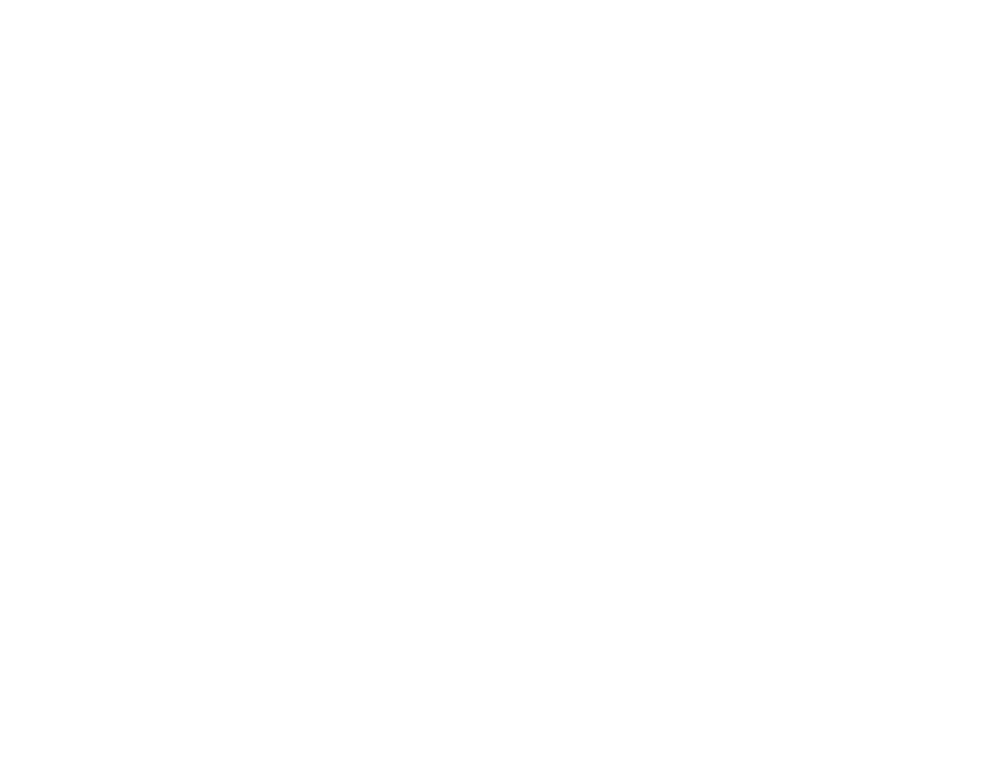

In [5]:
eff5 = Tagging_strategy_computator("strategy_Weta_maxeta", "Min #Delta#eta/ Nearest W / Max P_{t} jets", "Min #Delta#eta/ Nearest W / Max P_{t} good", "Min #Delta#eta/ Nearest W / Max P_{t} bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Min #Delta#eta/ Nearest W / Max P_{t} jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff5)

0.45880801818557554


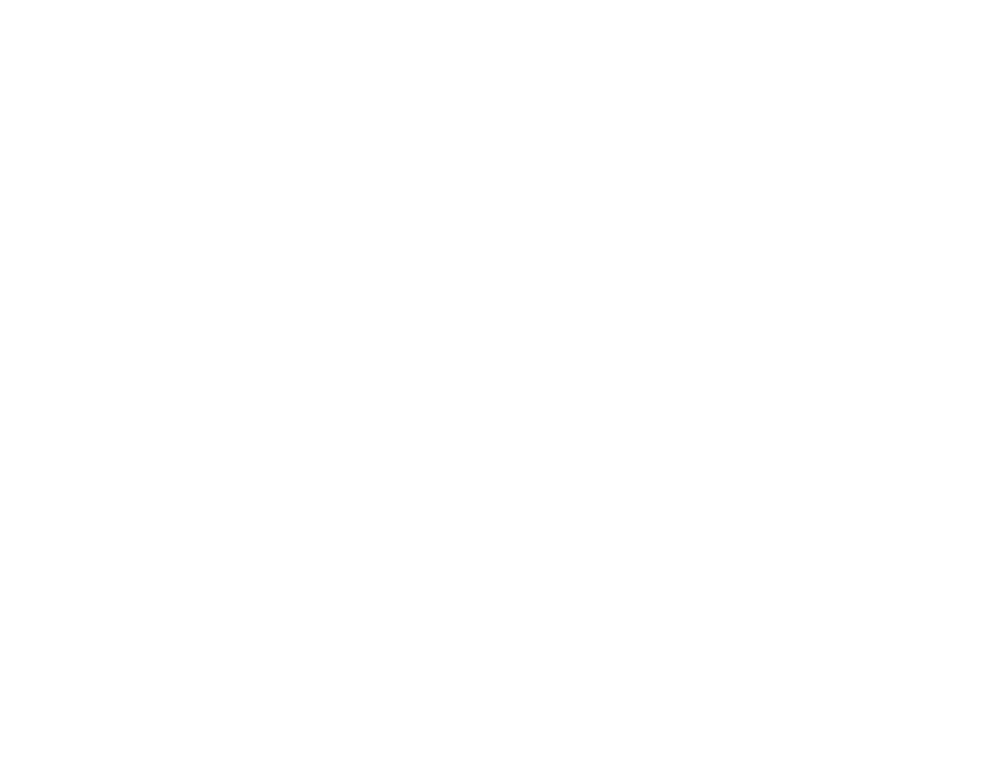

In [5]:
eff5 = Tagging_strategy_computator("strategy_maxeta_Weta", "Min #Delta#eta/ Nearest W jets", "Min W#Delta#eta good", "Min W#Delta#eta bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Min W#Delta#eta jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff5)

0.678164083488324


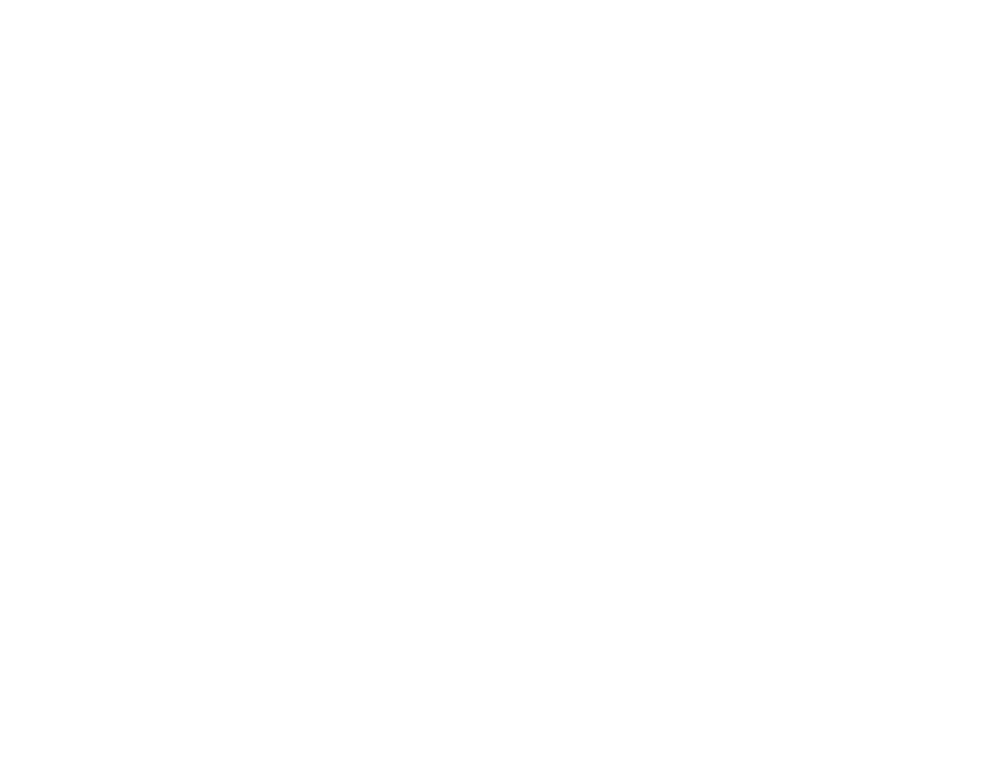

In [5]:
eff5 = Tagging_strategy_computator("strategy_Weta_mjj", "Min #Delta#eta/ Nearest W jets", "Min W#Delta#eta good", "Min W#Delta#eta bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Min W#Delta#eta jets (GeV)", "Max Mjj jets (GeV)")
print(eff5)

0.5821450712957222


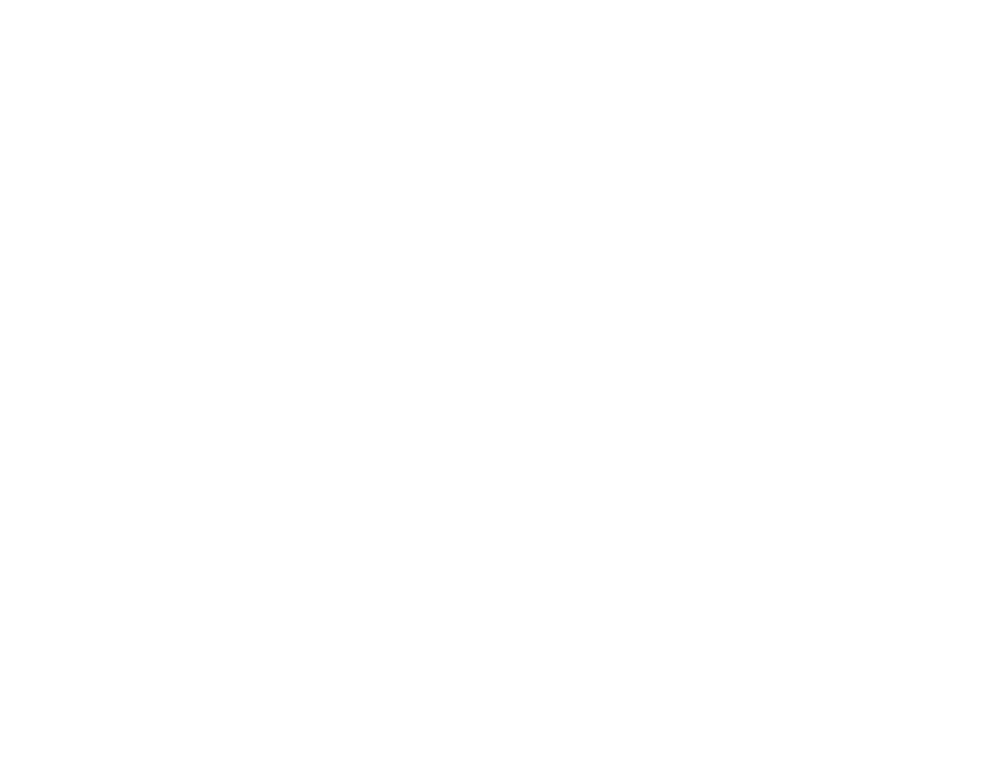

In [5]:
eff5 = Tagging_strategy_computator("strategy_mjj_Weta", "Min #Delta#eta/ Nearest W jets", "Min W#Delta#eta good", "Min W#Delta#eta bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Min W#Delta#eta jets (GeV)", "Max Mjj jets (GeV)")
print(eff5)

0.6731779293242406


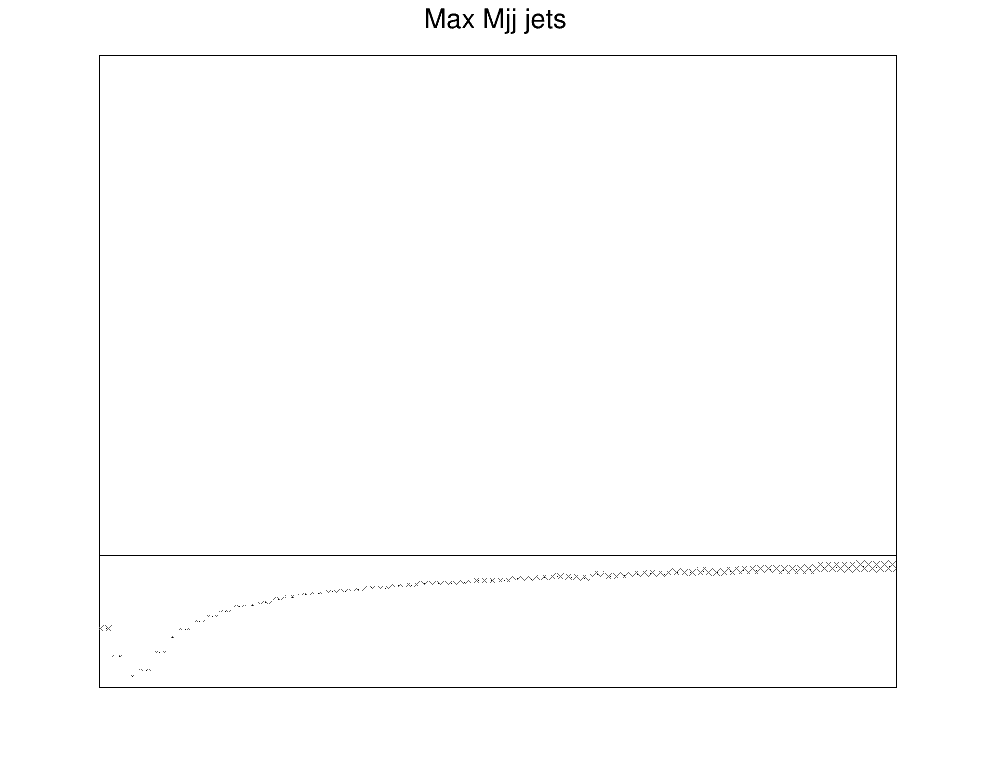

In [5]:
eff5 = Tagging_strategy_computator("strategy_proviamo_mjj", "Min #Delta#eta/ Nearest W / jets", "Min W#Delta#eta good", "Min W#Delta#eta bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Min W#Delta#eta jets (GeV)", "Max Mjj jets (GeV)")
print(eff5)

0.5858135978507956


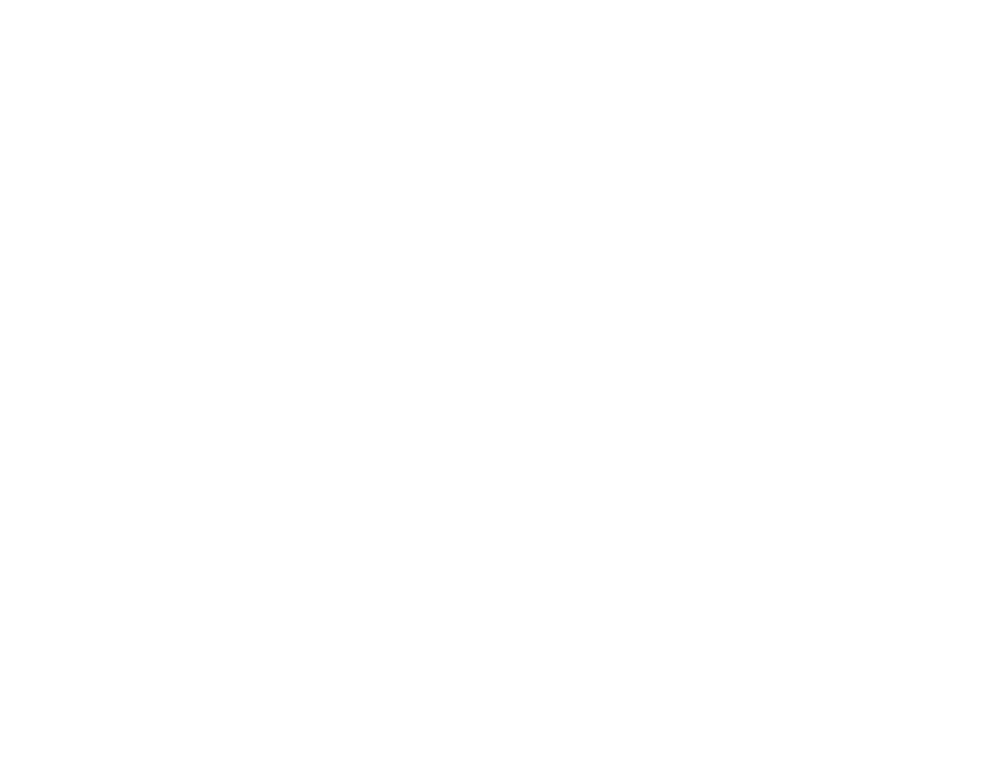

In [6]:
eff5 = Tagging_strategy_computator("strategy_mjj_proviamo", "Min #Delta#eta/ Nearest W / jets", "Min W#Delta#eta good", "Min W#Delta#eta bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Min W#Delta#eta jets (GeV)", "Max Mjj jets (GeV)")
print(eff5)

0.4598677412688572


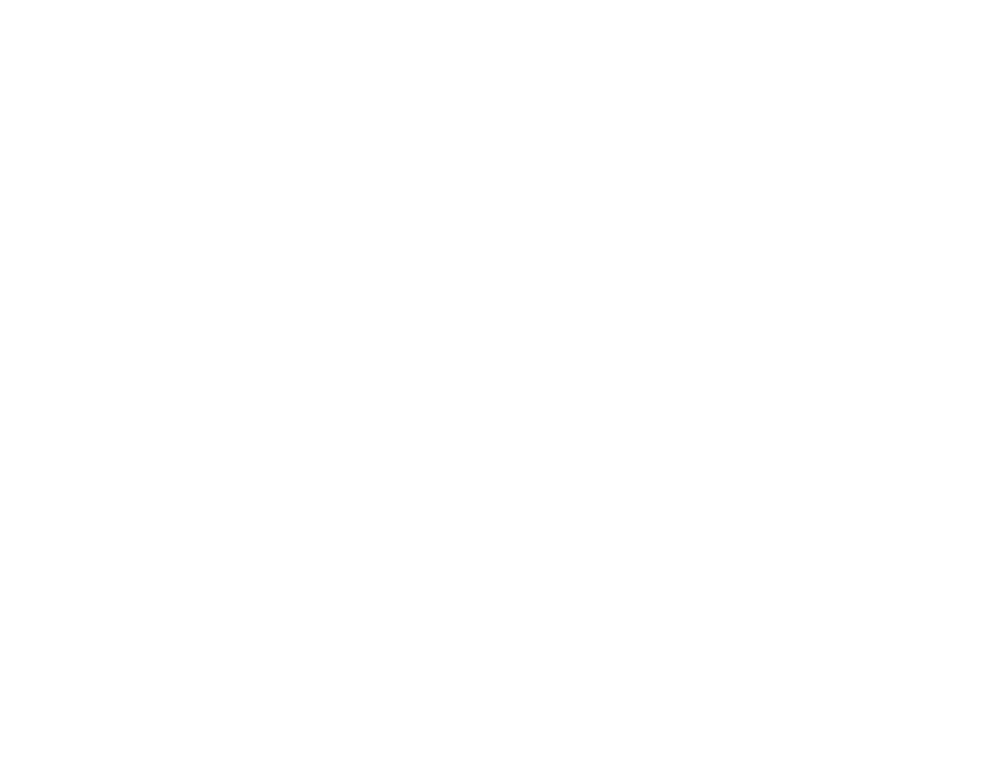

In [5]:
eff5 = Tagging_strategy_computator("strategy_deltaeta_proviamo", "Min #Delta#eta/ Nearest W / jets", "Min W#Delta#eta good", "Min W#Delta#eta bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Min W#Delta#eta jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff5)

0.584240545567266


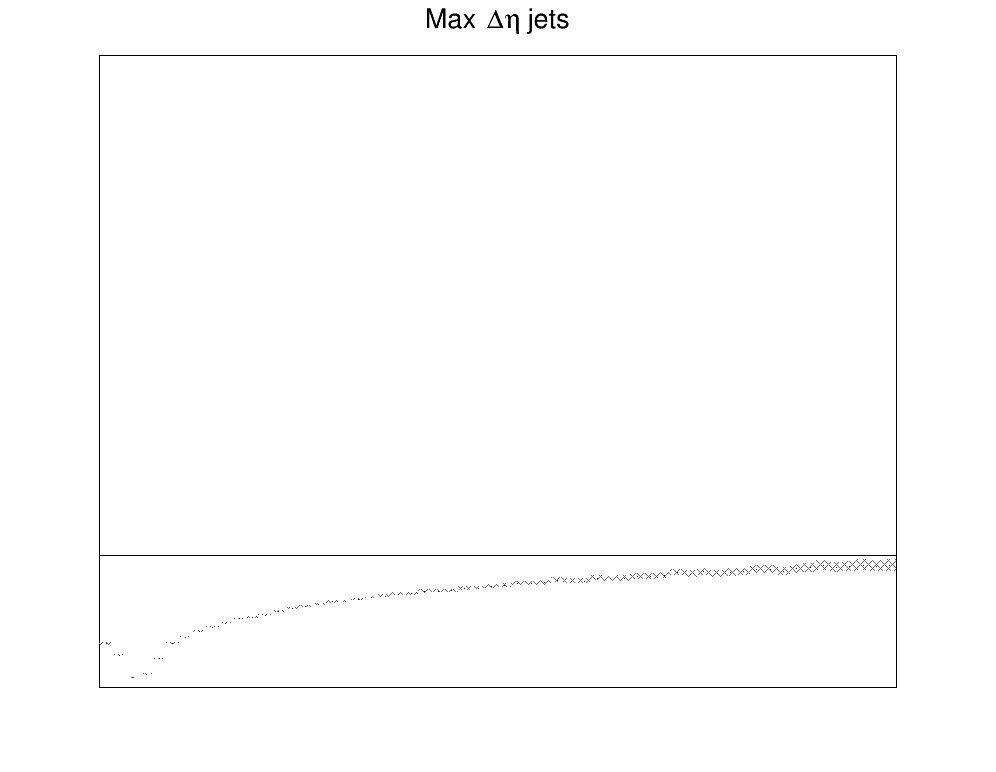

In [5]:
eff5 = Tagging_strategy_computator("strategy_proviamo_deltaeta", "Min #Delta#eta/ Nearest W / jets", "Min W#Delta#eta good", "Min W#Delta#eta bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Min W#Delta#eta jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff5)

0.2506873320934077


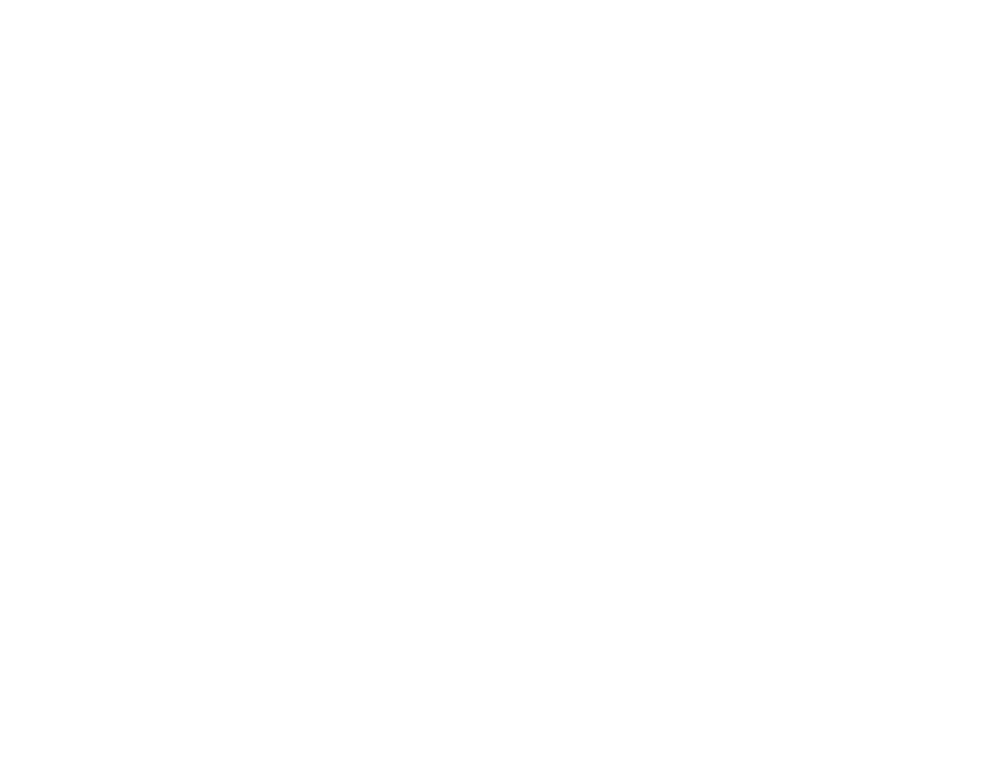

In [5]:
eff5 = Tagging_strategy_computator("strategy_minsize_maxsize", "Min #DeltaR jets", "Min #DeltaR good", "Min #DeltaR bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Min #DeltaR jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

0.25623062616243025


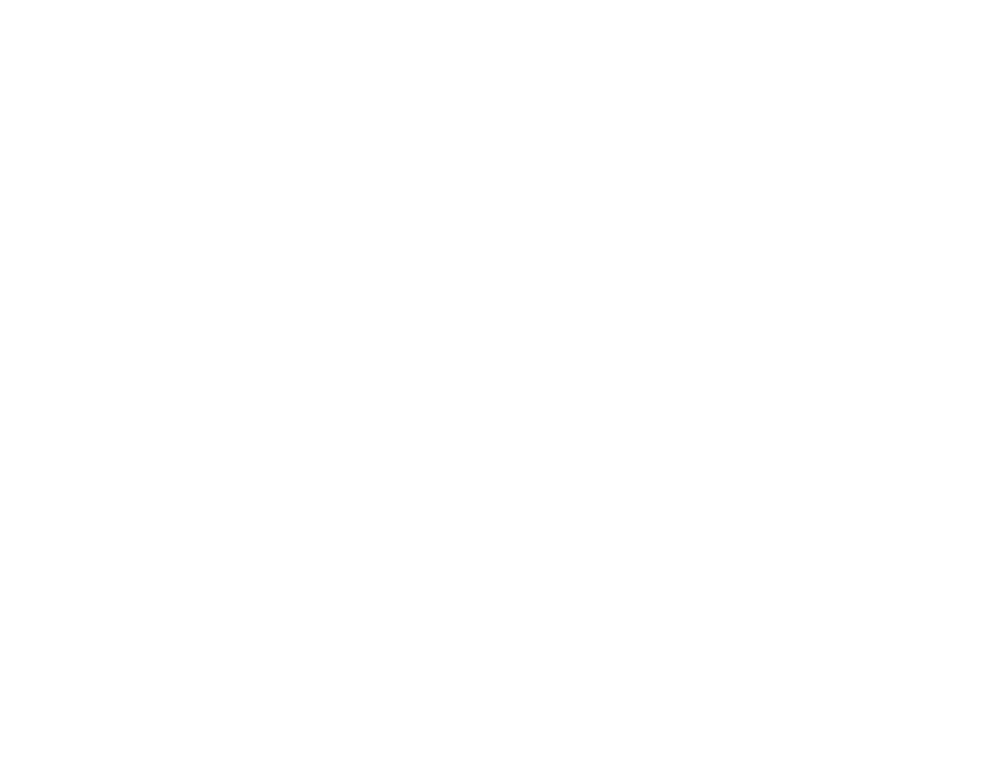

In [5]:
eff5 = Tagging_strategy_computator("strategy_maxsize_minsize", "Min #DeltaR jets", "Min #DeltaR good", "Min #DeltaR bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Min #DeltaR jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

0.2905600330646828


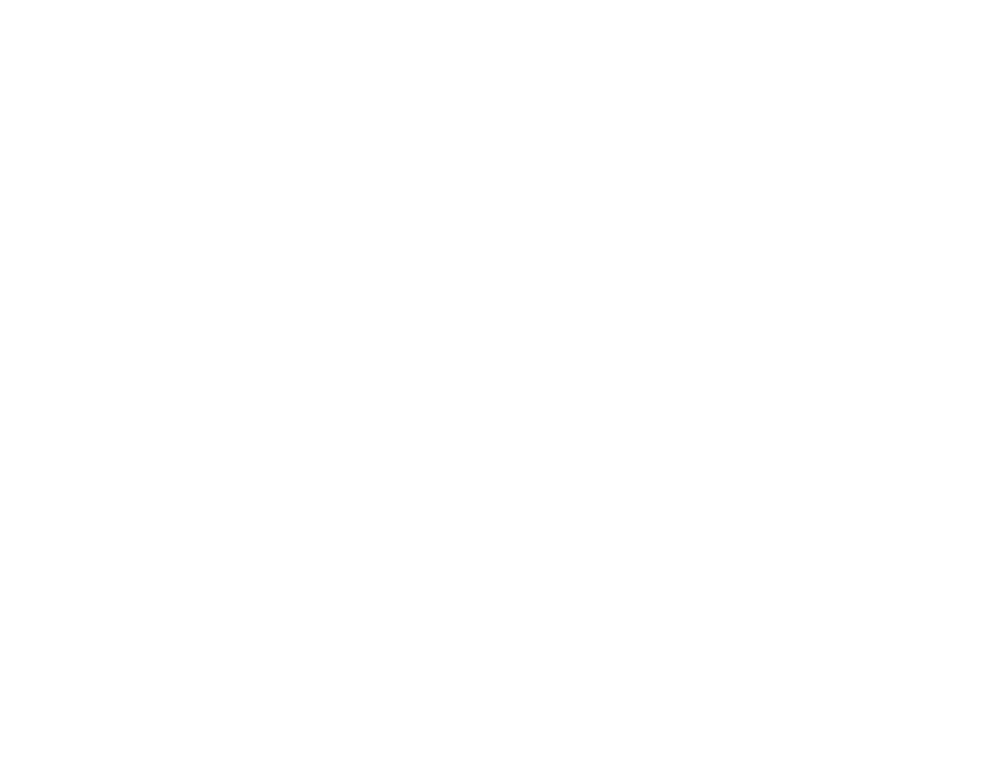

In [6]:
eff5 = Tagging_strategy_computator("strategy_minsize_mjj", "Min #DeltaR jets", "Min #DeltaR good", "Min #DeltaR bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Min #DeltaR jets (GeV)", "Max Mjj jets (GeV)")
print(eff5)

0.4976474478197975


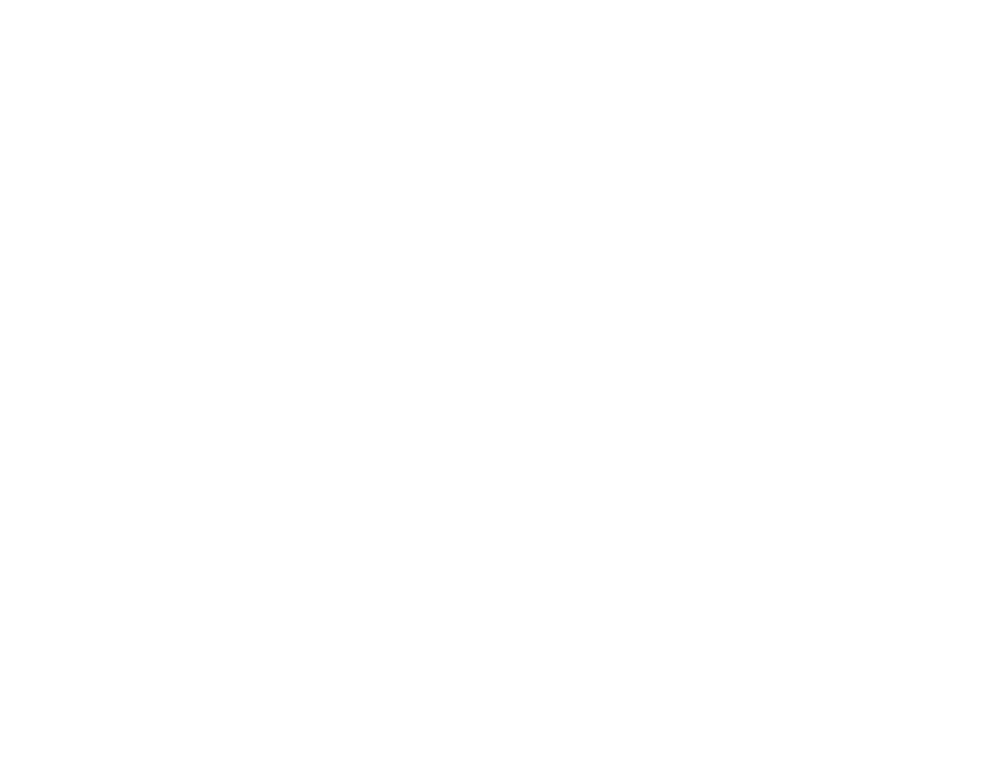

In [5]:
eff5 = Tagging_strategy_computator("strategy_mjj_minsize", "Min #DeltaR jets", "Min #DeltaR good", "Min #DeltaR bad", "Max Mjj jets", "Max Mjj jets good", "Max Mjj jets bad", "Mjj Min #DeltaR jets (GeV)", "Max Mjj jets (GeV)")
print(eff5)

In [5]:
eff5 = Tagging_strategy_computator("strategy_minsize_maxdeltaeta", "Min #DeltaR jets", "Min #DeltaR good", "Min #DeltaR bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Min #DeltaR jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff5)

0.26160033064682786


0.40753378797272166


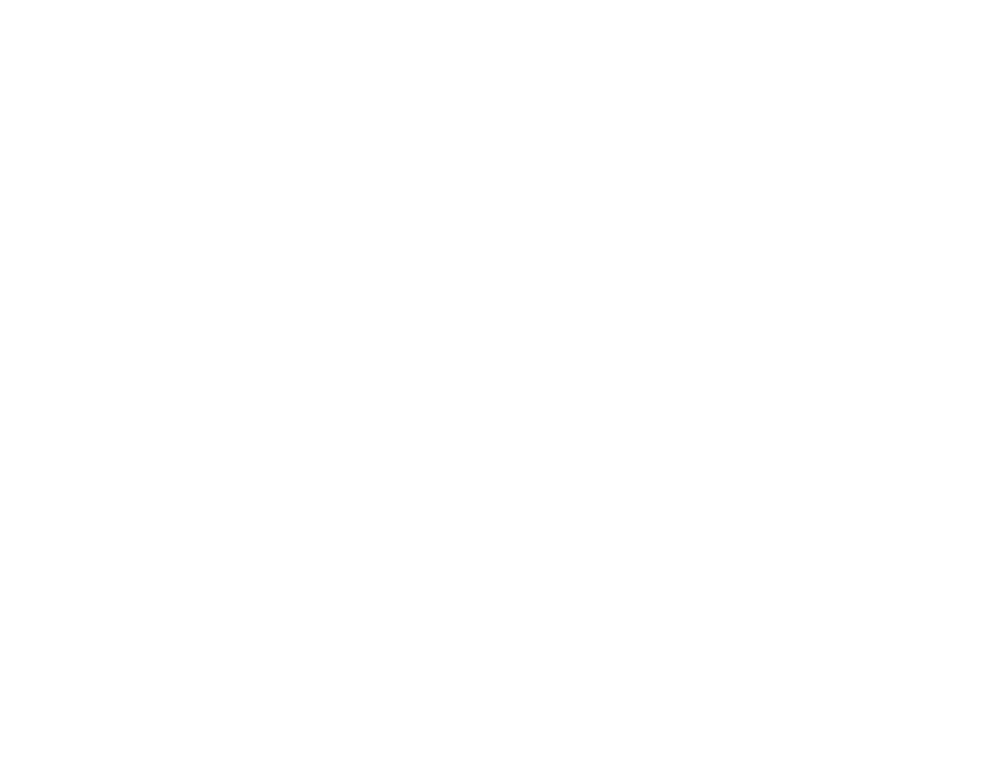

In [6]:
eff5 = Tagging_strategy_computator("strategy_maxdeltaeta_minsize", "Min #DeltaR jets", "Min #DeltaR good", "Min #DeltaR bad", "Max #Delta#eta jets", "Max #Delta#eta jets good", "Max #Delta#eta jets bad", "Mjj Min #DeltaR jets (GeV)", "Max #Delta#eta jets (GeV)")
print(eff5)

In [10]:
eff5 = Tagging_strategy_computator("strategy_maxsize_W", "Nearest W jets", "Nearest W good", "Nearest W bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Nearest W jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

0.28323455259351105


In [5]:
eff5 = Tagging_strategy_computator("strategy_W_maxsize", "Nearest W jets", "Nearest W good", "Nearest W bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Nearest W jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

0.5590130192188468


In [5]:
eff5 = Tagging_strategy_computator("strategy_maxsize_Z", "Nearest Z jets", "Nearest Z good", "Nearest Z bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Nearest Z jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

0.27359537094441


In [5]:
eff5 = Tagging_strategy_computator("strategy_Z_maxsize", "Nearest Z jets", "Nearest Z good", "Nearest Z bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Nearest Z jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

0.49619177516015706


In [5]:
eff5 = Tagging_strategy_computator("strategy_maxsize_maxpt", "Max P_{t} jets", "Max P_{t} good", "Max P_{t} bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Max P_{t} jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

0.268101673899566


In [10]:
eff5 = Tagging_strategy_computator("strategy_maxpt_maxsize", "Max P_{t} jets", "Max P_{t} good", "Max P_{t} bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Max P_{t} jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

0.10456457945856582


In [5]:
eff5 = Tagging_strategy_computator("strategy_maxsize_WZ", "Nearest W or Z jets", "Nearest W or Z  good", "Nearest W or Z  bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Nearest W or Z  jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

0.2804496796858855


In [ ]:
eff5 = Tagging_strategy_computator("strategy_WZ_maxsize", "Nearest W or Z jets", "Nearest W or Z  good", "Nearest W or Z  bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Nearest W or Z  jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

In [ ]:
eff5 = Tagging_strategy_computator("strategy_mindeltaeta_maxsize", "Min #Delta#eta jets", "Min #Delta#eta good", "Min #Delta#eta bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Min #Delta#eta  jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

In [ ]:
eff5 = Tagging_strategy_computator("strategy_maxsize_mindeltaeta", "Min #Delta#eta jets", "Min #Delta#eta good", "Min #Delta#eta bad", "Max #DeltaR jets", "Max #DeltaR jets good", "Max #DeltaR jets bad", "Mjj Min #Delta#eta  jets (GeV)", "Mjj Max #DeltaR jets (GeV)")
print(eff5)

# NUMBER OF JETS DISTRIBUTION

In [4]:
H = r.THStack("H","Number of partons and jets per event")
hjets = r.TH1F("hj", "Number of jets per event", 10, 0, 10)
hjets.SetLineColor(r.kRed)
hjets.SetFillColor(r.kRed)
hjets.SetFillStyle(3004)
H.Add(hjets)
hpartons = r.TH1F("hp", "Number of partons per event", 10, 0, 10)
hpartons.SetLineColor(r.kBlue)
hpartons.SetFillColor(r.kBlue)
hpartons.SetFillStyle(3005)
H.Add(hpartons)

In [5]:
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    hjets.Fill(evento.n_jets[0])
    hpartons.Fill(evento.n_partons[0])

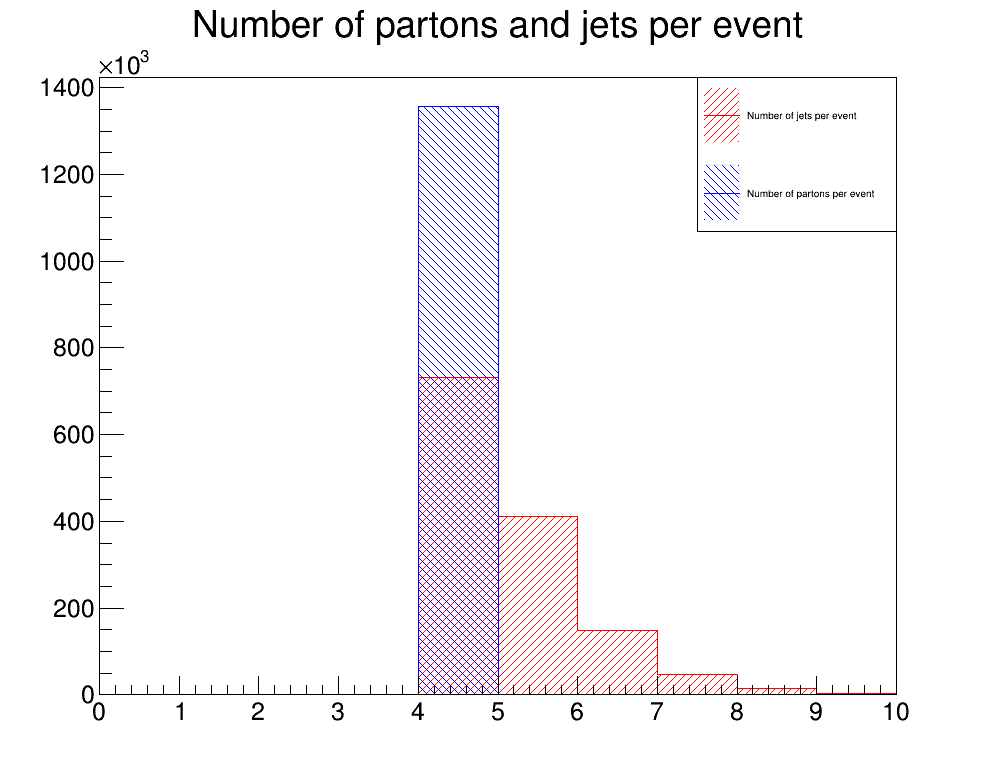

In [6]:
c = r.TCanvas("c", "c", 50, 50, 1000, 800)
H.Draw("nostack hist")
l = r.TLegend(.9,.9,.7,.7)
l.AddEntry(hjets)
l.AddEntry(hpartons)
l.Draw()
c.Draw()

In [7]:
c2= r.TCanvas("c2","c2", 50, 50, 1000, 800)
hjets.Draw()
m = r.TLegend(.9,.9,.7,.7)
m.AddEntry(hjets)
m.Draw()
c2.Draw

# MW_DELTAETA

In [26]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    #("n_events", 100),
    ("atleastone_mjj_M", 250)
    
]

In [27]:
h = r.TH1F("V Partons","V Partons", 120,40, 130 )
h.SetLineColor(r.kRed)
h.SetLineWidth(2)
h.SetFillColor(r.kRed)
h.SetFillStyle(3003)

h1 = r.TH1F("VBS Partons","VBS Partons", 120,0, 2000 )
h1.SetLineColor(r.kRed)
h1.SetLineWidth(2)
h1.SetFillColor(r.kRed)
h1.SetFillStyle(3003)

h2 = r.TH1F("VBS Partons","VBS Partons", 60,-10, 10 )
h2.SetLineColor(r.kRed)
h2.SetLineWidth(2)
h2.SetFillColor(r.kRed)
h2.SetFillStyle(3003)

h3 = r.TH1F("V Partons","V Partons", 60,-6, 6 )
h3.SetLineColor(r.kRed)
h3.SetLineWidth(2)
h3.SetFillColor(r.kRed)
h3.SetFillStyle(3003)

In [28]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mw_deltaeta(evento.jets)
    h.Fill((partons_pair1.vjets[0]+partons_pair1.vjets[1]).M())
    h1.Fill((partons_pair1.vbsjets[0]+partons_pair1.vbsjets[1]).M())
    h2.Fill(partons_pair1.vbsjets[0].Eta()-partons_pair1.vbsjets[1].Eta())
    h3.Fill(partons_pair1.vjets[0].Eta()-partons_pair1.vjets[1].Eta())

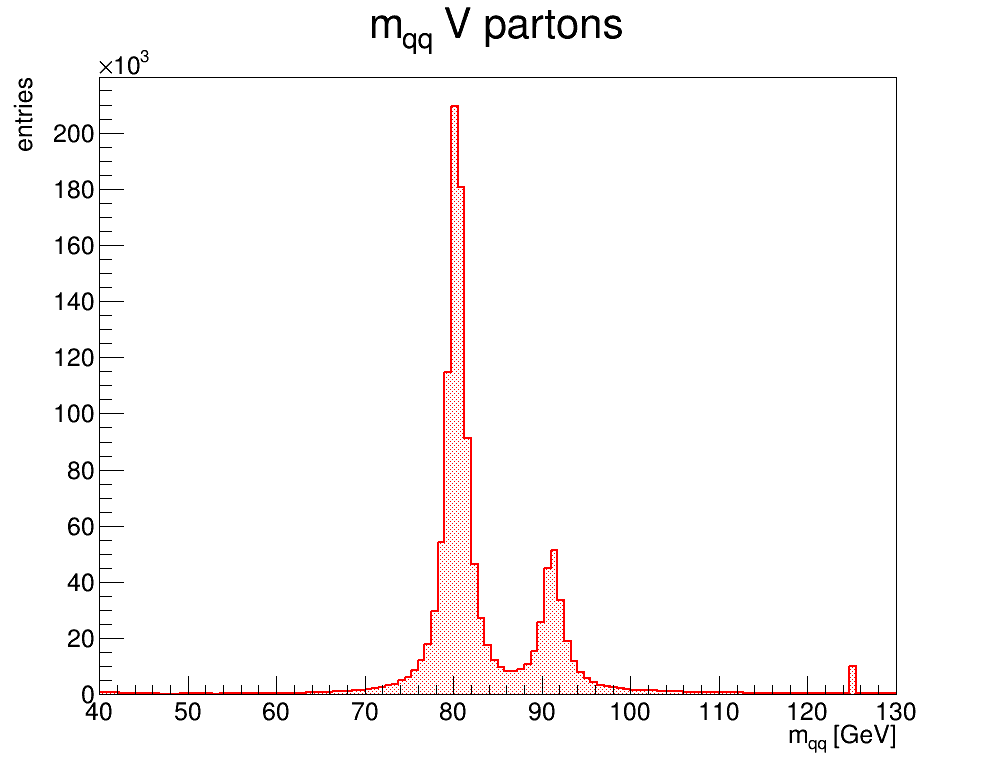

In [29]:
c2 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)
gStyle.SetOptStat(0)
h.Draw("hist")
h.GetXaxis().SetTitle("m_{qq} [GeV]")
h.GetYaxis().SetTitle("entries")
h.SetTitle("m_{qq} V partons")
c2.Draw()

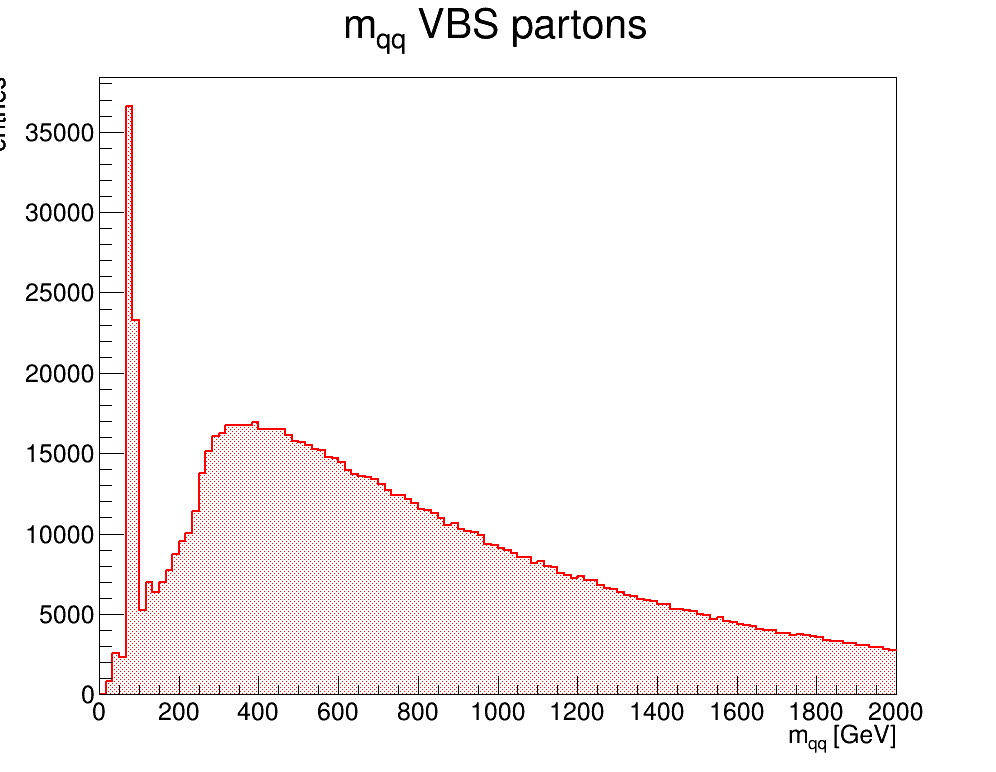

In [30]:
c2 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)
gStyle.SetOptStat(0)
h1.Draw("hist")
h1.GetXaxis().SetTitle("m_{qq} [GeV]")
h1.GetYaxis().SetTitle("entries")
h1.SetTitle("m_{qq} VBS partons")
c2.Draw()

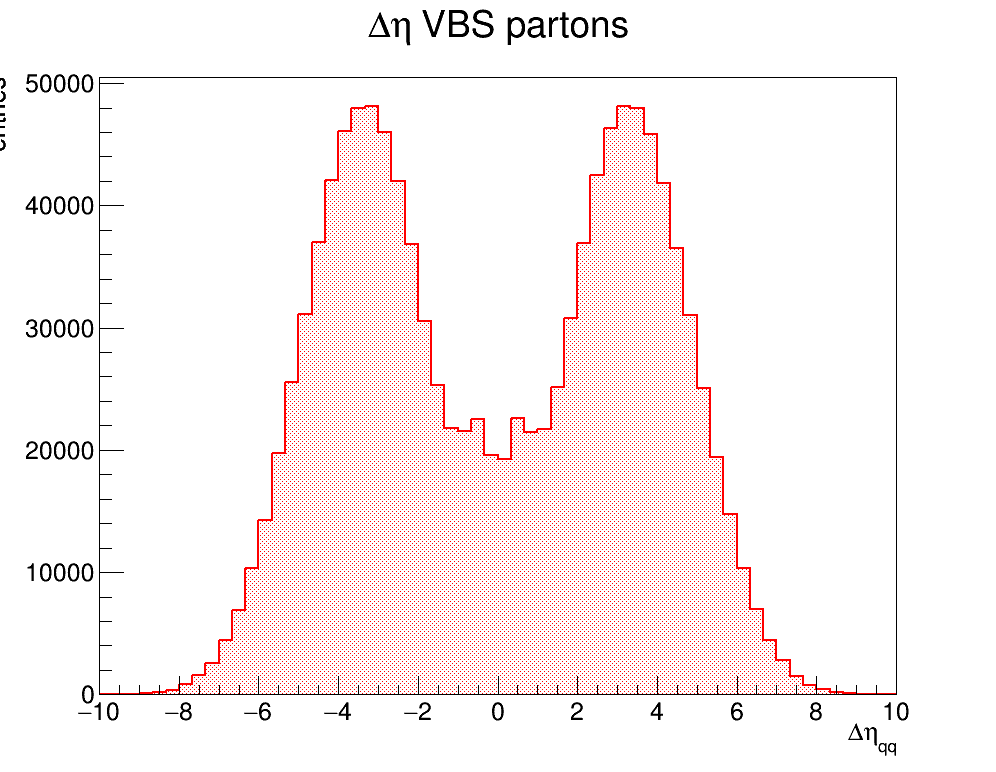

In [31]:
c2 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)
gStyle.SetOptStat(0)
h2.Draw("hist")
h2.GetXaxis().SetTitle("#Delta#eta_{qq}")
h2.GetYaxis().SetTitle("entries")
h2.SetTitle("#Delta#eta VBS partons")
c2.Draw()

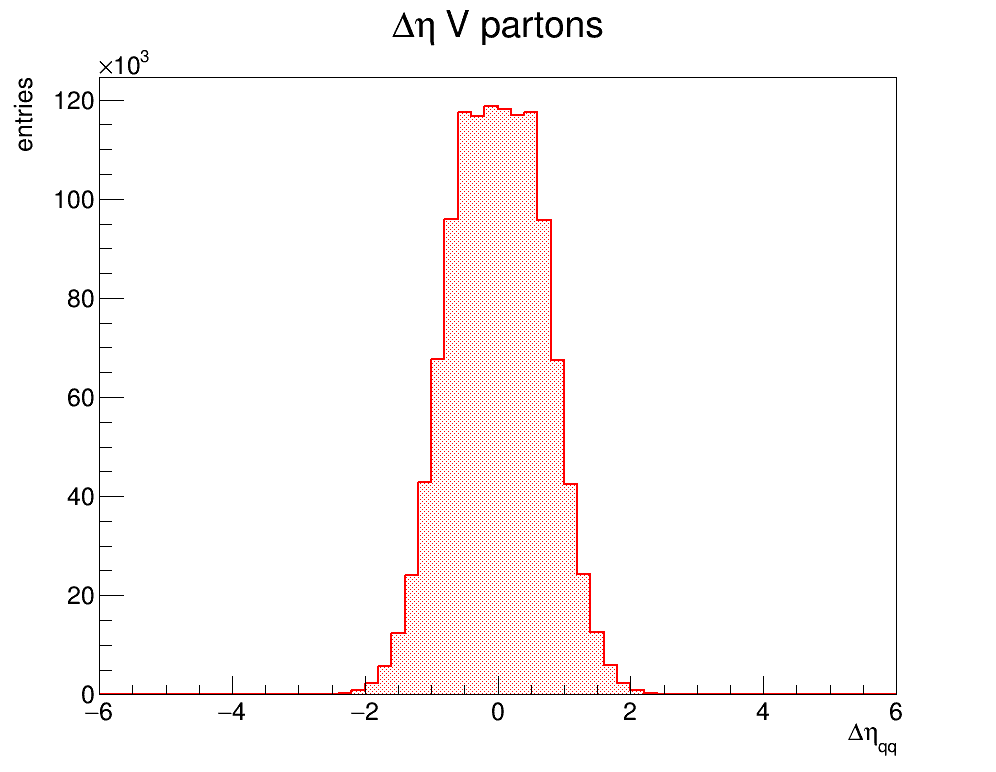

In [32]:
c2 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)
gStyle.SetOptStat(0)
h3.Draw("hist")
h3.GetXaxis().SetTitle("#Delta#eta_{qq}")
h3.GetYaxis().SetTitle("entries")
h3.SetTitle("#Delta#eta V partons")
c2.Draw()

In [6]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con 80 Gev
h_mw_deltaeta = r.TH1F("V Jets", "V Jets", 60, 30, 500)
h_mw_deltaeta.SetLineColor(r.kBlue)
h_mw_deltaeta.SetLineWidth(2)
h_mw_deltaeta.SetFillColor(r.kBlue)
h_mw_deltaeta.SetFillStyle(3002)


In [7]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
h_mw_deltaeta_max = r.TH1F("V Partons","V Partons", 60,0, 500 )
h_mw_deltaeta_max.SetLineColor(r.kBlack)
h_mw_deltaeta_max.SetLineWidth(2)
h_mw_deltaeta_max.SetFillColor(r.kBlack)
h_mw_deltaeta_max.SetFillStyle(3003)

h = r.TH1F("VBS Partons","VBS Partons", 120,40, 130 )
h.SetLineColor(r.kBlack)
h.SetLineWidth(2)
h.SetFillColor(r.kBlack)
h.SetFillStyle(0)

h1 = r.TH1F("V Partons","V Partons", 120,40, 130 )
h1.SetLineColor(r.kBlue)
h1.SetLineWidth(2)
h1.SetFillColor(r.kBlue)
h1.SetFillStyle(0)

h2 = r.TH1F("V Partons","V Partons", 120,40, 130 )
h2.SetLineColor(r.kRed)
h2.SetLineWidth(2)
h2.SetFillColor(r.kRed)
h2.SetFillStyle(0)


htot2 = r.TH2F("V Jets", "V Jets", 40, 30,140,20, 0, 500)
htot3 = r.TH2F("VBS Jets", "VBS Jets", 40, 0, 700, 40, 0, 500)


In [8]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    partons_pair2 = JetTagging.strategy_mjj_maxpt(evento.partons)
    jets_pair2 = JetTagging.strategy_mjj_maxpt(evento.jets)
    jets_pair3 = JetTagging.strategy_Weta_mjj(evento.jets)
    jets_pair4 = JetTagging.strategy_mz_mjj(evento.jets)
    """
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, [j for j in jets_pair1.vbsjets])
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, [j for j in jets_pair1.vjets])
    if associazione:
        #due getti con deltaeta più grande indici corrispondono a partoni
        h_mw_deltaeta_max.Fill(jets_pair1.vbsjets[0].Eta()-jets_pair1.vbsjets[1].Eta())
    else:
        #due getti con deltaeta più grande indici NON corrispondono a partoni
        h_mw_deltaeta_max_bad.Fill(jets_pair1.vbsjets[0].Eta()-jets_pair1.vbsjets[1].Eta())
    
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_mw_deltaeta.Fill(jets_pair1.vjets[0].Eta()-jets_pair1.vjets[1].Eta())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_mw_deltaeta_bad.Fill(jets_pair1.vjets[0].Eta()-jets_pair1.vjets[1].Eta())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1
    """
    h_mw_deltaeta_max.Fill((jets_pair2.vjets[0]+jets_pair2.vbsjets[1]).M())
    h_mw_deltaeta.Fill((partons_pair2.vjets[0]+partons_pair2.vjets[1]).M())
    h1.Fill((partons_pair1.vjets[0]+partons_pair1.vjets[1]).M())
    h2.Fill((jets_pair4.vjets[0]+jets_pair4.vjets[1]).M())
    h.Fill((jets_pair3.vjets[0]+jets_pair3.vjets[1]).M())
    #htot.Fill((partons_pair1.vjets[0]+partons_pair1.vjets[1]).M(), (partons_pair1.vjets[0]+partons_pair1.vjets[1]).Pt())
    #htot1.Fill((partons_pair1.vbsjets[0]+partons_pair1.vbsjets[1]).M(), (partons_pair1.vbsjets[0]+partons_pair1.vbsjets[1]).Pt())
    #htot2.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M(), (jets_pair1.vjets[0]+jets_pair1.vjets[1]).Pt())
    #htot3.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M(), (jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).Pt())


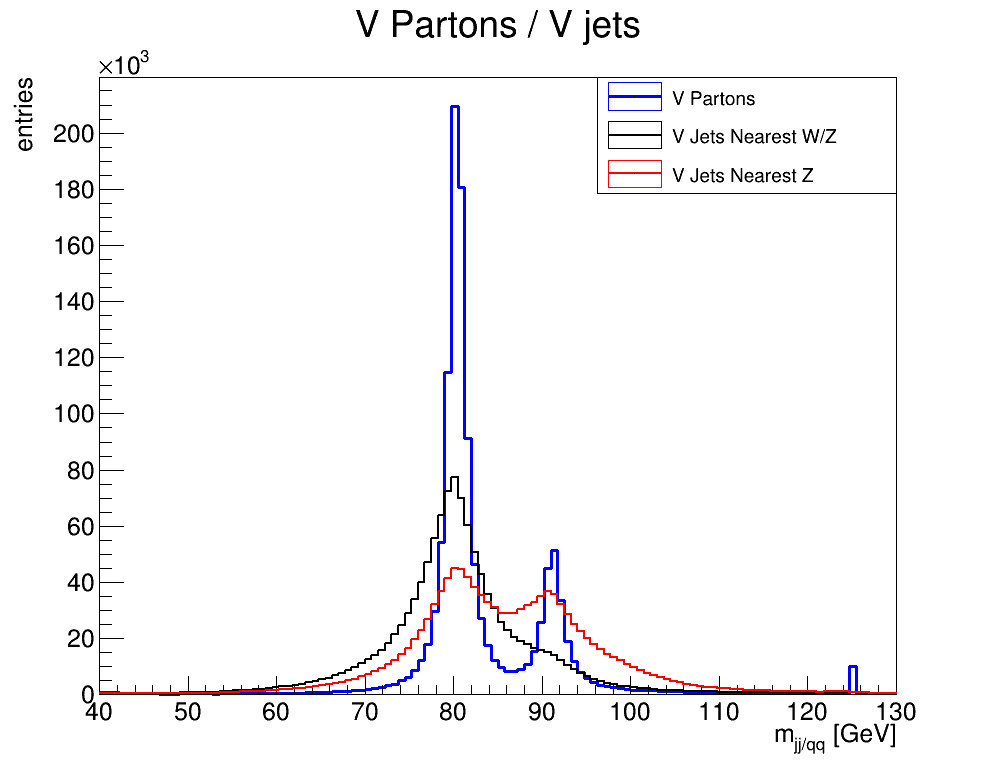

In [13]:
c1 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)
gStyle.SetOptStat(0)
h1.Draw("hist")
h1.SetLineWidth(3)
h.Draw("hist same")
h2.Draw("hist same")
h1.GetXaxis().SetTitle("m_{jj/qq} [GeV]")
h1.GetYaxis().SetTitle("entries")
legend = r.TLegend(0.6, 0.75, 0.9, 0.9)
legend.AddEntry(h1, "V Partons")
legend.AddEntry(h, "V Jets Nearest W/Z")
legend.AddEntry(h2, "V Jets Nearest Z")

legend.Draw()
h1.SetTitle("V Partons / V jets")
h_mw_deltaeta.SetTitle("V Partons and V Jets m_{jj/qq} nearest W or Z")
c1.Draw()


'\nc2 = r.TCanvas("c2", "canvas", 50, 50, 1200, 800)\nh_mw.Fit("fit","r")\nh_mw.Draw("hist same")\nh_mw.GetXaxis().SetTitle("Mw Mjj jet(GeV)")\nh_mw.GetYaxis().SetTitle("N events = 2000")\nl = r.TLegend(0.11,0.6,0.4,0.89)\nl.AddEntry(h_mw, "Energy distribution W pair")\nl.AddEntry(bw,"Breit Wigner fit")\nl.SetTextSize(0.03)\nl.SetBorderSize(0)\nl.Draw()\nc = r.TLatex(25,80000,"#sigma(E) = k #frac{#frac{#Gamma^{2}}{4}}{[(E-E_{0})^{2}+#frac{#Gamma^{2}}{4}]}")\nc.SetTextSize(0.04)\nc.Draw()\nc2.Draw()\nfitFcn = r.TF1("fitFcn",fitfunc,0,3,6);\nc1 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)\nh1.Draw("hist")\nh1.Fit("fitFcn")\nc1.Draw()\n'

 FCN=1820.69 FROM MIGRAD    STATUS=CONVERGED    1331 CALLS        1332 TOTAL
                     EDM=1.1208e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  k            1.48900e+04   5.28775e+01  -2.71164e-01  -3.49145e-07
   2  Gamma        2.47841e+00   8.56103e-03   4.24321e-05   1.90132e-02
   3  E0           9.12071e+01   3.54955e-03   3.06037e-07   3.66512e-02
   4  k1           6.74718e+04   1.21391e+02   2.34745e-01  -4.44463e-06
   5  Gamma1       1.88609e+00   3.04684e-03  -2.25939e-06  -5.98899e-02
   6  E01          8.03865e+01   1.40744e-03  -2.80656e-07   2.53919e-02
                               ERR DEF= 0.5


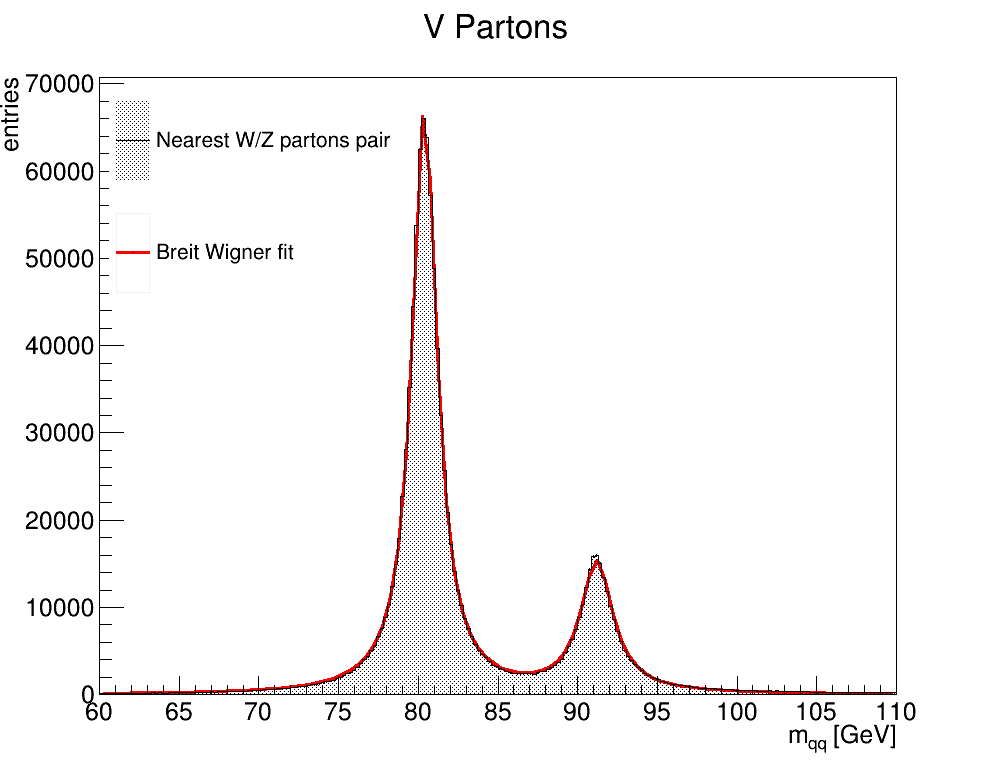

In [311]:
bw = r.TF1("fit", "[0]*(([1]^2)/4)/((x-[2])*(x-[2])+(([1]^2)/4)) + [3]*(([4]^2)/4)/((x-[5])*(x-[5])+(([4]^2)/4))", 0, 150)
bw.SetParNames("k", "Gamma", "E0", "k1", "Gamma1", "E01")
bw.SetLineColor(r.kBlack)
bw.SetLineStyle(1)
bw.SetLineColor(r.kRed)
bw.SetLineWidth(3)
h1.SetLineWidth(1)
bw.SetParameters(100, 2.7, 80,100, 2.5, 91)
c1 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)
#gStyle.SetOptStat(0)
#gStyle.SetOptFit(0)
#h1.Draw("hist")
h1.Fit("fit", "RL")
h1.Draw("hist same")
h1.GetXaxis().SetTitle("m_{qq} [GeV]")
h1.GetYaxis().SetTitleOffset(1.62)
l = r.TLegend(0.11,0.6,0.30,0.89)
l.AddEntry(h1, "Nearest W/Z partons pair")
l.AddEntry(bw,"Breit Wigner fit")
l.SetTextSize(0.03)
l.SetBorderSize(0)
l.Draw()
c = r.TLatex(83.5,27000,"#sigma = k_{W} #frac{#frac{#Gamma_{W}^{2}}{4}}{[(#sqrt{s}-m_{W})^{2}+#frac{#Gamma_{W}^{2}}{4}]}+k_{Z} #frac{#frac{#Gamma_{Z}^{2}}{4}}{[(#sqrt{s}-m_{Z})^{2}+#frac{#Gamma_{Z}^{2}}{4}]}")
c.SetTextSize(0.035)
#c.Draw()
c1.Draw()
"""
c2 = r.TCanvas("c2", "canvas", 50, 50, 1200, 800)
h_mw.Fit("fit","r")
h_mw.Draw("hist same")
h_mw.GetXaxis().SetTitle("Mw Mjj jet(GeV)")
h_mw.GetYaxis().SetTitle("N events = 2000")
l = r.TLegend(0.11,0.6,0.4,0.89)
l.AddEntry(h_mw, "Energy distribution W pair")
l.AddEntry(bw,"Breit Wigner fit")
l.SetTextSize(0.03)
l.SetBorderSize(0)
l.Draw()
c = r.TLatex(25,80000,"#sigma(E) = k #frac{#frac{#Gamma^{2}}{4}}{[(E-E_{0})^{2}+#frac{#Gamma^{2}}{4}]}")
c.SetTextSize(0.04)
c.Draw()
c2.Draw()
fitFcn = r.TF1("fitFcn",fitfunc,0,3,6);
c1 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)
h1.Draw("hist")
h1.Fit("fitFcn")
c1.Draw()
"""

                   

c2 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)
gStyle.SetOptStat(0)
h.Draw("hist same")
h.GetXaxis().SetTitle("m_{qq} [GeV]")
h.GetYaxis().SetTitle("entries")
h.SetTitle("Partons VBS-pair m_{pp} distribution")
c2.Draw()

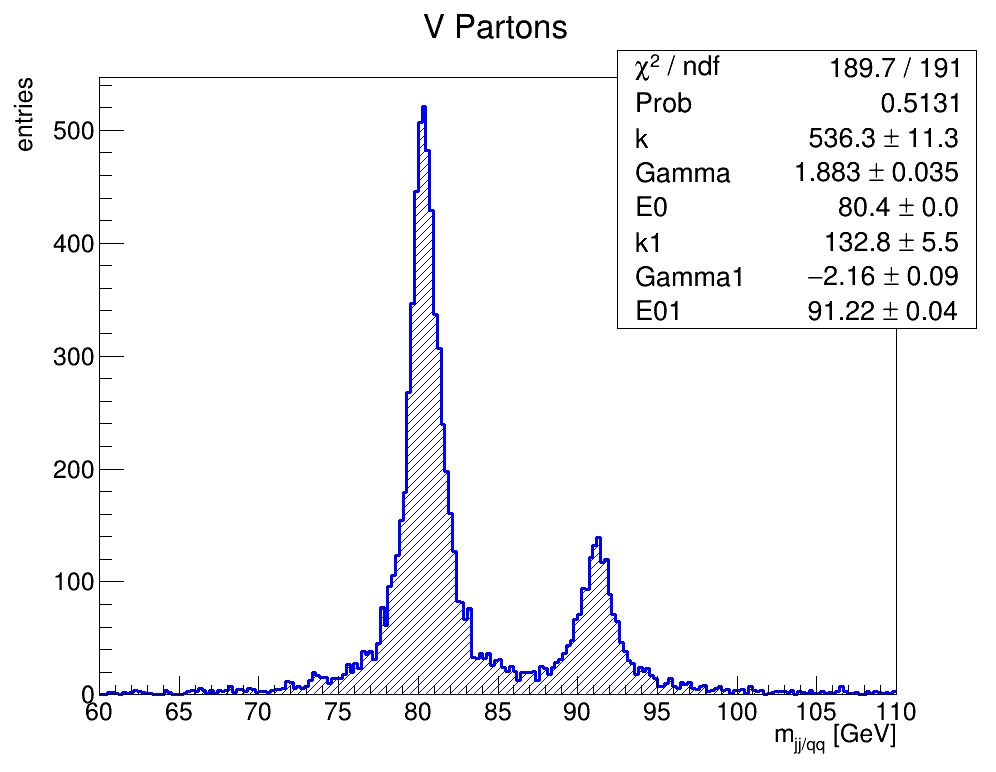

In [146]:
c2 = r.TCanvas("dist", "dist", 50, 50, 1000, 800)
gStyle.SetOptStat(0)
h1.Draw("hist")
h.GetXaxis().SetTitle("m_{qq} [GeV]")
h.GetYaxis().SetTitle("entries")
c2.Draw()

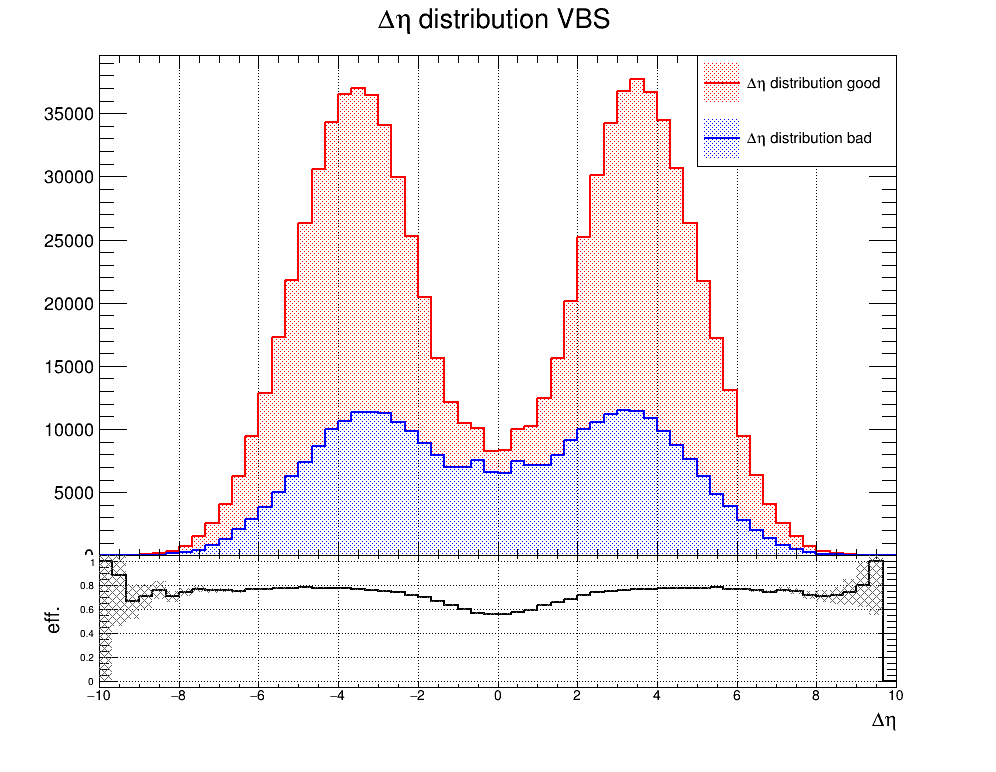

In [54]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_mw_deltaeta_max.Draw("nostack hist")
legend = plotter.createLegend(h_mw_deltaeta_max, h_mw_deltaeta_max_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_mw_deltaeta_max, h_mw_deltaeta_max +h_mw_deltaeta_max_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "#Delta#eta")
c2.Draw()

In [15]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    #("n_events", 100),
    ("atleastone_mjj_M", 250)
    
]

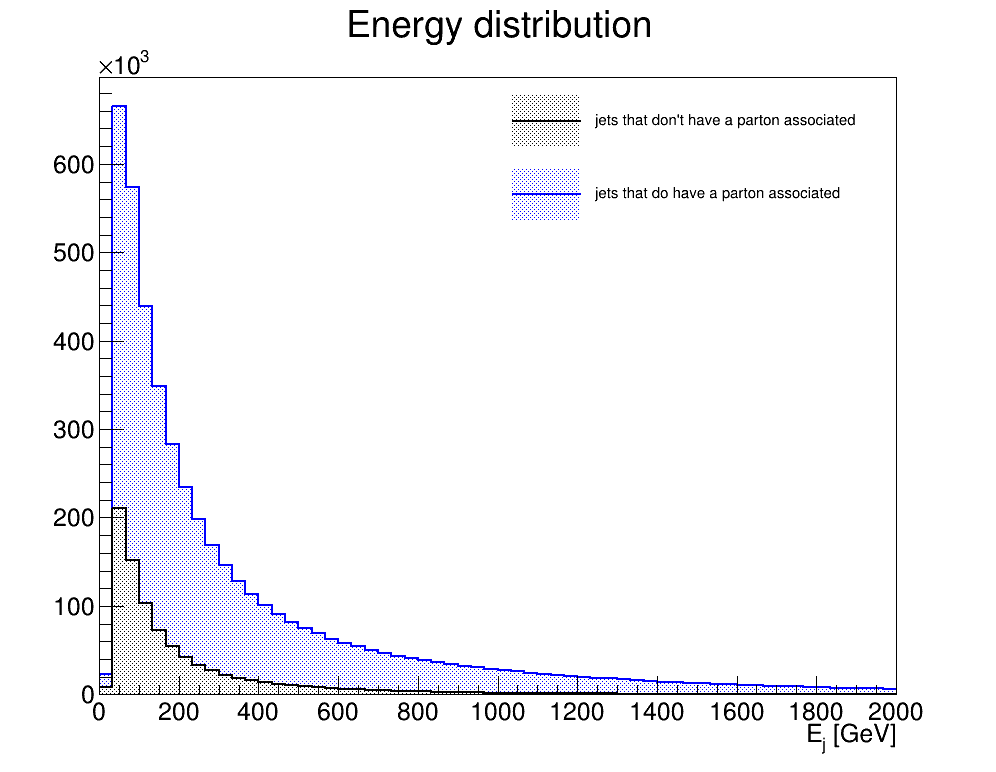

In [16]:
h = r.TH1F("h", "h", 60, 0, 2000)
h.SetLineWidth(2)
h.SetLineColor(r.kBlue)
h.SetFillColor(r.kBlue)
h.SetFillStyle(3003)
h1 = r.TH1F("h1", "h1", 60, 0, 2000)
h1.SetLineWidth(2)
h1.SetLineColor(r.kBlack)
h1.SetFillColor(r.kBlack)
h1.SetFillStyle(3003)
for evento in EventIterator(f, criteria = cuts, pairing = True):
    for j in evento.jets:
        if evento.paired_parton(j) == None:
            h1.Fill(j.E())
        else: 
            h.Fill(j.E())

c1 = r.TCanvas("c1", "c1", 50, 50, 1000, 800)
gStyle.SetOptStat(0)
h.Draw("histo")
h1.Draw("histo same")
h.SetTitle("Energy distribution")
legend = r.TLegend()
h.GetXaxis().SetTitle("E_{j} [GeV]")
legend = r.TLegend(0.5, 0.7, 0.89, 0.89)
legend.SetBorderSize(0)
legend.AddEntry(h1, "jets that don't have a parton associated")
legend.AddEntry(h, "jets that do have a parton associated")
legend.Draw()
c1.Draw()
    

In [4]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con 80 Gev
hs_mw_deltaeta = r.THStack("hs_mjj_mw","Mw jet");
h_mw_deltaeta = r.TH1F("mw_good", "Mw good ", 60, 20, 150 )
h_mw_deltaeta.SetLineColor(r.kRed)
h_mw_deltaeta.SetFillColor(r.kRed)
h_mw_deltaeta.SetFillStyle(3004)
hs_mw_deltaeta.Add(h_mw_deltaeta)
h_mw_deltaeta_bad = r.TH1F("mw_bad ", "Mw bad ", 60, 20, 150 )
h_mw_deltaeta_bad.SetLineColor(r.kBlue)
h_mw_deltaeta_bad.SetFillColor(r.kBlue)
h_mw_deltaeta_bad.SetFillStyle(3005)
hs_mw_deltaeta.Add(h_mw_deltaeta_bad)

In [5]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_mw_deltaeta_max = r.THStack("hs_mw_deltaeta_max","Max deltaeta jets");
h_mw_deltaeta_max = r.TH1F("deltaeta_max_good", "deltaeta massima good ", 60, 20, 3000 )
h_mw_deltaeta_max.SetLineColor(r.kRed)
h_mw_deltaeta_max.SetFillColor(r.kRed)
h_mw_deltaeta_max.SetFillStyle(3004)
hs_mw_deltaeta_max.Add(h_mw_deltaeta_max)
h_mw_deltaeta_max_bad = r.TH1F("deltaeta_max_bad ", "deltaeta massima bad ", 60, 20, 3000 )
h_mw_deltaeta_max_bad.SetLineColor(r.kBlue)
h_mw_deltaeta_max_bad.SetFillColor(r.kBlue)
h_mw_deltaeta_max_bad.SetFillStyle(3005)
hs_mw_deltaeta_max.Add(h_mw_deltaeta_max_bad)

In [6]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mw_deltaeta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, [j for j in jets_pair1.vbsjets])
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, [j for j in jets_pair1.vjets])
    if associazione:
        #due getti con deltaeta più grande indici corrispondono a partoni
        h_mw_deltaeta_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con deltaeta più grande indici NON corrispondono a partoni
        h_mw_deltaeta_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_mw_deltaeta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_mw_deltaeta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

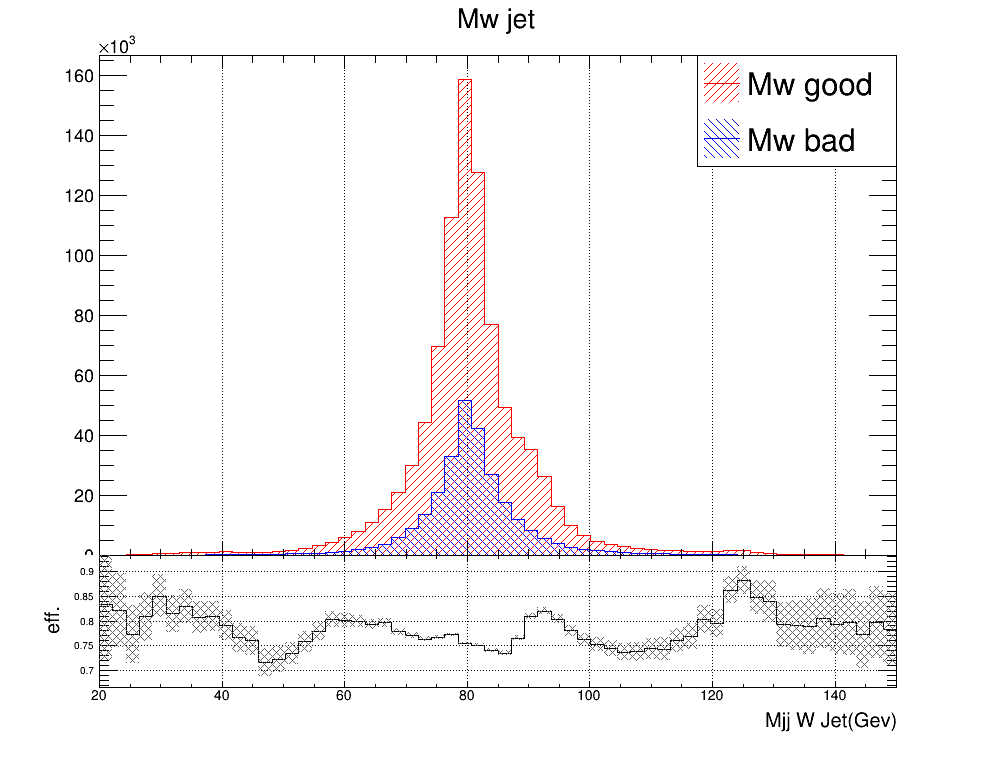

In [7]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mw_deltaeta.Draw("nostack hist")
legend = plotter.createLegend(h_mw_deltaeta, h_mw_deltaeta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mw_deltaeta, h_mw_deltaeta +h_mw_deltaeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

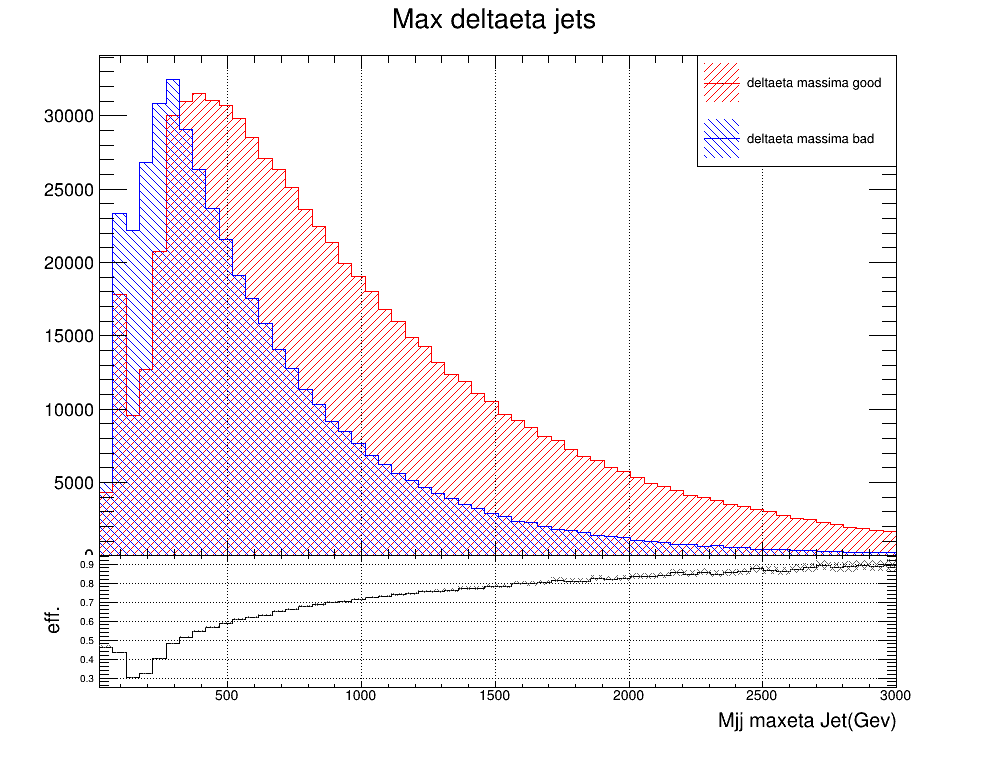

In [8]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_mw_deltaeta_max.Draw("nostack hist")
legend = plotter.createLegend(h_mw_deltaeta_max, h_mw_deltaeta_max_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_mw_deltaeta_max, h_mw_deltaeta_max +h_mw_deltaeta_max_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj maxeta Jet(Gev)")
c2.Draw()

In [9]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.5879727216367018


# DELTAETA_MW

In [10]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con 80 Gev
hs_deltaeta_mw, h_deltaeta_mw, h_deltaeta_mw_bad = plotter.StackCreator1("Mw jets", "Mw good", "Mw bad")

In [11]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_deltaeta_mw_max, h_deltaeta_mw_max, h_deltaeta_mw_max_bad = plotter.StackCreator2("Max deltaeta jets", "deltaeta max good", "deltaeta max bad")

In [12]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_deltaeta_mw(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair,  jets_pair1.vjets)
    if associazione:
        #due getti con deltaeta più grande indici corrispondono a partoni
        h_deltaeta_mw_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con deltaeta più grande indici NON corrispondono a partoni
        h_deltaeta_mw_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_deltaeta_mw.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_deltaeta_mw_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

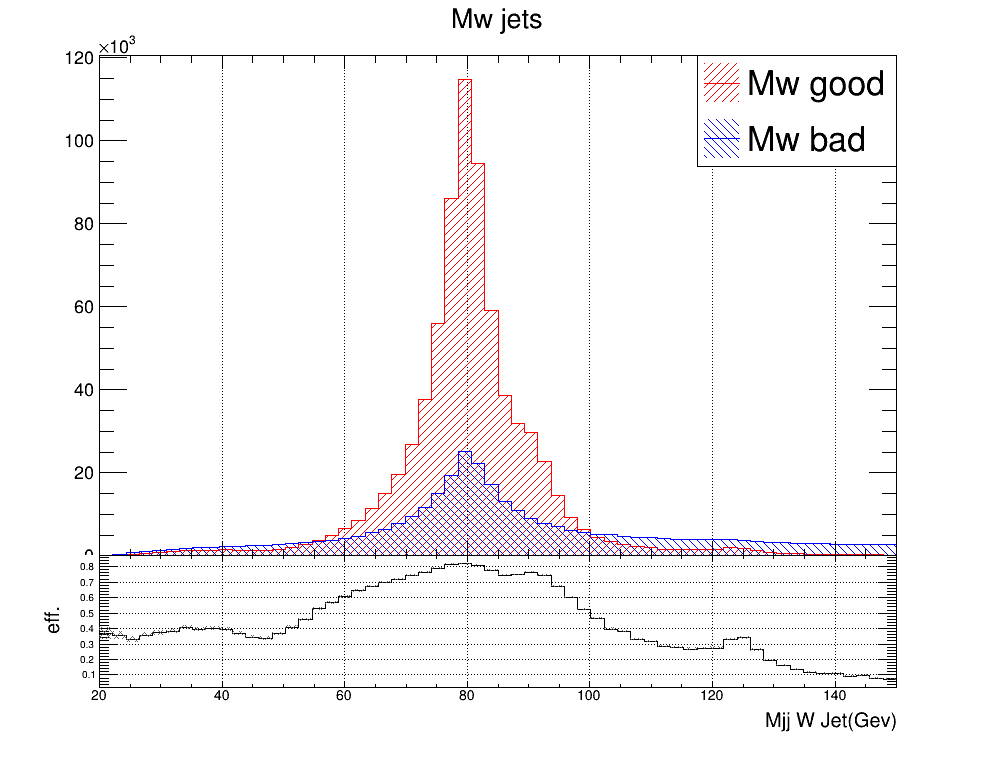

In [13]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_deltaeta_mw.Draw("nostack hist")
legend = plotter.createLegend(h_deltaeta_mw, h_deltaeta_mw_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_deltaeta_mw, h_deltaeta_mw +h_deltaeta_mw_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

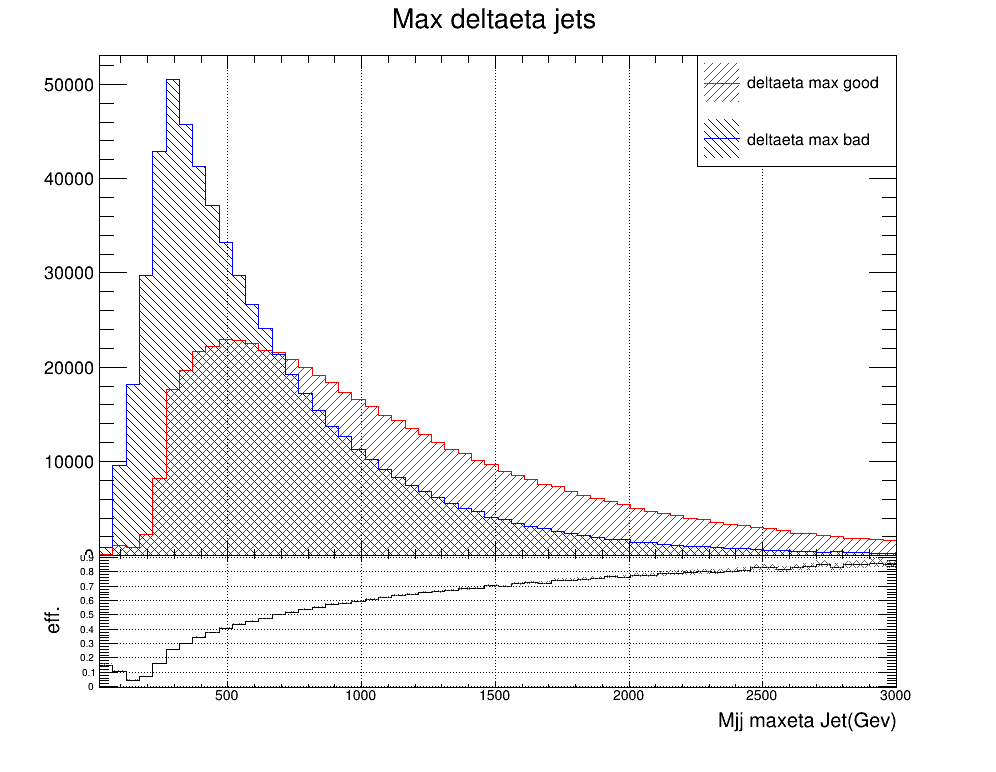

In [14]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_deltaeta_mw_max.Draw("nostack hist")
legend = plotter.createLegend(h_deltaeta_mw_max, h_deltaeta_mw_max_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_deltaeta_mw_max, h_deltaeta_mw_max +h_deltaeta_mw_max_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj maxeta Jet(Gev)")
c2.Draw()

In [15]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.4580467038644348


# Mjj_MW

In [4]:
#definisco uno stack per le associazioni getti partoni con strategia mjj mw (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massa
#invariante più vicina a 80 Gev) questo stack è per l'associazione getti-partoni con 80 Gev
hs_mjj_mw, h_mjj_mw, h_mjj_mw_bad = plotter.StackCreator1("Mw jets", "Mw good", "Mw bad")

In [5]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_mjj_mw_max, h_mjj_mw_max, h_mjj_mw_max_bad = plotter.StackCreator2("Max Mjj jets", "Mjj max good", "Mjj max bad")

In [6]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_mw(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mjj_mw_max.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mjj_mw_max_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_mjj_mw.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_mjj_mw_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

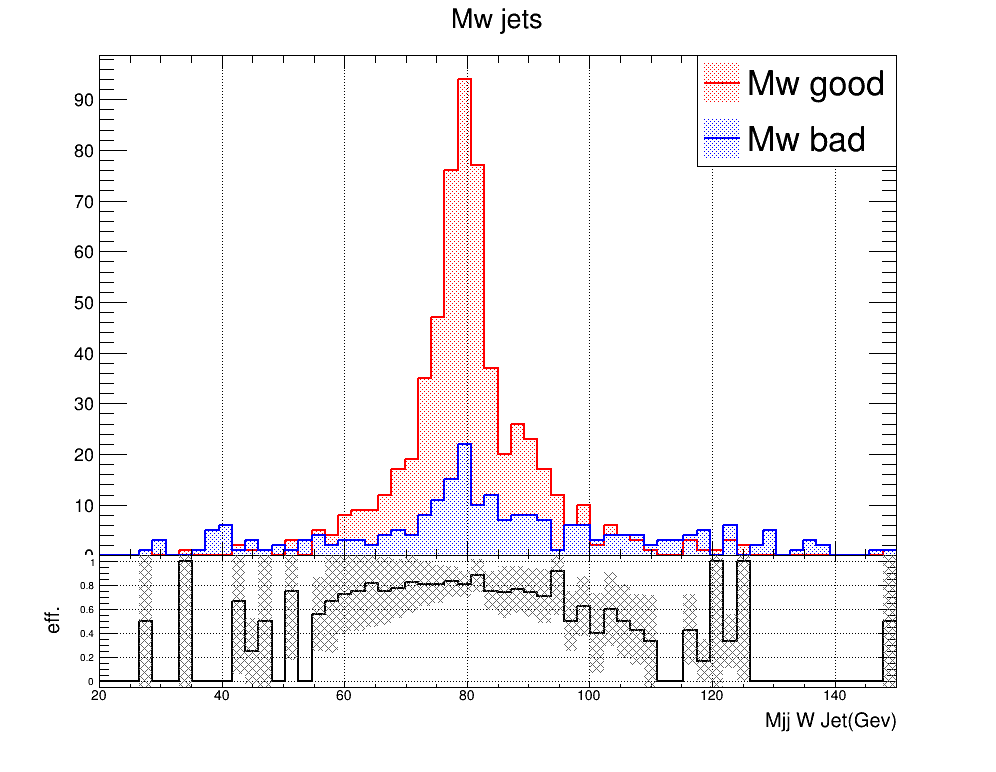

In [7]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj_mw.Draw("nostack hist")
legend = plotter.createLegend(h_mjj_mw, h_mjj_mw_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj_mw, h_mjj_mw +h_mjj_mw_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W Jet(Gev)")
hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

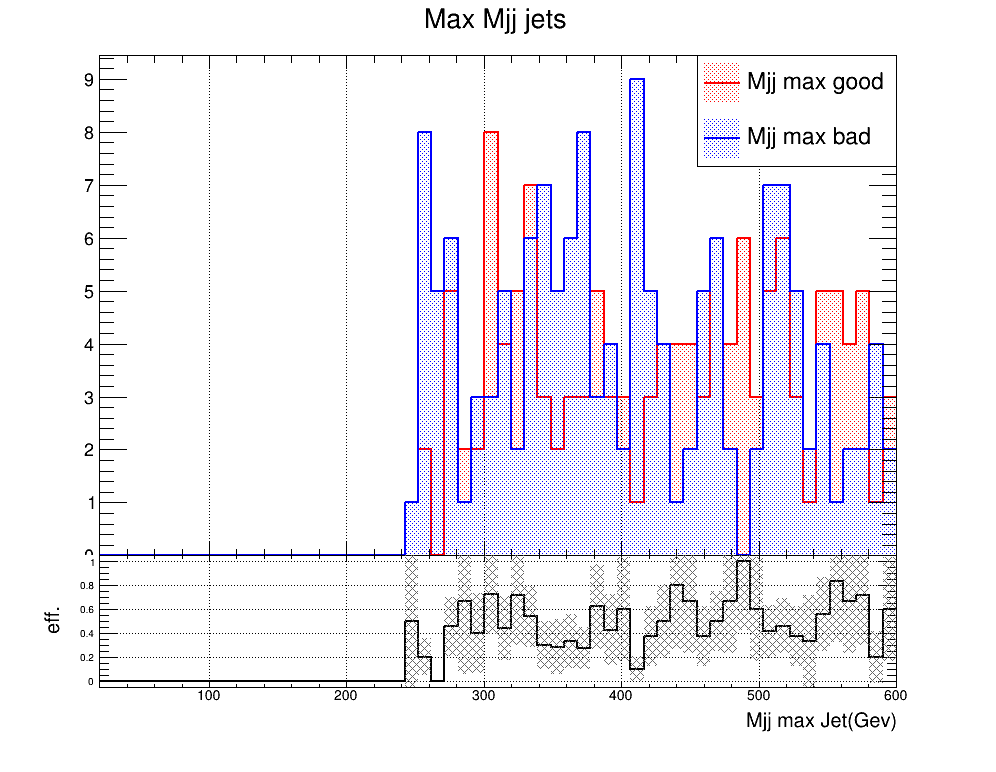

In [8]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_mjj_mw_max.Draw("nostack hist")
legend = plotter.createLegend(h_mjj_mw_max, h_mjj_mw_max_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_mjj_mw_max, h_mjj_mw_max +h_mjj_mw_max_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj max Jet(Gev)")
c2.Draw()

In [9]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.6112994350282486


# MW_Mjj

In [5]:
#definisco uno stack per le associazioni getti partoni con strategia mjj mw (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massa
#invariante più vicina a 80 Gev) questo stack è per l'associazione getti-partoni con 80 Gev
hs_mw_mjj, h_mw_mjj, h_mw_mjj_bad = plotter.StackCreator1("Mw jets", "Mw good", "Mw bad")

In [6]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_mw_mjj_max, h_mw_mjj_max, h_mw_mjj_max_bad = plotter.StackCreator2("Max Mjj jets", "Mjj max good", "Mjj max bad")

In [7]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mw_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mw_mjj_max.Fill(jets_pair1.vbsjets[0].Eta()-jets_pair1.vbsjets[1].Eta())
    else:
        #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mw_mjj_max_bad.Fill(jets_pair1.vbsjets[0].Eta()-jets_pair1.vbsjets[1].Eta())
    if associazione2:
        #due getti con massa invariante più vicina alla W indici corrispondono a partoni
        h_mw_mjj.Fill(jets_pair1.vjets[0].Eta()-jets_pair1.vjets[1].Eta())
    else:
         #due getti con massa invariante più vicina alla W indici NON corrispondono a partoni
        h_mw_mjj_bad.Fill(jets_pair1.vjets[0].Eta()-jets_pair1.vjets[1].Eta())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

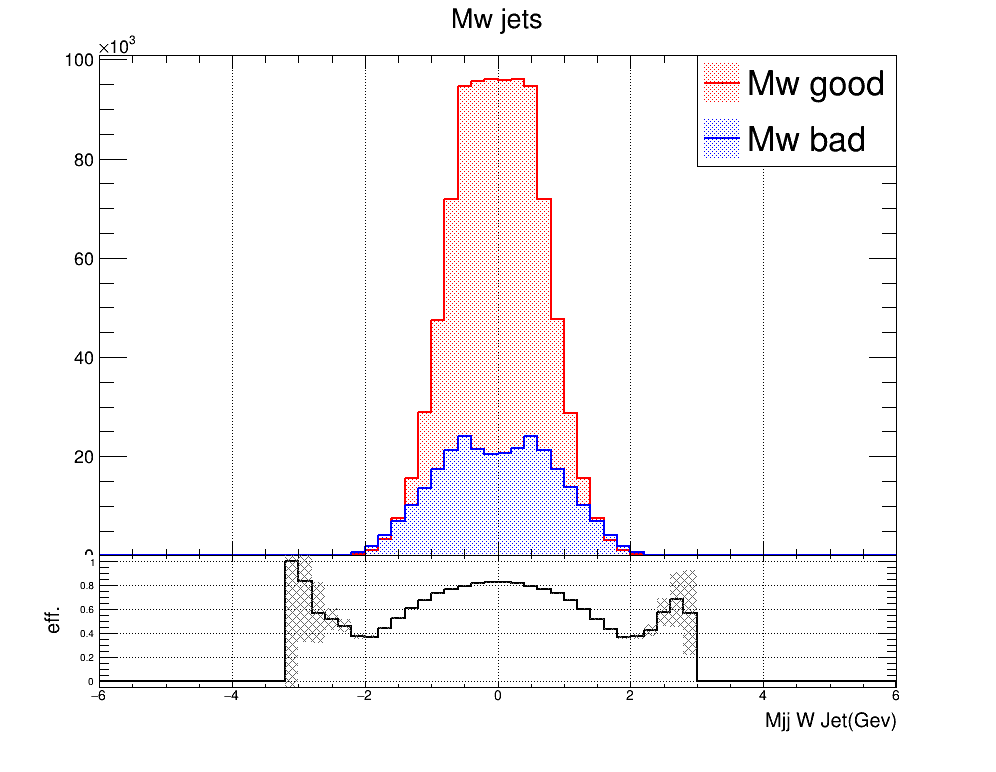

In [8]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mw_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mw_mjj, h_mw_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mw_mjj, h_mw_mjj +h_mw_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

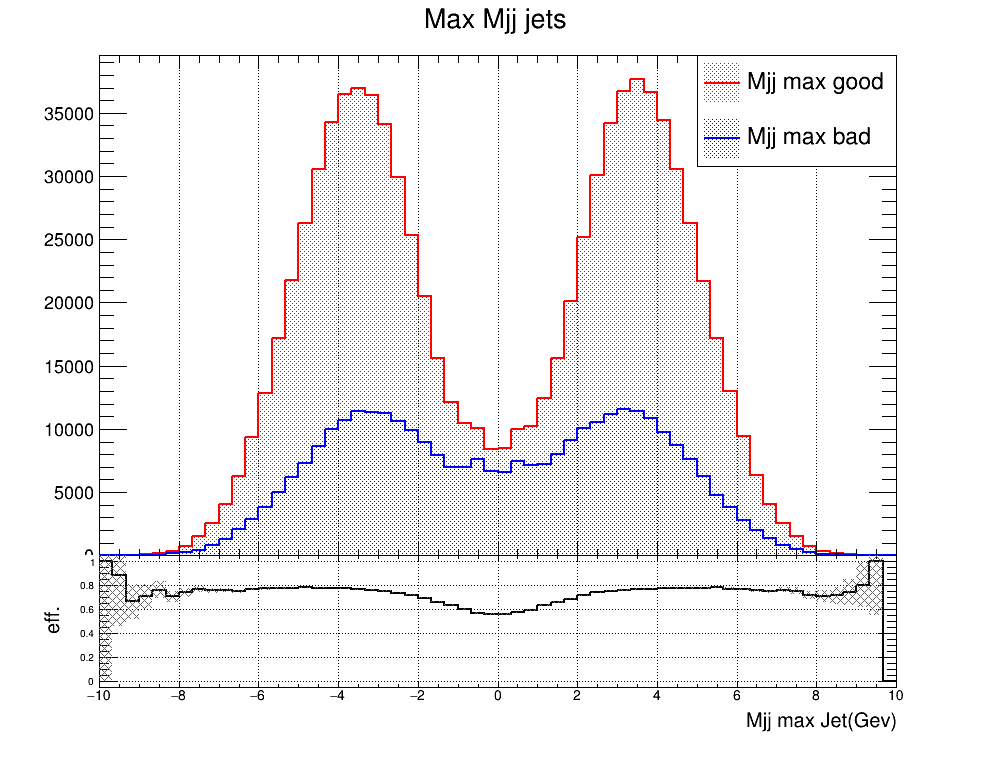

In [9]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_mw_mjj_max.Draw("nostack hist")
legend = plotter.createLegend(h_mw_mjj_max, h_mw_mjj_max_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_mw_mjj_max, h_mw_mjj_max +h_mw_mjj_max_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj max Jet(Gev)")
c2.Draw()

In [10]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.6768076048770407


# Mjj-MaxPt

In [28]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj_maxpt_mjj, h_mjj_maxpt_mjj, h_mjj_maxpt_mjj_bad = plotter.StackCreator2("max Mjj jets", "Mjj good", "Mjj bad")

In [29]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_mjj_maxpt_maxpt, h_mjj_maxpt_maxpt, h_mjj_maxpt_maxpt_bad = plotter.StackCreator1("Max pt jets", "Mjj maxpt good", "Mjj maxpt bad")

In [30]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_maxpt(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj_maxpt_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_maxpt_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mjj_maxpt_maxpt.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mjj_maxpt_maxpt_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

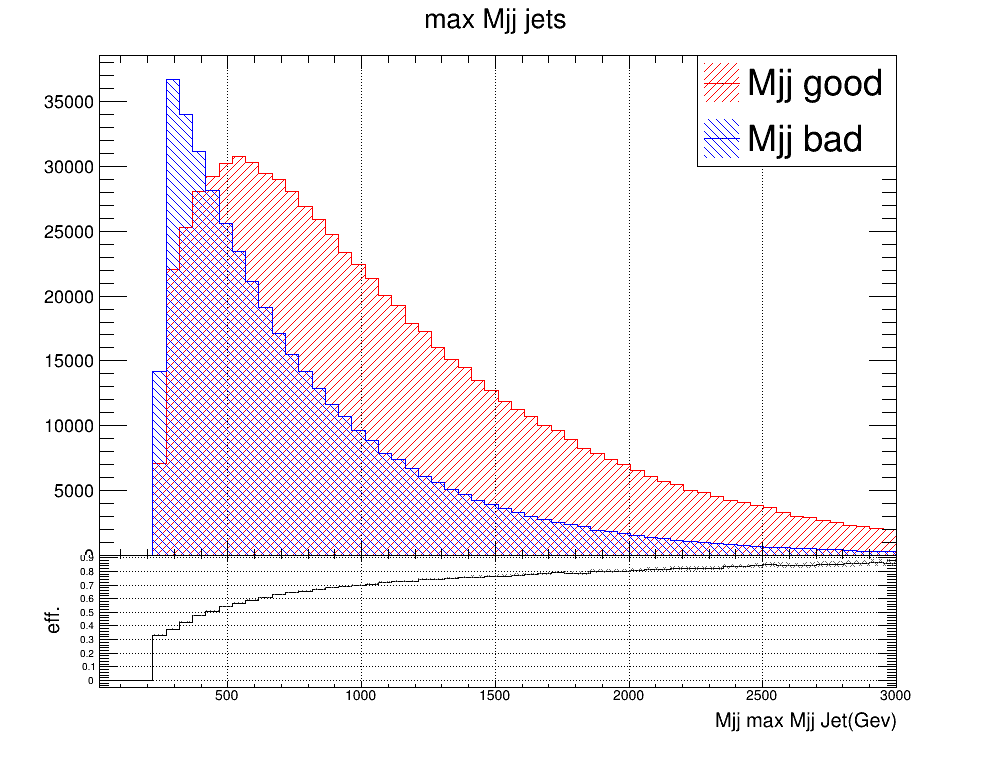

In [31]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj_maxpt_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj_maxpt_mjj, h_mjj_maxpt_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj_maxpt_mjj, h_mjj_maxpt_mjj +h_mjj_maxpt_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj max Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

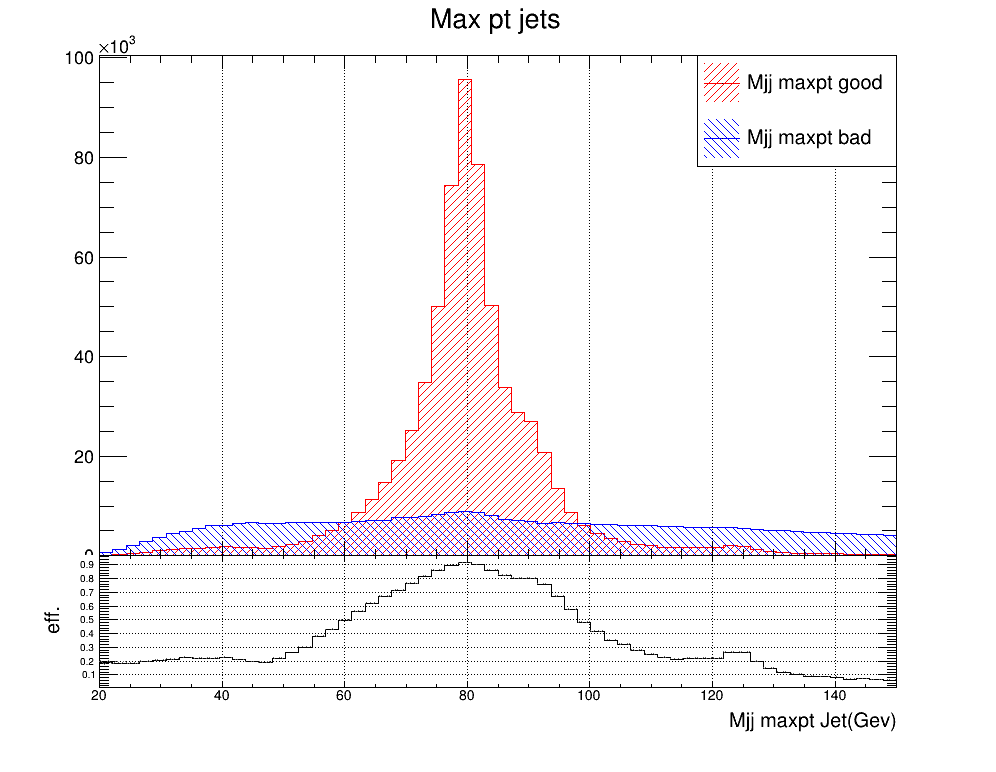

In [32]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_mjj_maxpt_maxpt.Draw("nostack hist")
legend = plotter.createLegend(h_mjj_maxpt_maxpt, h_mjj_maxpt_maxpt_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_mjj_maxpt_maxpt, h_mjj_maxpt_maxpt +h_mjj_maxpt_maxpt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj maxpt Jet(Gev)")
c2.Draw()

In [33]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.5251184128952263


# Maxpt-Mjj

In [34]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_maxpt_mjj_mjj, h_maxpt_mjj_mjj, h_maxpt_mjj_mjj_bad = plotter.StackCreator2("max Mjj jets", "Mjj good", "Mjj bad")

In [35]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_maxpt_mjj_maxpt, h_maxpt_mjj_maxpt, h_maxpt_mjj_maxpt_bad = plotter.StackCreator1("Max pt jets", "Mjj maxpt good", "Mjj maxpt bad")

In [36]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_maxpt_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_maxpt_mjj_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_maxpt_mjj_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_maxpt_mjj_maxpt.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_maxpt_mjj_maxpt_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

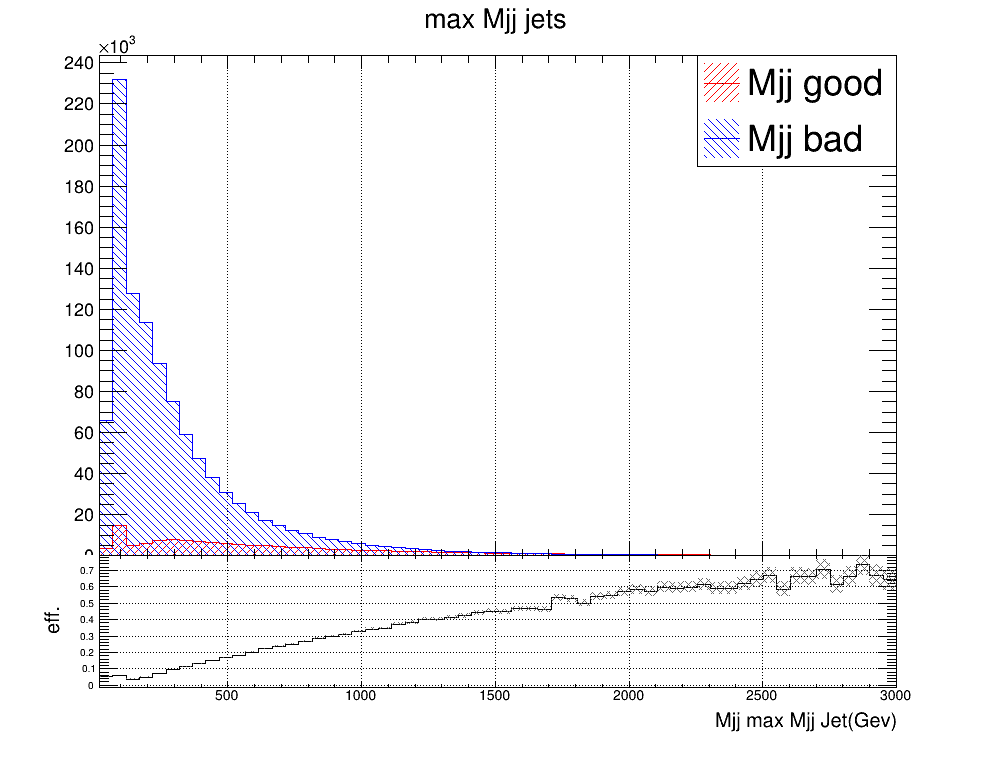

In [37]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_maxpt_mjj_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_maxpt_mjj_mjj, h_maxpt_mjj_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_maxpt_mjj_mjj, h_maxpt_mjj_mjj +h_maxpt_mjj_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj max Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

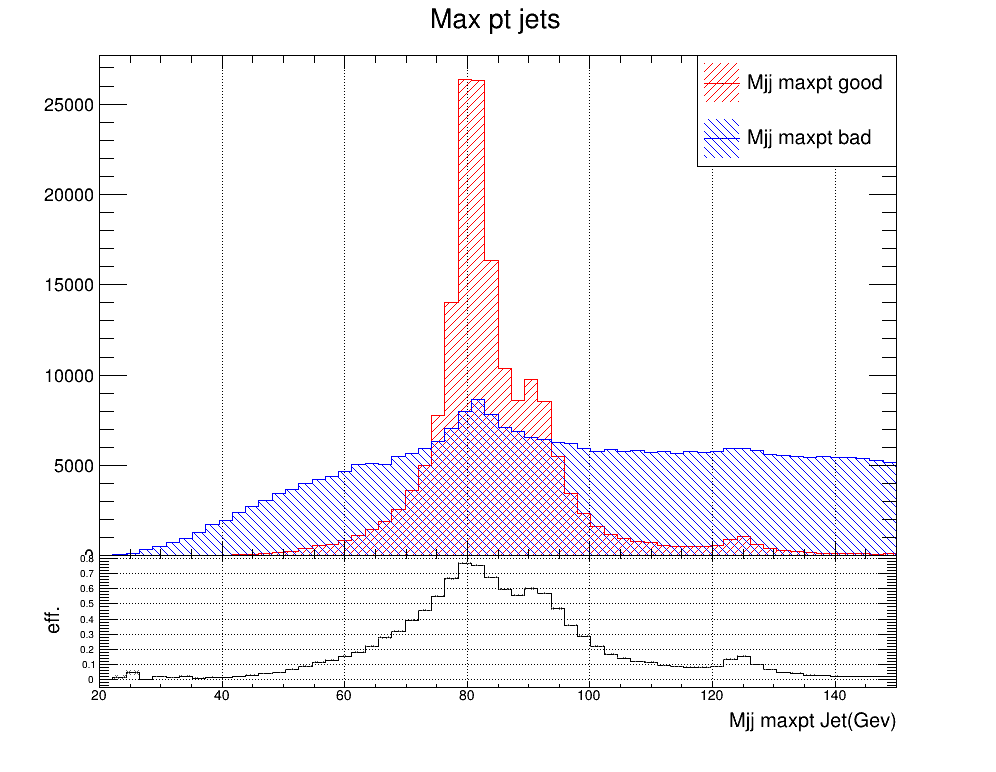

In [38]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_maxpt_mjj_maxpt.Draw("nostack hist")
legend = plotter.createLegend(h_maxpt_mjj_maxpt, h_maxpt_mjj_maxpt_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_maxpt_mjj_maxpt, h_maxpt_mjj_maxpt +h_maxpt_mjj_maxpt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj maxpt Jet(Gev)")
c2.Draw()

In [39]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.11748708410828683


# MaxPt-Deltaeta

In [40]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_maxpt_deltaeta_deltaeta, h_maxpt_deltaeta_deltaeta, h_maxpt_deltaeta_deltaeta_bad = plotter.StackCreator2("maxdeltaeta Mjj jets", "deltaeta good", "deltaeta bad")

In [41]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_maxpt_deltaeta_maxpt, h_maxpt_deltaeta_maxpt, h_maxpt_deltaeta_maxpt_bad = plotter.StackCreator1("Max pt jets", "Mjj maxpt good", "Mjj maxpt bad")

In [42]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_maxpt_deltaeta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_maxpt_deltaeta_deltaeta.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_maxpt_deltaeta_deltaeta_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_maxpt_deltaeta_maxpt.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_maxpt_deltaeta_maxpt_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

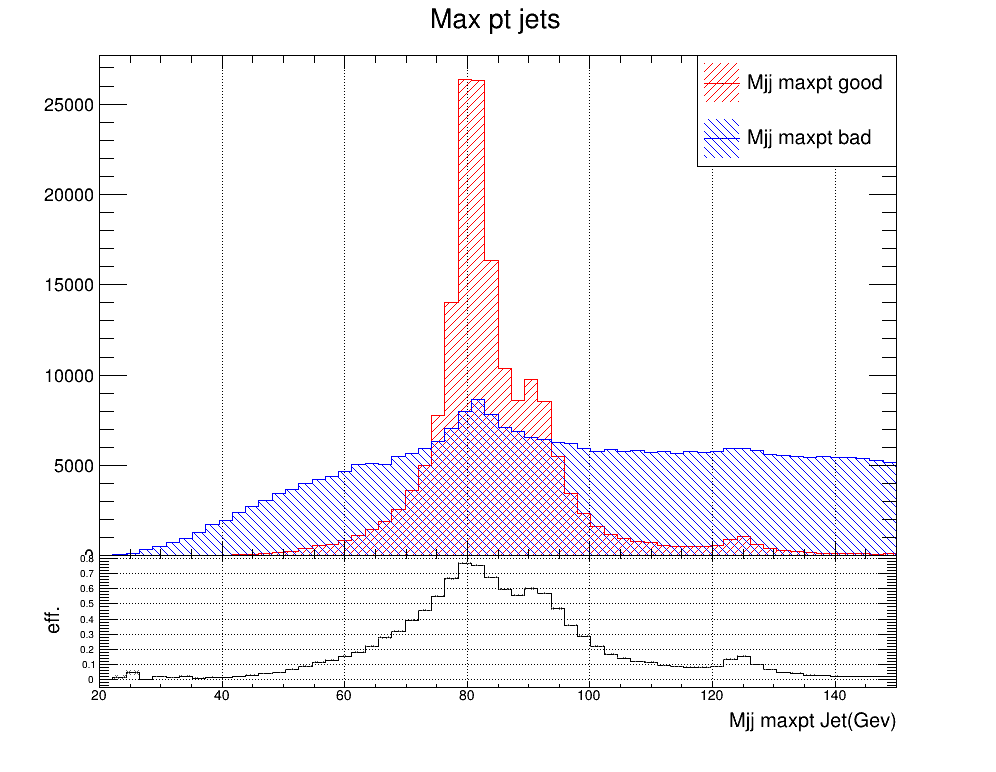

In [43]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_maxpt_deltaeta_maxpt.Draw("nostack hist")
legend = plotter.createLegend(h_maxpt_deltaeta_maxpt, h_maxpt_deltaeta_maxpt_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_maxpt_deltaeta_maxpt, h_maxpt_deltaeta_maxpt +h_maxpt_deltaeta_maxpt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj maxpt Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

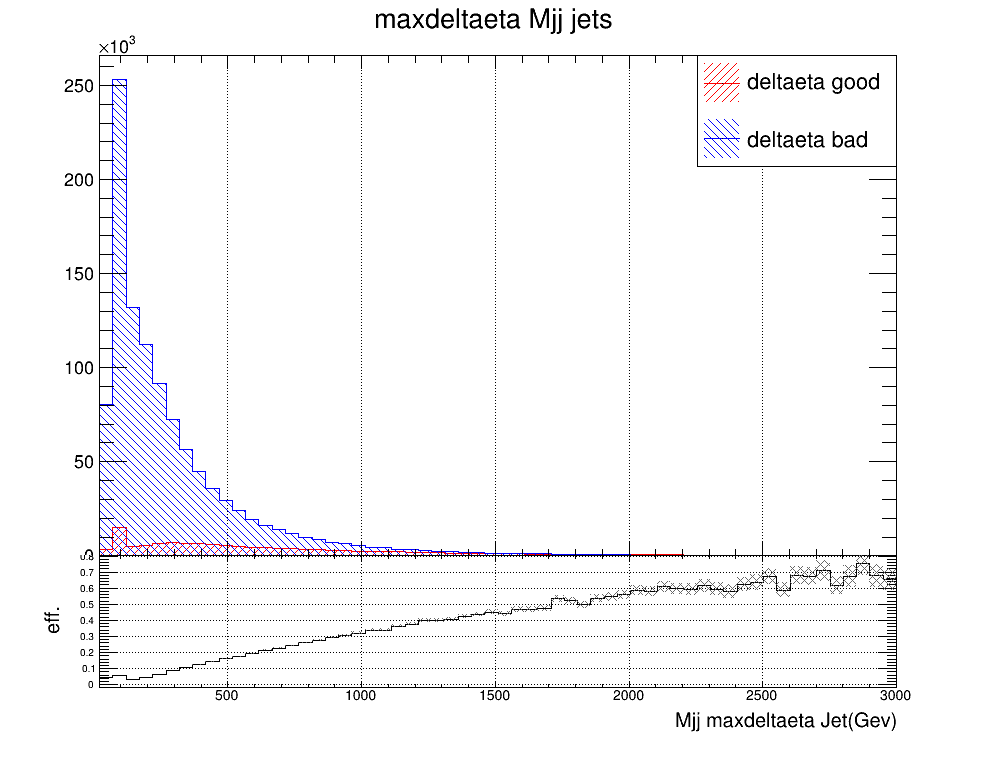

In [44]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_maxpt_deltaeta_deltaeta.Draw("nostack hist")
legend = plotter.createLegend(h_maxpt_deltaeta_deltaeta, h_maxpt_deltaeta_deltaeta_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_maxpt_deltaeta_deltaeta, h_maxpt_deltaeta_deltaeta +h_maxpt_deltaeta_deltaeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj maxdeltaeta Jet(Gev)")
c2.Draw()

In [45]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.10792808431494111


# deltaeta-maxpt 

In [46]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_maxpt_deltaeta_deltaeta, h_maxpt_deltaeta_deltaeta, h_maxpt_deltaeta_deltaeta_bad = plotter.StackCreator2("maxdeltaeta Mjj jets", "deltaeta good", "deltaeta bad")

In [47]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_maxpt_deltaeta_maxpt, h_maxpt_deltaeta_maxpt, h_maxpt_deltaeta_maxpt_bad = plotter.StackCreator1("Max pt jets", "Mjj maxpt good", "Mjj maxpt bad")

In [48]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_deltaeta_maxpt(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair,  jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_maxpt_deltaeta_deltaeta.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_maxpt_deltaeta_deltaeta_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_maxpt_deltaeta_maxpt.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_maxpt_deltaeta_maxpt_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

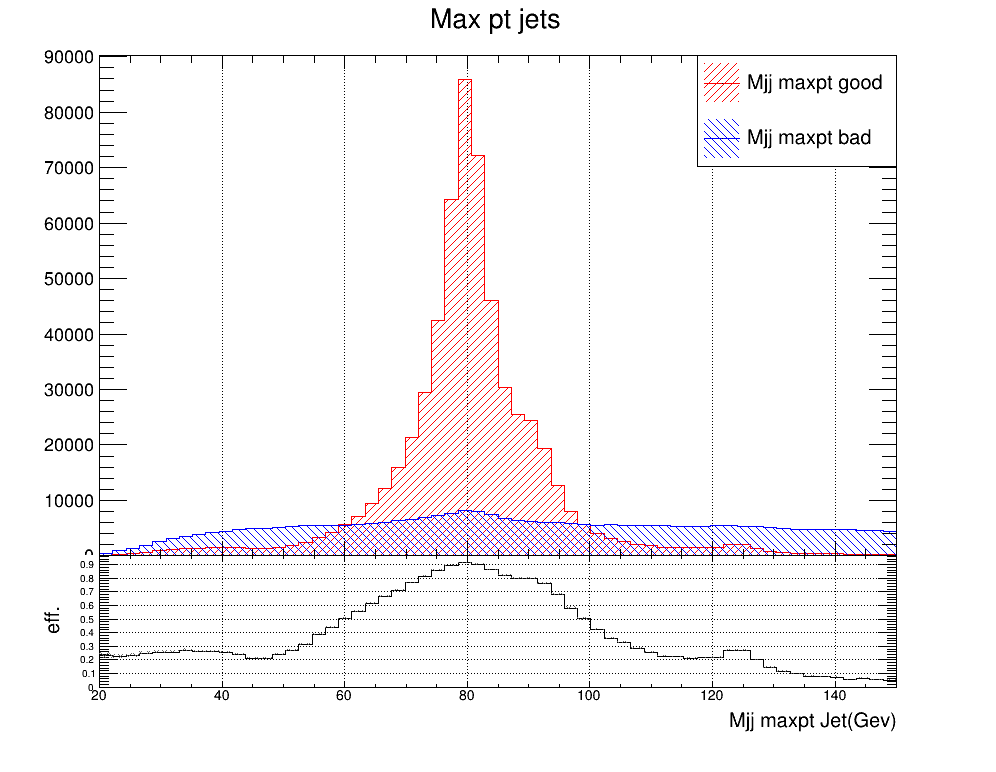

In [49]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_maxpt_deltaeta_maxpt.Draw("nostack hist")
legend = plotter.createLegend(h_maxpt_deltaeta_maxpt, h_maxpt_deltaeta_maxpt_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_maxpt_deltaeta_maxpt, h_maxpt_deltaeta_maxpt +h_maxpt_deltaeta_maxpt_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj maxpt Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

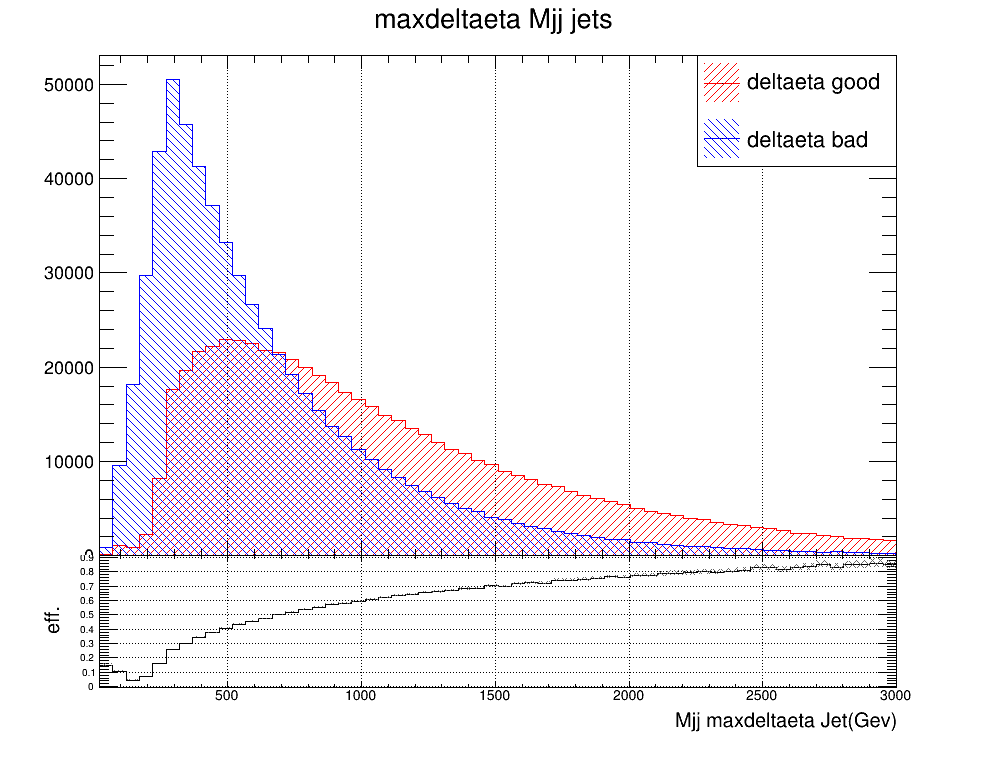

In [50]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_maxpt_deltaeta_deltaeta.Draw("nostack hist")
legend = plotter.createLegend(h_maxpt_deltaeta_deltaeta, h_maxpt_deltaeta_deltaeta_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_maxpt_deltaeta_deltaeta, h_maxpt_deltaeta_deltaeta +h_maxpt_deltaeta_deltaeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj maxdeltaeta Jet(Gev)")
c2.Draw()

In [51]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.4342277330026865


# Mindeltaeta-Mjj

In [64]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mineta_mjj_mineta, h_mineta_mjj_mineta, h_mineta_mjj_mineta_bad = plotter.StackCreator1("Min deltaeta Mjj jets", "Min deltaeta good", "Min deltaeta bad")

In [65]:
#definisco uno stack per le associazioni getti partoni con strategia mw deltaeta (seleziono prima
#i due getti con massa invariante + vicina a W e, dai rimanenti, seleziono quelli con deltaeta 
# maggiore) questo stack è per l'associazione getti-partoni con deltaeta più grande
hs_mineta_mjj_mjj, h_mineta_mjj_mjj, h_mineta_mjj_mjj_bad = plotter.StackCreator2("Max Mjj jets", "Mjj Max Mjj good", "Mjj Max Mjj bad")

In [66]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mindeltaeta_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mineta_mjj_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mineta_mjj_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mineta_mjj_mineta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mineta_mjj_mineta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

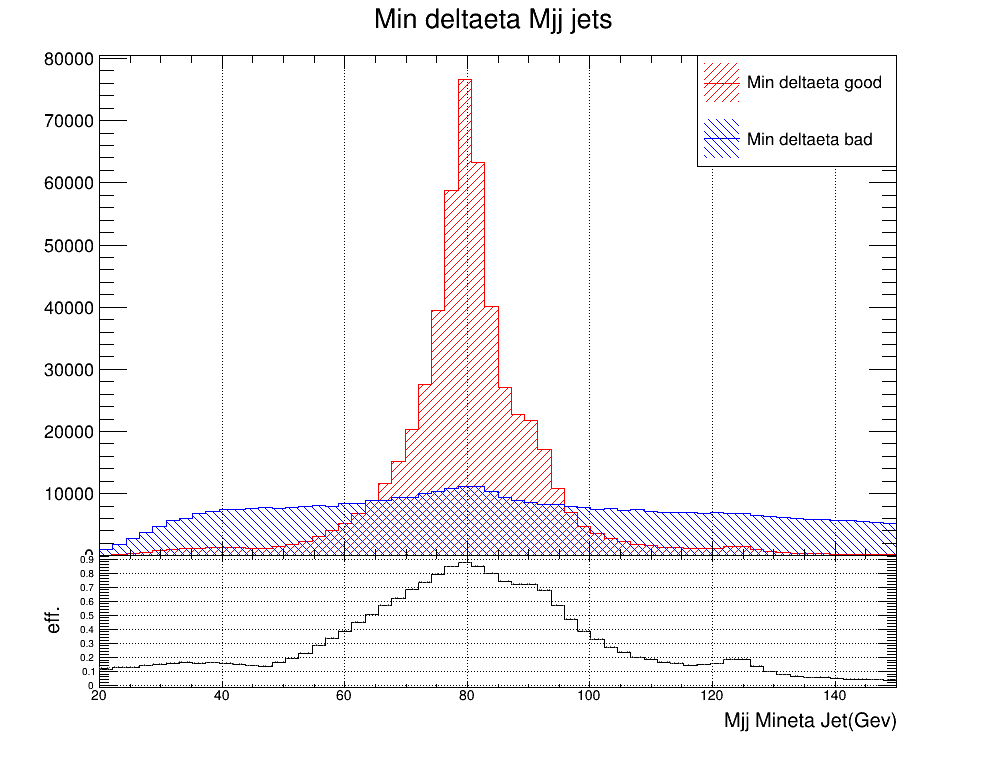

In [67]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mineta_mjj_mineta.Draw("nostack hist")
legend = plotter.createLegend(h_mineta_mjj_mineta, h_mineta_mjj_mineta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mineta_mjj_mineta, h_mineta_mjj_mineta +h_mineta_mjj_mineta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj Mineta Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

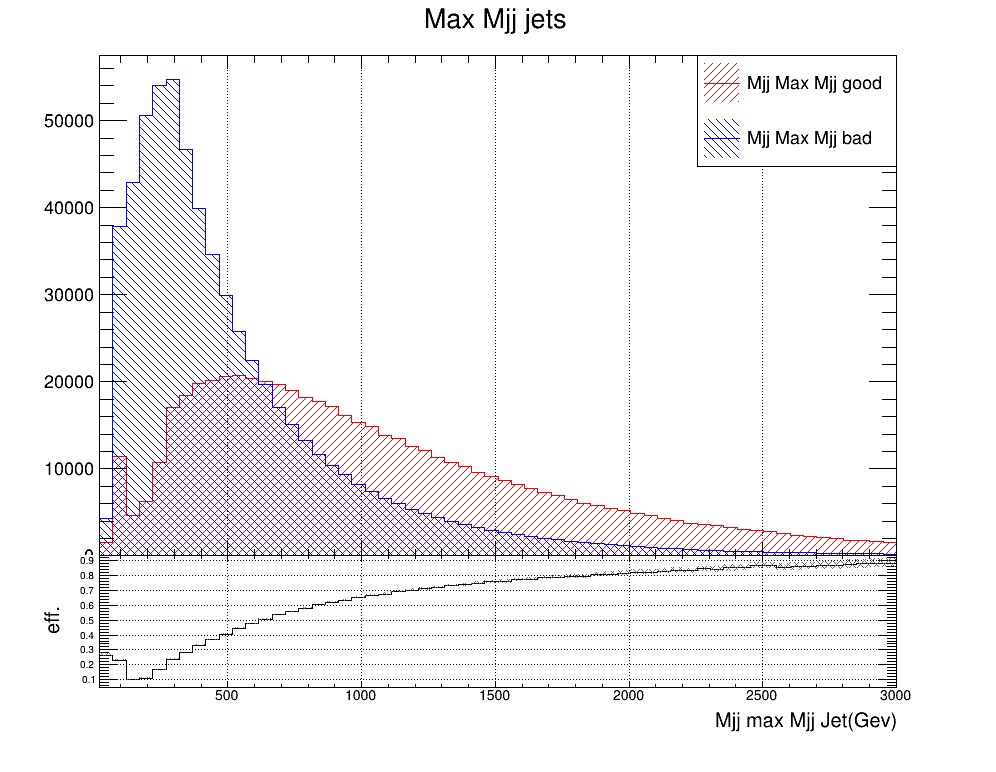

In [68]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_mineta_mjj_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mineta_mjj_mjj, h_mineta_mjj_mjj_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_mineta_mjj_mjj, h_mineta_mjj_mjj +h_mineta_mjj_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj max Mjj Jet(Gev)")
c2.Draw()

In [69]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.40533415995040295


# Mjj-Mindeltaeta

In [70]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj_mineta_mineta, h_mjj_mineta_mineta, h_mjj_mineta_mineta_bad = plotter.StackCreator1("Min deltaeta Mjj jets", "Min deltaeta good", "Min deltaeta bad")

In [71]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj_mineta_mjj, h_mjj_mineta_mjj, h_mjj_mineta_mjj_bad = plotter.StackCreator2("Max Mjj jets", "Max Mjj good", "Max Mjj bad")

In [72]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_mindeltaeta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj_mineta_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_mineta_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mjj_mineta_mineta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mjj_mineta_mineta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

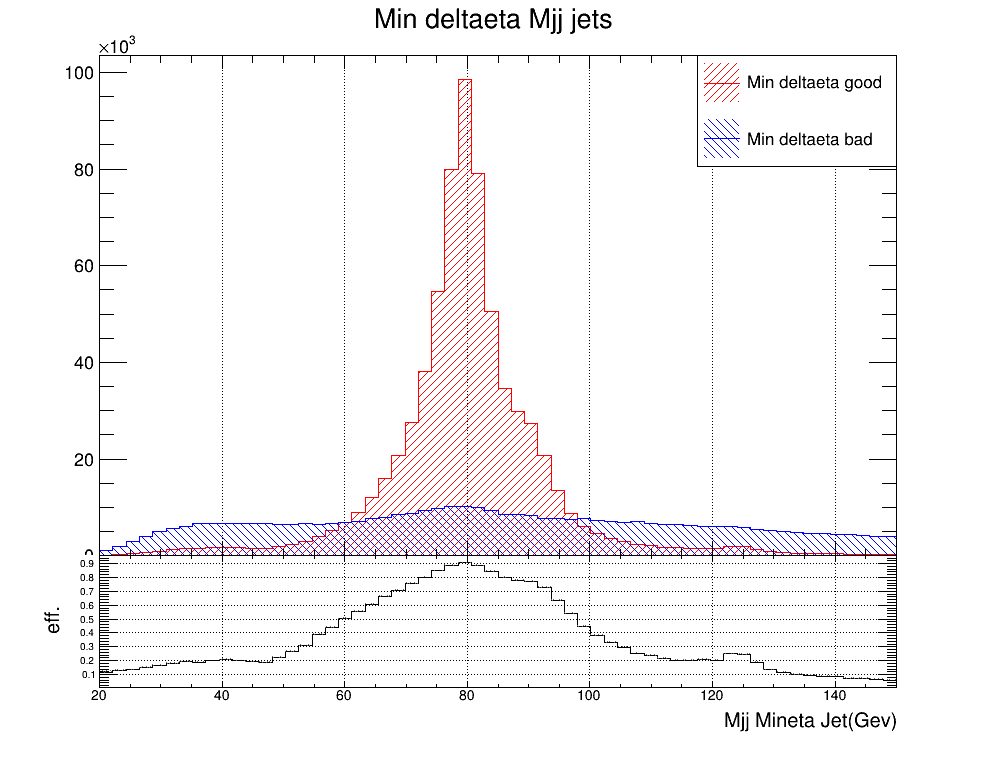

In [73]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj_mineta_mineta.Draw("nostack hist")
legend = plotter.createLegend(h_mjj_mineta_mineta, h_mjj_mineta_mineta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj_mineta_mineta, h_mjj_mineta_mineta +h_mjj_mineta_mineta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj Mineta Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

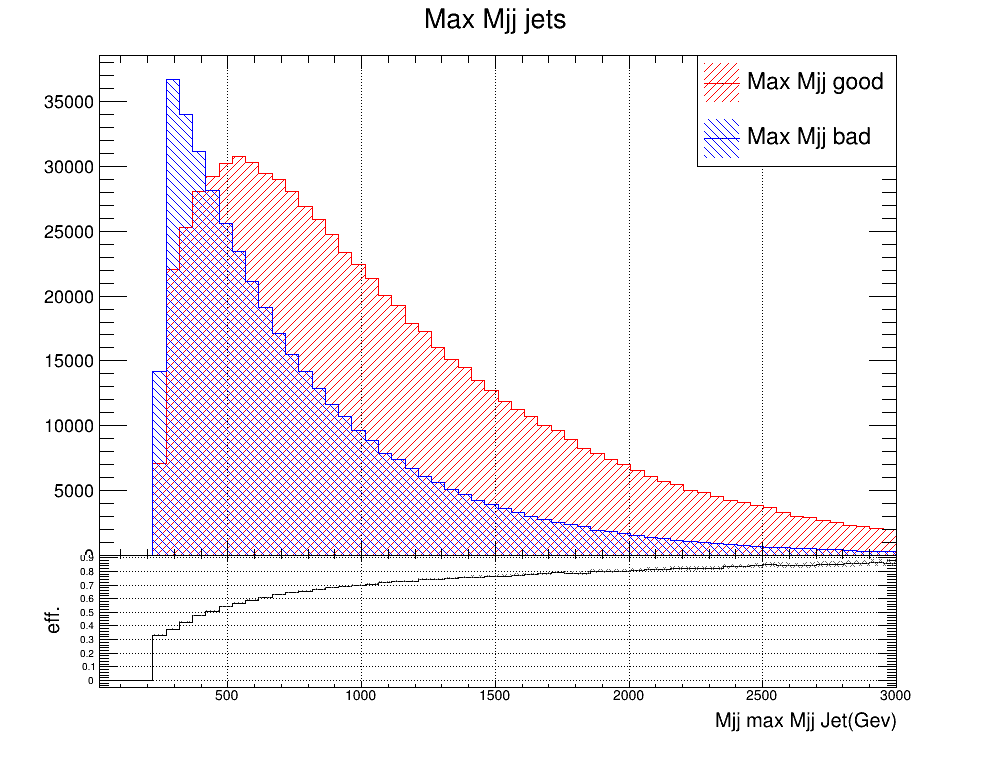

In [74]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_mjj_mineta_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj_mineta_mjj, h_mjj_mineta_mjj_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_mjj_mineta_mjj, h_mjj_mineta_mjj +h_mjj_mineta_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj max Mjj Jet(Gev)")
c2.Draw()

In [75]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.5355503203141145


# Mindeltaeta-Maxdeltaeta

In [76]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mineta_maxeta_mineta, h_mineta_maxeta_mineta, h_mineta_maxeta_mineta_bad = plotter.StackCreator1("Min deltaeta Mjj jets", "Min deltaeta good", "Min deltaeta bad")

In [77]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mineta_maxeta_maxeta, h_mineta_maxeta_maxeta, h_mineta_maxeta_maxeta_bad = plotter.StackCreator2("Max deltaeta jets", "Max deltaeta good", "Max deltaeta bad")

In [78]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mindeltaeta_maxdeltaeta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mineta_maxeta_maxeta.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mineta_maxeta_maxeta_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mineta_maxeta_mineta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mineta_maxeta_mineta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

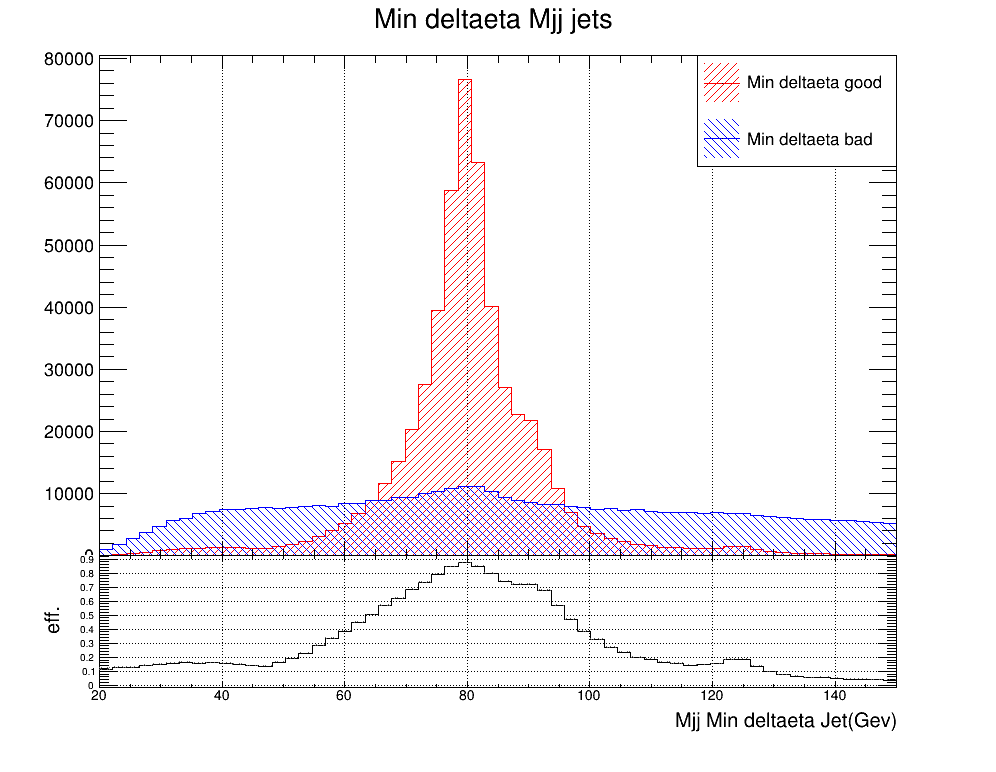

In [79]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mineta_maxeta_mineta.Draw("nostack hist")
legend = plotter.createLegend(h_mineta_maxeta_mineta, h_mineta_maxeta_mineta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mineta_maxeta_mineta, h_mineta_maxeta_mineta +h_mineta_maxeta_mineta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj Min deltaeta Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

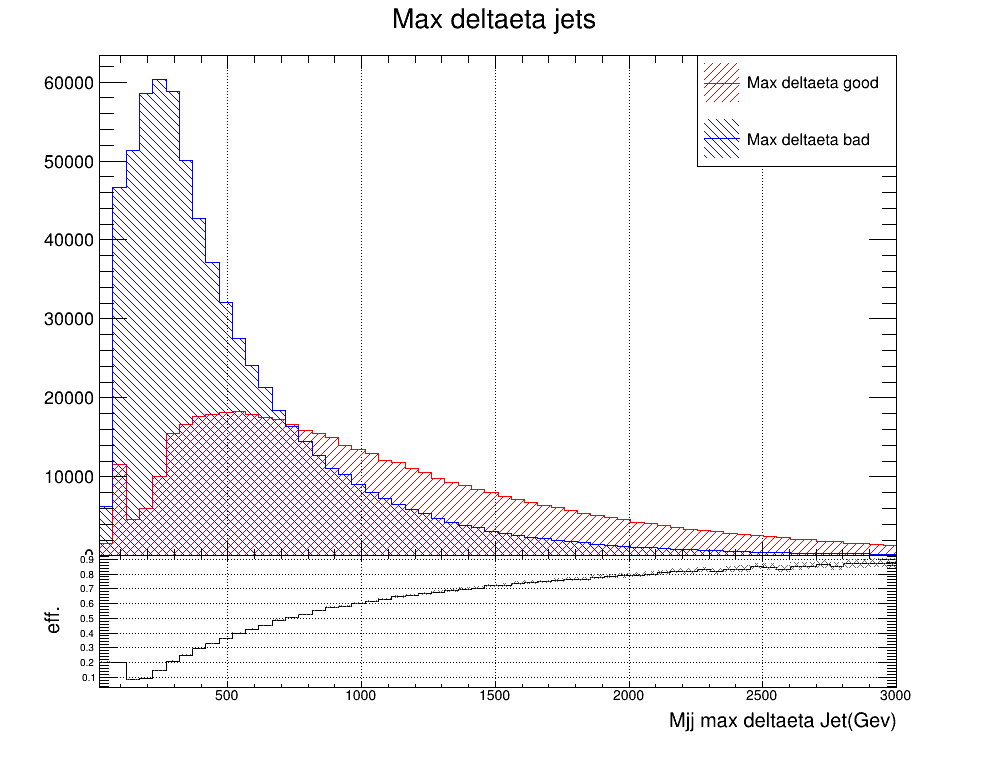

In [80]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_mineta_maxeta_maxeta.Draw("nostack hist")
legend = plotter.createLegend(h_mineta_maxeta_maxeta, h_mineta_maxeta_maxeta_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_mineta_maxeta_maxeta, h_mineta_maxeta_maxeta +h_mineta_maxeta_maxeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj max deltaeta Jet(Gev)")
c2.Draw()

In [81]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.36726927051043606


# Maxdeltaeta-Mindeltaeta

In [82]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_maxeta_mineta_mineta, h_maxeta_mineta_mineta, h_maxeta_mineta_mineta_bad = plotter.StackCreator1("Min deltaeta Mjj jets", "Min deltaeta good", "Min deltaeta bad")

In [83]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_maxeta_mineta_maxeta, h_maxeta_mineta_maxeta, h_maxeta_mineta_maxeta_bad = plotter.StackCreator2("Max deltaeta jets", "Max deltaeta good", "Max deltaeta bad")

In [84]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_maxdeltaeta_mindeltaeta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_maxeta_mineta_maxeta.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_maxeta_mineta_maxeta_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_maxeta_mineta_mineta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_maxeta_mineta_mineta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

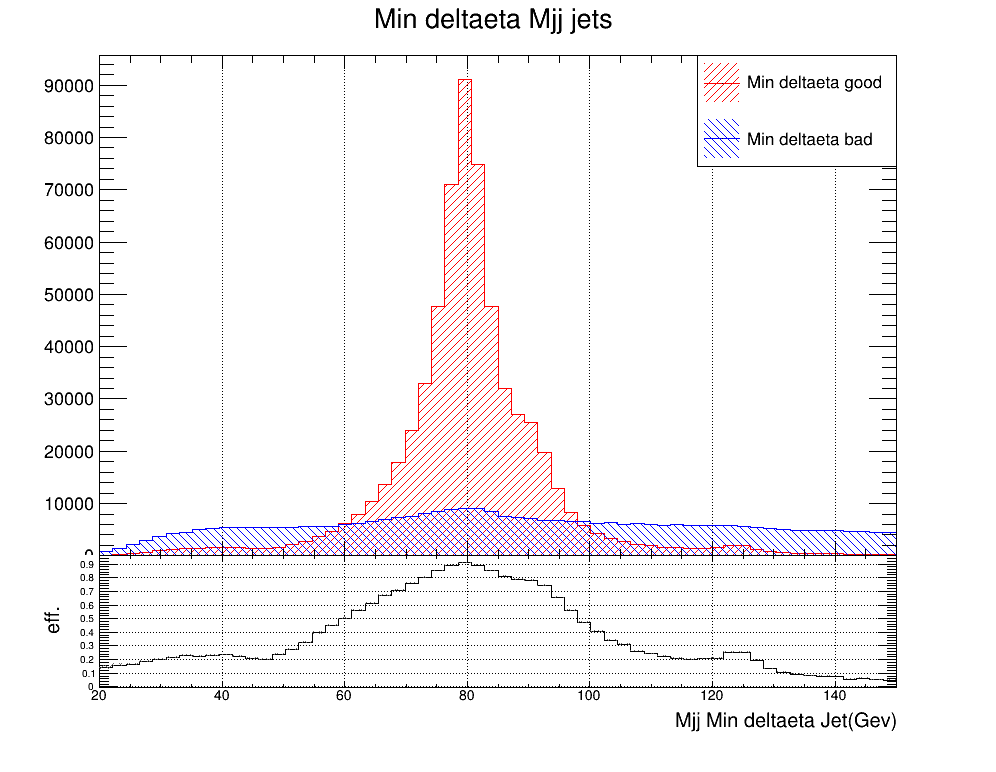

In [85]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_maxeta_mineta_mineta.Draw("nostack hist")
legend = plotter.createLegend(h_maxeta_mineta_mineta, h_maxeta_mineta_mineta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_maxeta_mineta_mineta, h_maxeta_mineta_mineta +h_maxeta_mineta_mineta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj Min deltaeta Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

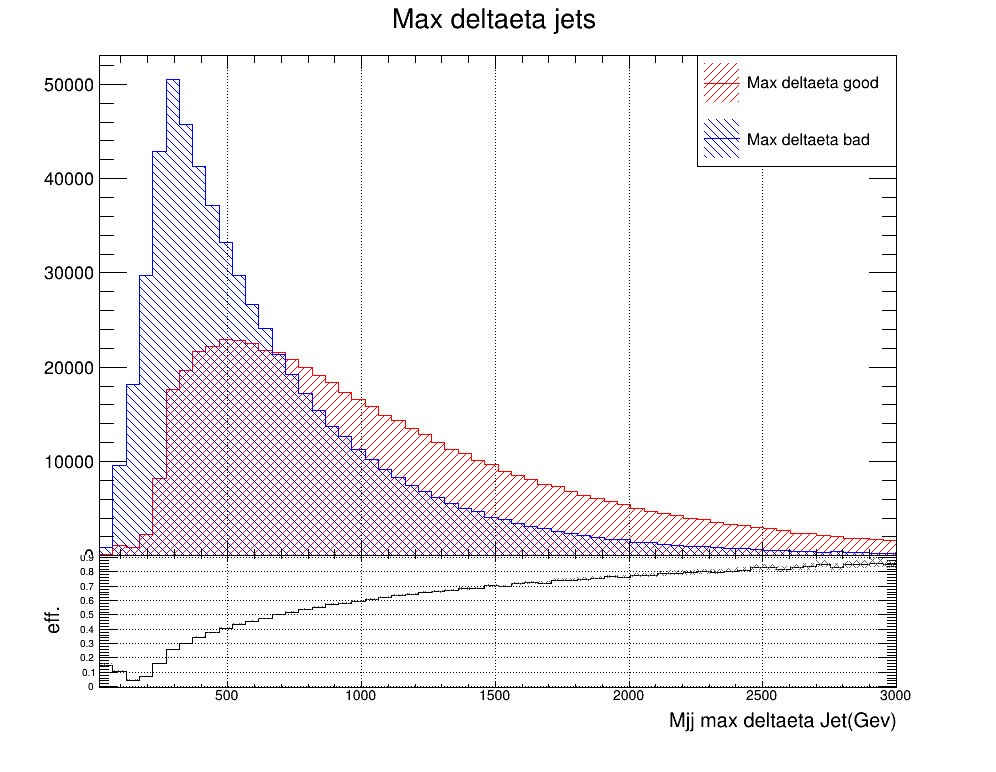

In [86]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_maxeta_mineta_maxeta.Draw("nostack hist")
legend = plotter.createLegend(h_maxeta_mineta_maxeta, h_maxeta_mineta_maxeta_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_maxeta_mineta_maxeta, h_maxeta_mineta_maxeta +h_maxeta_mineta_maxeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj max deltaeta Jet(Gev)")
c2.Draw()

In [87]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.4269692085141558


# Mjj-Weta

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj_weta_weta, h_mjj_weta_weta, h_mjj_weta_weta_bad = plotter.StackCreator1("W-min #Delta#eta Mjj jets", "W-min #Delta#eta good", "W-min #Delta#eta bad")

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj_weta_mjj, h_mjj_weta_mjj, h_mjj_weta_mjj_bad = plotter.StackCreator2("Max Mjj jets", "Max Mjj good", "Max Mjj bad")

In [ ]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_Weta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj_weta_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_weta_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_mjj_weta_weta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_mjj_weta_weta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

In [ ]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj_weta_weta.Draw("nostack hist")
legend = plotter.createLegend(h_mjj_weta_weta, h_mjj_weta_weta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj_weta_weta, h_mjj_weta_weta +h_mjj_weta_weta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "W-min #Delta#eta Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [ ]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_mjj_weta_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj_weta_mjj, h_mjj_weta_mjj_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_mjj_weta_mjj, h_mjj_weta_mjj +h_mjj_weta_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj max Mjj Jet(Gev)")
c2.Draw()

In [ ]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

# Weta-Mjj

In [65]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    #("n_events", 100),
    ("atleastone_mjj_M", 250)
    
]

In [66]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs= r.THStack("#Delta#eta distribution V","#Delta#eta distribution V");
h1 = r.TH1F("#Delta#eta distribution good", "#Delta#eta distribution good", 1100, -5, 5 )
h1.SetLineColor(r.kRed)
h1.SetLineWidth(2)
h1.SetFillColor(r.kRed)
h1.SetFillStyle(3003)
hs.Add(h1)
h2 = r.TH1F("#Delta#eta distribution bad", "#Delta#eta distribution bad", 1100, -5, 5 )
h2.SetLineColor(r.kBlue)
h2.SetFillColor(r.kBlue)
h2.SetLineWidth(2)
h2.SetFillStyle(3003)
hs.Add(h2)
    
#hs_weta_mjj_weta, h_weta_mjj_weta, h_weta_mjj_weta_bad = plotter.StackCreator1("W-min #Delta#eta Mjj jets", "W-min #Delta#eta good", "W-min #Delta#eta bad")

In [67]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs1= r.THStack("#Delta#eta distribution VBS","#Delta#eta distribution VBS");
h3 = r.TH1F("#Delta#eta distribution good", "#Delta#eta distribution good", 1100, -5, 5 )
h3.SetLineColor(r.kRed)
h3.SetLineWidth(2)
h3.SetFillColor(r.kRed)
h3.SetFillStyle(3003)
hs1.Add(h1)
h4 = r.TH1F("#Delta#eta distribution bad", "#Delta#eta distribution bad", 1100, -5, 5 )
h4.SetLineColor(r.kBlue)
h4.SetFillColor(r.kBlue)
h4.SetLineWidth(2)
h4.SetFillStyle(3003)
hs1.Add(h2)

#hs_weta_mjj_mjj, h_weta_mjj_mjj, h_weta_mjj_mjj_bad = plotter.StackCreator2("Max Mjj jets", "Max Mjj good", "Max Mjj bad")

In [68]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_Weta_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h3.Fill(jets_pair1.vbsjets[0].Eta()-jets_pair1.vbsjets[1].Eta())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h4.Fill(jets_pair1.vbsjets[0].Eta()-jets_pair1.vbsjets[1].Eta())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h1.Fill(jets_pair1.vjets[0].Eta()-jets_pair1.vjets[1].Eta())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h2.Fill(jets_pair1.vjets[0].Eta()-jets_pair1.vjets[1].Eta())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

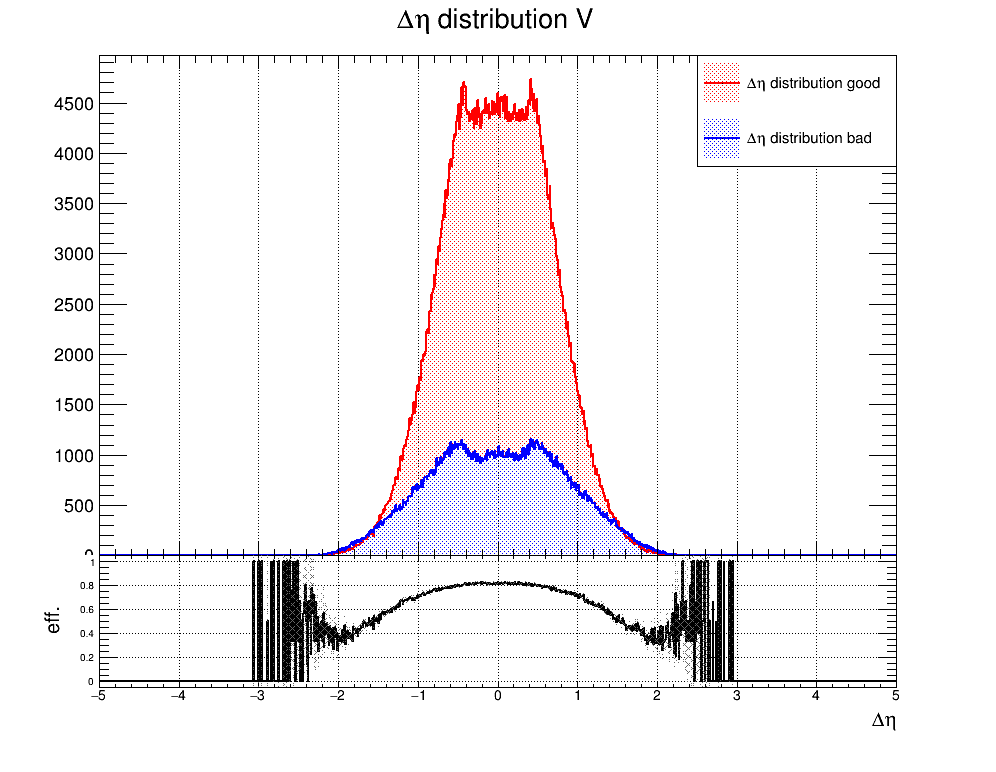

In [69]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs.Draw("nostack hist")
legend = plotter.createLegend(h1, h2,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h1, h1+h2, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "#Delta#eta")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

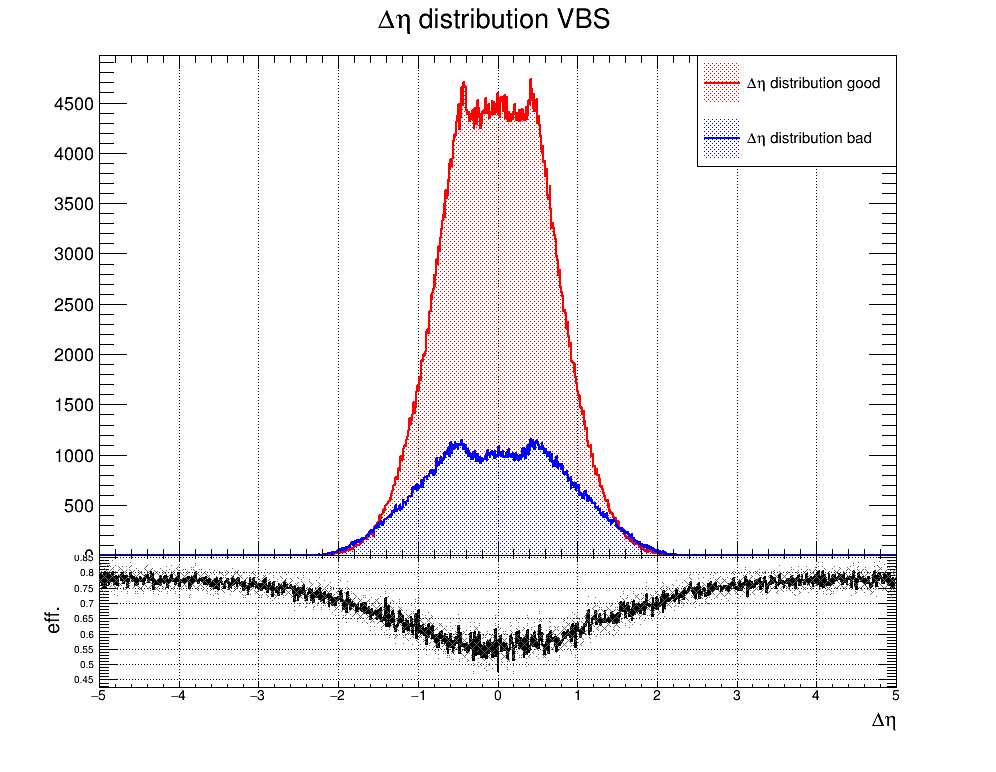

In [70]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs1.Draw("nostack hist")
legend = plotter.createLegend(h3, h4,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h3, h3 +h4, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "#Delta#eta")
c2.Draw()

In [64]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.678164083488324


# Max Weta-deltaeta

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_weta_maxeta_weta, h_weta_maxeta_weta, h_weta_maxeta_weta_bad = plotter.StackCreator1("W-min #Delta#eta Mjj jets", "W-min #Delta#eta good", "W-min #Delta#eta bad")

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_weta_maxeta_maxeta, h_weta_maxeta_maxeta, h_weta_maxeta_maxeta_bad = plotter.StackCreator2("Max #Delta#eta jets", "Max #Delta#eta good", "Max #Delta#eta bad")

In [ ]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_Weta_maxeta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_weta_maxeta_maxeta.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_weta_maxeta_maxeta_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_weta_maxeta_weta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_weta_maxeta_weta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

In [ ]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_weta_maxeta_weta.Draw("nostack hist")
legend = plotter.createLegend(h_weta_maxeta_weta, h_weta_maxeta_weta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_weta_maxeta_weta, h_weta_maxeta_weta +h_weta_maxeta_weta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "W-min #Delta#eta Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [ ]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_weta_maxeta_maxeta.Draw("nostack hist")
legend = plotter.createLegend(h_weta_maxeta_maxeta, h_weta_maxeta_maxeta_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_weta_maxeta_maxeta, h_weta_maxeta_maxeta +h_weta_maxeta_maxeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max #Delta#eta Mjj Jet(Gev)")
c2.Draw()

In [ ]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

# Deltaeta - Weta 

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_maxeta_weta_weta, h_maxeta_weta_weta, h_maxeta_weta_weta_bad = plotter.StackCreator1("W-min #Delta#eta Mjj jets", "W-min #Delta#eta good", "W-min #Delta#eta bad")

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_maxeta_weta_maxeta, h_maxeta_weta_maxeta, h_maxeta_weta_maxeta_bad = plotter.StackCreator2("Max #Delta#eta jets", "Max #Delta#eta good", "Max #Delta#eta bad")

In [ ]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_maxeta_Weta(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_maxeta_weta_maxeta.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_maxeta_weta_maxeta_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_maxeta_weta_weta.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_maxeta_weta_weta_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

In [ ]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_maxeta_weta_weta.Draw("nostack hist")
legend = plotter.createLegend(h_maxeta_weta_weta, h_maxeta_weta_weta_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_maxeta_weta_weta, h_maxeta_weta_weta +h_maxeta_weta_weta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "W-min #Delta#eta Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [ ]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_maxeta_weta_maxeta.Draw("nostack hist")
legend = plotter.createLegend(h_maxeta_weta_maxeta, h_maxeta_weta_maxeta_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_maxeta_weta_maxeta, h_maxeta_weta_maxeta +h_maxeta_weta_maxeta_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max #Delta#eta Mjj Jet(Gev)")
c2.Draw()

In [ ]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

# Proviamo_Mjj

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_pmjj_p, h_pmjj_p, h_pmjj_p_bad = plotter.StackCreator1("Wbest Mjj jets", "Wbest good", "Wbest bad")

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_pmjj_mjj, h_pmjj_mjj, h_pmjj_mjj_bad = plotter.StackCreator2("Max Mjj jets", "Max Mjj good", "Max Mjj bad")

In [ ]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_proviamo_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_pmjj_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_pmjj_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_pmjj_p.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_pmjj_p_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

In [ ]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pmjj_p.Draw("nostack hist")
legend = plotter.createLegend(h_pmjj_p, h_pmjj_p_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pmjj_p, h_pmjj_p +h_pmjj_p_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Wbest Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [ ]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_pmjj_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_pmjj_mjj, h_pmjj_mjj_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_pmjj_mjj, h_pmjj_mjj +h_pmjj_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj Jet(Gev)")
c2.Draw()

In [ ]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

# Mjj_proviamo

In [4]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_pmjj_p, h_pmjj_p, h_pmjj_p_bad = plotter.StackCreator1("Wbest Mjj jets", "Wbest good", "Wbest bad")

In [5]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_pmjj_mjj, h_pmjj_mjj, h_pmjj_mjj_bad = plotter.StackCreator2("Max Mjj jets", "Max Mjj good", "Max Mjj bad")

In [6]:
hjets = r.TH1F("hjets", "number of jets good tagging", 10, 0, 10)
hjets.SetLineColor(r.kBlack)
hjets.SetFillColor(r.kBlack)
hjets.SetFillStyle(3000)

In [7]:
hjets1 = r.TH1F("hjets", "number of jets bad tagging", 10, 0, 10)
hjets1.SetLineColor(r.kBlack)
hjets1.SetFillColor(r.kBlack)
hjets1.SetFillStyle(3000)

In [8]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_proviamo(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_pmjj_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_pmjj_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_pmjj_p.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_pmjj_p_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
        hjets.Fill(evento.n_jets[0])
    else:
        cwrg = cwrg +1
        hjets1.Fill(evento.n_jets[0])

KeyboardInterrupt: 

In [ ]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pmjj_p.Draw("nostack hist")
legend = plotter.createLegend(h_pmjj_p, h_pmjj_p_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pmjj_p, h_pmjj_p +h_pmjj_p_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Wbest Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [ ]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_pmjj_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_pmjj_mjj, h_pmjj_mjj_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_pmjj_mjj, h_pmjj_mjj +h_pmjj_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj Jet(Gev)")
c2.Draw()

In [ ]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

In [ ]:
c3 = r.TCanvas("canvas", "canvas", 50, 50, 1000, 800)
hjets.Draw("hist")
c3.Draw()

In [ ]:
c3 = r.TCanvas("canvas", "canvas", 50, 50, 1000, 800)
hjets1.Draw("hist")
c3.Draw()

# Maxdeltaeta-Proviamo

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_pmjj_p, h_pmjj_p, h_pmjj_p_bad = plotter.StackCreator1("Wbest Mjj jets", "Wbest good", "Wbest bad")

In [ ]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_pmjj_mjj, h_pmjj_mjj, h_pmjj_mjj_bad = plotter.StackCreator2("Max #Delta#eta jets", "Max #Delta#eta good", "Max #Delta#eta bad")

In [ ]:
hjets = r.TH1F("hjets", "number of jets good tagging", 10, 0, 10)
hjets.SetLineColor(r.kBlack)
hjets.SetFillColor(r.kBlack)
hjets.SetFillStyle(3007)

In [ ]:
hjets1 = r.TH1F("hjets", "number of jets bad tagging", 10, 0, 10)
hjets1.SetLineColor(r.kBlack)
hjets1.SetFillColor(r.kBlack)
hjets1.SetFillStyle(3007)

In [ ]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_deltaeta_proviamo(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_pmjj_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_pmjj_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_pmjj_p.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_pmjj_p_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
        hjets.Fill(evento.n_jets[0])
    else:
        cwrg = cwrg +1
        hjets1.Fill(evento.n_jets[0])

In [ ]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pmjj_p.Draw("nostack hist")
legend = plotter.createLegend(h_pmjj_p, h_pmjj_p_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pmjj_p, h_pmjj_p +h_pmjj_p_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Wbest Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

In [ ]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_pmjj_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_pmjj_mjj, h_pmjj_mjj_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_pmjj_mjj, h_pmjj_mjj +h_pmjj_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max #Delta#eta Mjj Jet(Gev)")
c2.Draw()

In [ ]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

In [ ]:
c3 = r.TCanvas("canvas", "canvas", 50, 50, 1000, 800)
hjets.Draw("hist")
c3.Draw()

In [ ]:
c3 = r.TCanvas("canvas", "canvas", 50, 50, 1000, 800)
hjets1.Draw("hist")
c3.Draw()

# Proviamo-Maxdeltaeta

In [4]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_pmjj_p, h_pmjj_p, h_pmjj_p_bad = plotter.StackCreator1("Wbest Mjj jets", "Wbest good", "Wbest bad")

In [5]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_pmjj_mjj, h_pmjj_mjj, h_pmjj_mjj_bad = plotter.StackCreator2("Max #Delta#eta jets", "Max #Delta#eta good", "Max #Delta#eta bad")

In [6]:
hjets = r.TH1F("hjets", "number of jets good tagging", 10, 0, 10)
hjets.SetLineColor(r.kBlack)
hjets.SetFillColor(r.kBlack)
hjets.SetFillStyle(3007)

In [7]:
hjets1 = r.TH1F("hjets", "number of jets bad tagging", 10, 0, 10)
hjets1.SetLineColor(r.kBlack)
hjets1.SetFillColor(r.kBlack)
hjets1.SetFillStyle(3007)

In [8]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_minetaWZ_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_pmjj_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_pmjj_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_pmjj_p.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_pmjj_p_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
        hjets.Fill(evento.n_jets[0])
    else:
        cwrg = cwrg +1
        hjets1.Fill(evento.n_jets[0])

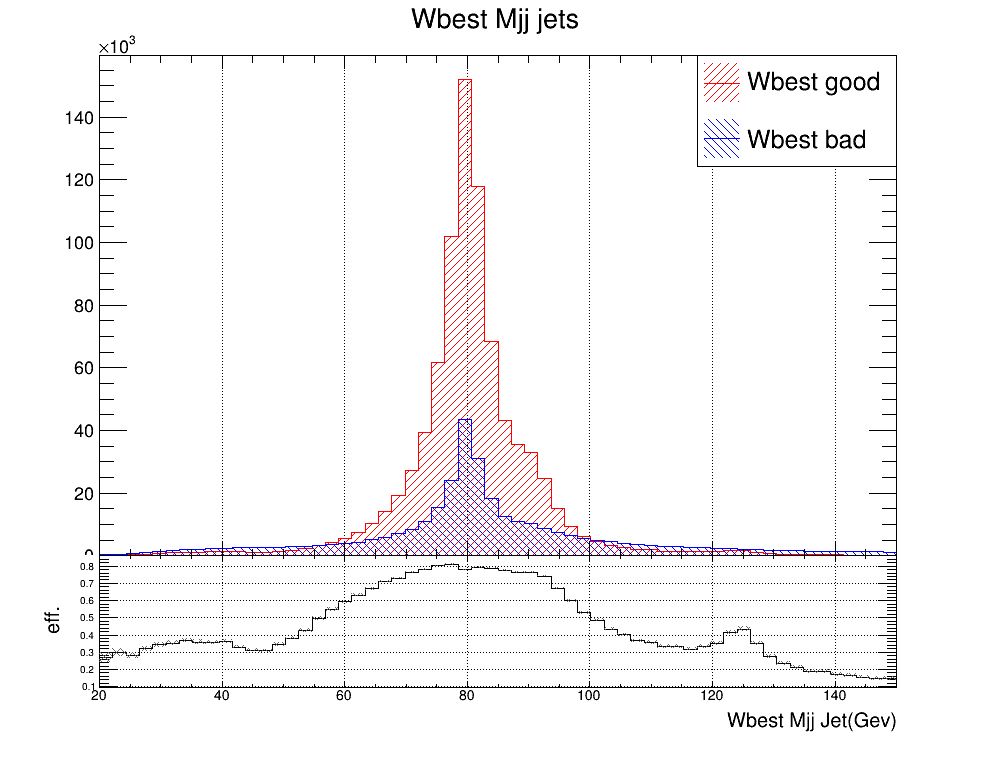

In [9]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_pmjj_p.Draw("nostack hist")
legend = plotter.createLegend(h_pmjj_p, h_pmjj_p_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_pmjj_p, h_pmjj_p +h_pmjj_p_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Wbest Mjj Jet(Gev)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

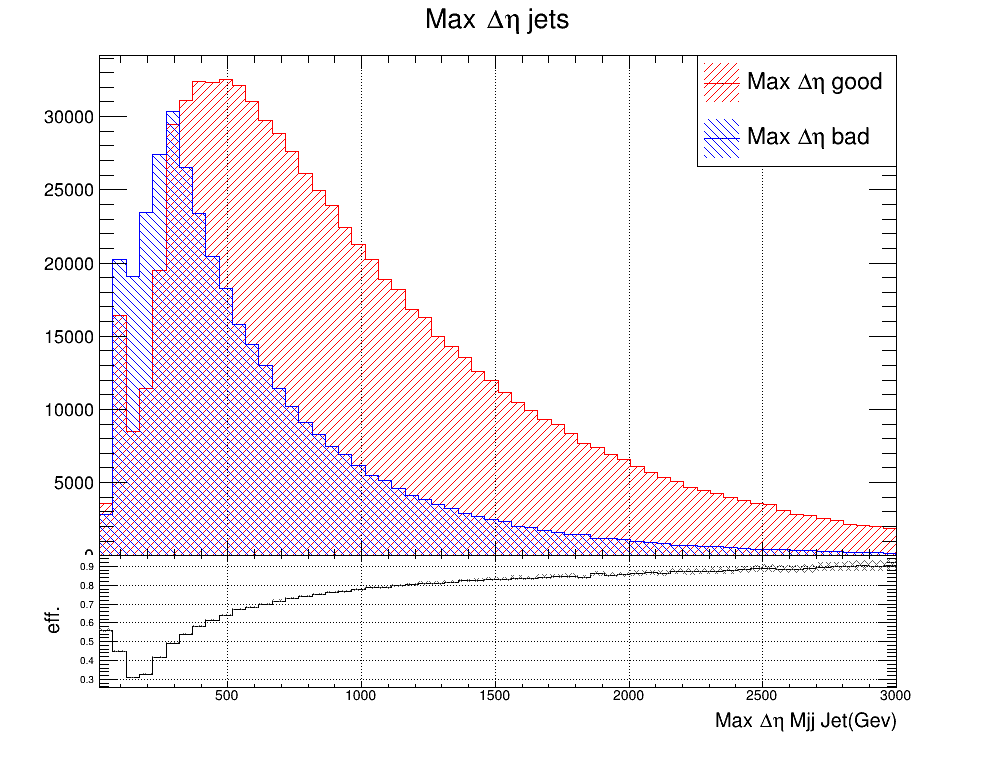

In [10]:
c2, padd1, padd2 = plotter.createCanvasPads()
padd1.cd()
hs_pmjj_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_pmjj_mjj, h_pmjj_mjj_bad,1)
legend.Draw()
padd2.cd()
hratio = plotter.createRatio(h_pmjj_mjj, h_pmjj_mjj +h_pmjj_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max #Delta#eta Mjj Jet(Gev)")
c2.Draw()

In [11]:
print('Efficiency of the algorithm')
print(cwrt/(cwrg+cwrt))

Efficiency of the algorithm
0.6232700971275057
